## TCC CBB

Desenvolvido por Ricardo e Thyago.

#### Objetivo: 

Este é uma das primeiras avaliações feitas com a utilização do PCA e do Tensorflow keras. Este código, possui duas avaliações exaustivas para a técnica. A primeira avaliação, consiste na análise de componentes para o tensorflow, com esta análise é possível identificar os componentes que, possuem as melhores assertividades. A segunda avaliação é a de teste/treino, aplica-se o K-fold variando de 0.1 até 1.0, para os conjuntos de componentes. Toda a aplicação é feita sobre a base de dados Cardio

## Aplicação do TENSORFLOW 

In [1]:
import random
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics
import pandas as pd

In [2]:
import time
import datetime

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#C:\\Users\\Thyago M\\Desktop\\ffmpeg.exe
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\Thyago M\\Desktop\\ffmpeg.exe'

## Base de dados Cardio dataset's 

In [4]:
def descarregaBaseCardio():    
    df_cardio = pd.read_csv(os.getcwd()+'\\cardio_train.csv',sep=";")
    df_cardio_target = df_cardio['cardio']
    df_cardio.drop('cardio', axis=1, inplace=True)
    df_cardio.drop('id', axis=1, inplace=True)
    
    return df_cardio, df_cardio_target

## K-FOLD

#### K - Fold para a avaliação exaustiva baseado no número de componentes

In [5]:
def aplicaKFold(x_pca, df_weather_target):
    divisao = 0.2
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_weather_target, test_size=divisao)
   
    return (X_train, X_test, y_train, y_test)

#### K-fold para a avaliaçao exaustiva Treino/Teste da base de dados

In [6]:
def aplicaKFoldAlterado(x_pca, df_weather_target, divisao):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, df_weather_target, test_size=divisao)
    return (X_train, X_test, y_train, y_test)

## Import do Tensorflow

In [7]:
#from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
#tensorflow.keras.models
tf.keras.backend.clear_session()  # For easy reset of notebook state.

In [8]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
def aplicaTensor(X_train, X_test, y_train, dim_input):
    model = Sequential()
    model.add(Dense(40, input_dim=dim_input, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=30, batch_size=100)
    
    predictionsTensor = model.predict_proba(X_test)

    return predictionsTensor

## APLICAÇÃO DO TENSOR FLOW

### AVALIAÇÃO EXAUSTIVA DO TENSORFLOW - BASEADO NO NÚMERO DE COMPONENTES

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def converte_binario(palavra):
    if palavra=='Yes' or palavra==True:
        return 0
    elif palavra=='No' or palavra==False:
        return 1

### SCALED DATA

In [12]:
df_cardio, df_cardio_target = descarregaBaseCardio()
scaler = StandardScaler()
scaler.fit(df_cardio)
scaled_data = scaler.transform(df_cardio)

(70000, 11)

## Aplicaca baseada no número de componentes Cardio

In [14]:
convergencia = False
auc_total = []
auc_num_componentes = []
media_anterior = 0

tempo = datetime.datetime.now() 
ini = time.time()

for numComponentes in range(1, 12):
    auc_componente = []
    media_anterior = 0
    qtd_iguais = 0
    
    pca = PCA(n_components = numComponentes)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)
    
    convergencia = False
    print("Componente", numComponentes)
    
    while(not convergencia):
        
        X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = aplicaKFold(x_pca, df_cardio_target)
        predictedprob = aplicaTensor(X_train_tensor, X_test_tensor, y_train_tensor, numComponentes)
        
        fpr, tpr, thresholds = roc_curve(y_test_tensor, predictedprob)
        roc_auc = auc(fpr, tpr)
        auc_componente.append(roc_auc)
        
        media_aucs = round(sum(auc_componente) / len(auc_componente), 2)
       
        if media_anterior == media_aucs:
            qtd_iguais = qtd_iguais + 1
        if qtd_iguais == 10:
            auc_num_componentes.append(media_aucs)
            auc_total.append(auc_componente)
            convergencia = True
           
        media_anterior = media_aucs
        print("Quantidade",qtd_iguais )
fim = time.time()
tempo2 = datetime.datetime.now() 

print("TEMPO", fim-ini)  
retorno_tempo = tempo2-tempo
print(retorno_tempo)

Componente 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/30
56000/56000 [==============================] - 1s 25us/step - loss: 0.6934 - accuracy: 0.5077
Epoch 2/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6930 - accuracy: 0.5116
Epoch 3/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6929 - accuracy: 0.5133
Epoch 4/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6929 - accuracy: 0.5119
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6928 - accuracy: 0.5130
Epoch 6/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6928 - accuracy: 0.5132
Epoch 7/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6928 - accuracy: 0.5130
Epoch 8/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6929 - accuracy: 0.5119
Epoch 9/30
56000/56000 [=============================

56000/56000 [==============================] - 1s 15us/step - loss: 0.6926 - accuracy: 0.5155
Epoch 16/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6925 - accuracy: 0.5158
Epoch 17/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6926 - accuracy: 0.5152
Epoch 18/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6926 - accuracy: 0.5154
Epoch 19/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5155
Epoch 20/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6926 - accuracy: 0.5165
Epoch 21/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6926 - accuracy: 0.5162
Epoch 22/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6926 - accuracy: 0.5158
Epoch 23/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6925 - accuracy: 0.5148
Epoch 24/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 11us/step - loss: 0.6928 - accuracy: 0.5148
Epoch 3/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6930 - accuracy: 0.5121
Epoch 4/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6928 - accuracy: 0.5148
Epoch 5/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6928 - accuracy: 0.5139
Epoch 6/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6927 - accuracy: 0.5146
Epoch 7/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6927 - accuracy: 0.5148
Epoch 8/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6927 - accuracy: 0.5130
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5145
Epoch 10/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6926 - accuracy: 0.5149
Epoch 11/30
56000/56000 [==============================] - 1s 11u

56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5140
Epoch 20/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6925 - accuracy: 0.5156
Epoch 21/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5131
Epoch 22/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6926 - accuracy: 0.5150
Epoch 23/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5143
Epoch 24/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6925 - accuracy: 0.5151
Epoch 25/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5141
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5131
Epoch 27/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6926 - accuracy: 0.5142
Epoch 28/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 12us/step - loss: 0.6928 - accuracy: 0.5139
Epoch 7/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6927 - accuracy: 0.5121
Epoch 8/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6928 - accuracy: 0.5131
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6928 - accuracy: 0.5136
Epoch 10/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6927 - accuracy: 0.5121
Epoch 11/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6927 - accuracy: 0.5136
Epoch 12/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6927 - accuracy: 0.5147
Epoch 13/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6927 - accuracy: 0.5128
Epoch 14/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6927 - accuracy: 0.5135
Epoch 15/30
56000/56000 [==============================] - 1s

56000/56000 [==============================] - 1s 12us/step - loss: 0.6372 - accuracy: 0.6401
Epoch 24/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6371 - accuracy: 0.6400
Epoch 25/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6371 - accuracy: 0.6391
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6370 - accuracy: 0.6394
Epoch 27/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6370 - accuracy: 0.6392
Epoch 28/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6370 - accuracy: 0.6397
Epoch 29/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6370 - accuracy: 0.6390
Epoch 30/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6369 - accuracy: 0.6391
Quantidade 1
Epoch 1/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6424 - accuracy: 0.6365
Epoch 2/30
56000/56000 [======================

56000/56000 [==============================] - 1s 16us/step - loss: 0.6384 - accuracy: 0.6380
Epoch 11/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6385 - accuracy: 0.6378
Epoch 12/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6384 - accuracy: 0.6377
Epoch 13/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.6383 - accuracy: 0.6384
Epoch 14/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6382 - accuracy: 0.6381
Epoch 15/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6383 - accuracy: 0.6381
Epoch 16/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.6382 - accuracy: 0.6382
Epoch 17/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6382 - accuracy: 0.6374
Epoch 18/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6380 - accuracy: 0.6380
Epoch 19/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 13us/step - loss: 0.6383 - accuracy: 0.6374
Epoch 28/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6385 - accuracy: 0.6378
Epoch 29/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6384 - accuracy: 0.6371
Epoch 30/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6385 - accuracy: 0.6371
Quantidade 5
Epoch 1/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6432 - accuracy: 0.6326
Epoch 2/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6393 - accuracy: 0.6392
Epoch 3/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6390 - accuracy: 0.6385
Epoch 4/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6390 - accuracy: 0.6387
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6390 - accuracy: 0.6394
Epoch 6/30
56000/56000 [==========================

56000/56000 [==============================] - 1s 14us/step - loss: 0.6380 - accuracy: 0.6396
Epoch 14/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.6380 - accuracy: 0.6385
Epoch 15/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.6380 - accuracy: 0.6390
Epoch 16/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6378 - accuracy: 0.6396
Epoch 17/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.6378 - accuracy: 0.6385
Epoch 18/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6378 - accuracy: 0.6395
Epoch 19/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6377 - accuracy: 0.6391
Epoch 20/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.6376 - accuracy: 0.6393
Epoch 21/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6377 - accuracy: 0.6392
Epoch 22/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 13us/step - loss: 0.6379 - accuracy: 0.6397
Quantidade 10
Componente 3
Epoch 1/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6407 - accuracy: 0.6350
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6370 - accuracy: 0.6382
Epoch 3/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6362 - accuracy: 0.6392
Epoch 4/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6361 - accuracy: 0.6392
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6359 - accuracy: 0.6388
Epoch 6/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6357 - accuracy: 0.6394
Epoch 7/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6352 - accuracy: 0.6392
Epoch 8/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6355 - accuracy: 0.6399
Epoch 9/30
56000/56000 [===============

56000/56000 [==============================] - 1s 13us/step - loss: 0.6332 - accuracy: 0.6426
Epoch 18/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6330 - accuracy: 0.6421
Epoch 19/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6329 - accuracy: 0.6436
Epoch 20/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6330 - accuracy: 0.6425
Epoch 21/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6327 - accuracy: 0.6429
Epoch 22/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6326 - accuracy: 0.6437
Epoch 23/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6327 - accuracy: 0.6426
Epoch 24/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6327 - accuracy: 0.6442
Epoch 25/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6326 - accuracy: 0.6433
Epoch 26/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 12us/step - loss: 0.6347 - accuracy: 0.6429
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6343 - accuracy: 0.6426
Epoch 6/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6346 - accuracy: 0.6422
Epoch 7/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6337 - accuracy: 0.6429
Epoch 8/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6338 - accuracy: 0.6422
Epoch 9/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6337 - accuracy: 0.6433
Epoch 10/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6337 - accuracy: 0.6422
Epoch 11/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6334 - accuracy: 0.6429
Epoch 12/30
56000/56000 [==============================] - 1s 11us/step - loss: 0.6333 - accuracy: 0.6443
Epoch 13/30
56000/56000 [==============================] - 1s 1

56000/56000 [==============================] - 1s 13us/step - loss: 0.6331 - accuracy: 0.6425
Epoch 22/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6331 - accuracy: 0.6414
Epoch 23/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6331 - accuracy: 0.6417
Epoch 24/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6326 - accuracy: 0.6435
Epoch 25/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6329 - accuracy: 0.6413
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6328 - accuracy: 0.6426
Epoch 27/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6328 - accuracy: 0.6434
Epoch 28/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6326 - accuracy: 0.6432
Epoch 29/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6324 - accuracy: 0.6435
Epoch 30/30
56000/56000 [==============================] -

Epoch 8/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6342 - accuracy: 0.6415
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6341 - accuracy: 0.6425
Epoch 10/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6339 - accuracy: 0.6419
Epoch 11/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6339 - accuracy: 0.6409
Epoch 12/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6337 - accuracy: 0.6420
Epoch 13/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6336 - accuracy: 0.6438
Epoch 14/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6334 - accuracy: 0.6434
Epoch 15/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6330 - accuracy: 0.6432
Epoch 16/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6332 - accuracy: 0.6431
Epoch 17/30
56000/56000 [=======================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5628 - accuracy: 0.7178
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5623 - accuracy: 0.7175
Epoch 27/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5615 - accuracy: 0.7185
Epoch 28/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5615 - accuracy: 0.7184
Epoch 29/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5616 - accuracy: 0.7183
Epoch 30/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5609 - accuracy: 0.7185
Quantidade 0
Epoch 1/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6276 - accuracy: 0.6497
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6143 - accuracy: 0.6639
Epoch 3/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.6068 - accuracy: 0.6719
Epoch 4/30
56000/56000 [========================

56000/56000 [==============================] - 1s 14us/step - loss: 0.5752 - accuracy: 0.7074
Epoch 13/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5744 - accuracy: 0.7067
Epoch 14/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5732 - accuracy: 0.7098
Epoch 15/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5712 - accuracy: 0.7101
Epoch 16/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5707 - accuracy: 0.7111
Epoch 17/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5693 - accuracy: 0.7140
Epoch 18/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5686 - accuracy: 0.7131
Epoch 19/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5689 - accuracy: 0.7134
Epoch 20/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5676 - accuracy: 0.7146
Epoch 21/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 12us/step - loss: 0.5600 - accuracy: 0.7204
Epoch 30/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5605 - accuracy: 0.7208
Quantidade 5
Epoch 1/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6281 - accuracy: 0.6516
Epoch 2/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6135 - accuracy: 0.6658
Epoch 3/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.6050 - accuracy: 0.6733
Epoch 4/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5981 - accuracy: 0.6817
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5913 - accuracy: 0.6882
Epoch 6/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5859 - accuracy: 0.6939
Epoch 7/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5830 - accuracy: 0.6969
Epoch 8/30
56000/56000 [============================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5719 - accuracy: 0.7063
Epoch 17/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5713 - accuracy: 0.7087
Epoch 18/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5707 - accuracy: 0.7093
Epoch 19/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5701 - accuracy: 0.7111
Epoch 20/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5691 - accuracy: 0.7103
Epoch 21/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5683 - accuracy: 0.7114
Epoch 22/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5680 - accuracy: 0.7130
Epoch 23/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5665 - accuracy: 0.7143
Epoch 24/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5654 - accuracy: 0.7143
Epoch 25/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 12us/step - loss: 0.5938 - accuracy: 0.6860
Epoch 4/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5859 - accuracy: 0.6949
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5788 - accuracy: 0.7000
Epoch 6/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5737 - accuracy: 0.7076
Epoch 7/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5698 - accuracy: 0.7108
Epoch 8/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5681 - accuracy: 0.7127
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5660 - accuracy: 0.7143
Epoch 10/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5651 - accuracy: 0.7172
Epoch 11/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5639 - accuracy: 0.7168
Epoch 12/30
56000/56000 [==============================] - 1s 12

Epoch 20/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5577 - accuracy: 0.7218
Epoch 21/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5579 - accuracy: 0.7211
Epoch 22/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5581 - accuracy: 0.7213
Epoch 23/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5572 - accuracy: 0.7223
Epoch 24/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5569 - accuracy: 0.7227
Epoch 25/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5565 - accuracy: 0.7224
Epoch 26/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5568 - accuracy: 0.7225
Epoch 27/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5561 - accuracy: 0.7220
Epoch 28/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5561 - accuracy: 0.7226
Epoch 29/30
56000/56000 [=====================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5757 - accuracy: 0.7060
Epoch 7/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5729 - accuracy: 0.7100
Epoch 8/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5700 - accuracy: 0.7125
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5678 - accuracy: 0.7139
Epoch 10/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5671 - accuracy: 0.7139
Epoch 11/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5660 - accuracy: 0.7159
Epoch 12/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5643 - accuracy: 0.7168
Epoch 13/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5642 - accuracy: 0.7180
Epoch 14/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5634 - accuracy: 0.7182
Epoch 15/30
56000/56000 [==============================] - 1s

56000/56000 [==============================] - 1s 18us/step - loss: 0.5579 - accuracy: 0.7216
Epoch 24/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5575 - accuracy: 0.7227
Epoch 25/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5571 - accuracy: 0.7218
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5573 - accuracy: 0.7226
Epoch 27/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.5575 - accuracy: 0.7220
Epoch 28/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.5567 - accuracy: 0.7231
Epoch 29/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5565 - accuracy: 0.7236
Epoch 30/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5569 - accuracy: 0.7232
Quantidade 3
Epoch 1/30
56000/56000 [==============================] - 1s 23us/step - loss: 0.6169 - accuracy: 0.6622
Epoch 2/30
56000/56000 [======================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5648 - accuracy: 0.7180
Epoch 11/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5634 - accuracy: 0.7198 0s - los
Epoch 12/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5620 - accuracy: 0.7204
Epoch 13/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5615 - accuracy: 0.7204
Epoch 14/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5605 - accuracy: 0.7221
Epoch 15/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5601 - accuracy: 0.7218
Epoch 16/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5596 - accuracy: 0.7229
Epoch 17/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5588 - accuracy: 0.7228
Epoch 18/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5596 - accuracy: 0.7222
Epoch 19/30
56000/56000 [========================

56000/56000 [==============================] - 1s 13us/step - loss: 0.5573 - accuracy: 0.7222
Epoch 28/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5566 - accuracy: 0.7234
Epoch 29/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5570 - accuracy: 0.7237
Epoch 30/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5567 - accuracy: 0.7242
Quantidade 5
Epoch 1/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6191 - accuracy: 0.6612
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5998 - accuracy: 0.6791
Epoch 3/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5940 - accuracy: 0.6852
Epoch 4/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5874 - accuracy: 0.6943
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5805 - accuracy: 0.7016
Epoch 6/30
56000/56000 [==========================

56000/56000 [==============================] - 1s 15us/step - loss: 0.5613 - accuracy: 0.7206
Epoch 15/30
56000/56000 [==============================] - 1s 22us/step - loss: 0.5610 - accuracy: 0.7197
Epoch 16/30
56000/56000 [==============================] - 1s 21us/step - loss: 0.5601 - accuracy: 0.7206
Epoch 17/30
56000/56000 [==============================] - 1s 23us/step - loss: 0.5589 - accuracy: 0.7220
Epoch 18/30
56000/56000 [==============================] - 1s 21us/step - loss: 0.5594 - accuracy: 0.7230
Epoch 19/30
56000/56000 [==============================] - 1s 21us/step - loss: 0.5583 - accuracy: 0.7214
Epoch 20/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.5578 - accuracy: 0.7220
Epoch 21/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5575 - accuracy: 0.7220
Epoch 22/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5580 - accuracy: 0.7236
Epoch 23/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 15us/step - loss: 0.6141 - accuracy: 0.6699
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5985 - accuracy: 0.6820
Epoch 3/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5899 - accuracy: 0.6896
Epoch 4/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5805 - accuracy: 0.6995
Epoch 5/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5749 - accuracy: 0.7068
Epoch 6/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5700 - accuracy: 0.7125
Epoch 7/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5668 - accuracy: 0.7157
Epoch 8/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5654 - accuracy: 0.7167
Epoch 9/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5646 - accuracy: 0.7165
Epoch 10/30
56000/56000 [==============================] - 1s 13us

56000/56000 [==============================] - 1s 12us/step - loss: 0.5522 - accuracy: 0.7254
Epoch 18/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5520 - accuracy: 0.7266
Epoch 19/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5519 - accuracy: 0.7258
Epoch 20/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5518 - accuracy: 0.7275
Epoch 21/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5515 - accuracy: 0.7267
Epoch 22/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5504 - accuracy: 0.7252
Epoch 23/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5497 - accuracy: 0.7279
Epoch 24/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5495 - accuracy: 0.7277
Epoch 25/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5499 - accuracy: 0.7268
Epoch 26/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 12us/step - loss: 0.5815 - accuracy: 0.6997
Epoch 5/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5748 - accuracy: 0.7062
Epoch 6/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5698 - accuracy: 0.7123
Epoch 7/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5650 - accuracy: 0.7153
Epoch 8/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5625 - accuracy: 0.7195
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5603 - accuracy: 0.7211
Epoch 10/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5590 - accuracy: 0.7205
Epoch 11/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5580 - accuracy: 0.7220
Epoch 12/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5566 - accuracy: 0.7239
Epoch 13/30
56000/56000 [==============================] - 1s 1

56000/56000 [==============================] - 1s 14us/step - loss: 0.5537 - accuracy: 0.7245
Epoch 22/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5530 - accuracy: 0.7246
Epoch 23/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5529 - accuracy: 0.7242
Epoch 24/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5533 - accuracy: 0.7252
Epoch 25/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5524 - accuracy: 0.7257
Epoch 26/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5523 - accuracy: 0.7255
Epoch 27/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5517 - accuracy: 0.7255
Epoch 28/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5513 - accuracy: 0.7268
Epoch 29/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5509 - accuracy: 0.7254
Epoch 30/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 12us/step - loss: 0.5605 - accuracy: 0.7212
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5583 - accuracy: 0.7233
Epoch 10/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5577 - accuracy: 0.7238
Epoch 11/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5568 - accuracy: 0.7233
Epoch 12/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5557 - accuracy: 0.7245
Epoch 13/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5555 - accuracy: 0.7233
Epoch 14/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5538 - accuracy: 0.7263
Epoch 15/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5542 - accuracy: 0.7252
Epoch 16/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5531 - accuracy: 0.7261
Epoch 17/30
56000/56000 [==============================] - 

56000/56000 [==============================] - 1s 12us/step - loss: 0.5501 - accuracy: 0.7281
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5496 - accuracy: 0.7284
Epoch 27/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5499 - accuracy: 0.7278
Epoch 28/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5497 - accuracy: 0.7288
Epoch 29/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5493 - accuracy: 0.7283
Epoch 30/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5491 - accuracy: 0.7289
Quantidade 8
Epoch 1/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6131 - accuracy: 0.6686
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5934 - accuracy: 0.6879
Epoch 3/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5853 - accuracy: 0.6975
Epoch 4/30
56000/56000 [========================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5507 - accuracy: 0.7286
Epoch 13/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5493 - accuracy: 0.7293
Epoch 14/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5487 - accuracy: 0.7303
Epoch 15/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5482 - accuracy: 0.7290
Epoch 16/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5475 - accuracy: 0.7300
Epoch 17/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5476 - accuracy: 0.7302
Epoch 18/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5461 - accuracy: 0.7310
Epoch 19/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5468 - accuracy: 0.7301
Epoch 20/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5459 - accuracy: 0.7307
Epoch 21/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 13us/step - loss: 0.5432 - accuracy: 0.7326
Epoch 30/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5447 - accuracy: 0.7313
Quantidade 2
Epoch 1/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6202 - accuracy: 0.6614
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5790 - accuracy: 0.7124
Epoch 3/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5694 - accuracy: 0.7212
Epoch 4/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5649 - accuracy: 0.7226
Epoch 5/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5614 - accuracy: 0.7242
Epoch 6/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5591 - accuracy: 0.7257
Epoch 7/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5582 - accuracy: 0.7262
Epoch 8/30
56000/56000 [============================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5456 - accuracy: 0.7300
Epoch 17/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5461 - accuracy: 0.7312
Epoch 18/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5453 - accuracy: 0.7304
Epoch 19/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5451 - accuracy: 0.7297
Epoch 20/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5443 - accuracy: 0.7307
Epoch 21/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5441 - accuracy: 0.7316
Epoch 22/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5445 - accuracy: 0.7314
Epoch 23/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5439 - accuracy: 0.7312
Epoch 24/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5441 - accuracy: 0.7316
Epoch 25/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 13us/step - loss: 0.5694 - accuracy: 0.7190
Epoch 4/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5652 - accuracy: 0.7215
Epoch 5/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5618 - accuracy: 0.7232
Epoch 6/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5615 - accuracy: 0.7259
Epoch 7/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5583 - accuracy: 0.7258
Epoch 8/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5576 - accuracy: 0.7266
Epoch 9/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5551 - accuracy: 0.7269
Epoch 10/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5555 - accuracy: 0.7284
Epoch 11/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5536 - accuracy: 0.7277
Epoch 12/30
56000/56000 [==============================] - 1s 13

56000/56000 [==============================] - 1s 12us/step - loss: 0.5460 - accuracy: 0.7304
Epoch 21/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5457 - accuracy: 0.7308
Epoch 22/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5452 - accuracy: 0.7309
Epoch 23/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5451 - accuracy: 0.7307 0s - loss: 0
Epoch 24/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5454 - accuracy: 0.7311
Epoch 25/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5452 - accuracy: 0.7324
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5446 - accuracy: 0.7312
Epoch 27/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5445 - accuracy: 0.7313
Epoch 28/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5438 - accuracy: 0.7323
Epoch 29/30
56000/56000 [====================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5519 - accuracy: 0.7304
Epoch 7/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5493 - accuracy: 0.7302
Epoch 8/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5477 - accuracy: 0.7316
Epoch 9/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5470 - accuracy: 0.7324
Epoch 10/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5456 - accuracy: 0.7319
Epoch 11/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5463 - accuracy: 0.7315
Epoch 12/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5444 - accuracy: 0.7319 0s - loss:
Epoch 13/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5449 - accuracy: 0.7331
Epoch 14/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5442 - accuracy: 0.7312
Epoch 15/30
56000/56000 [=========================

56000/56000 [==============================] - 1s 13us/step - loss: 0.5415 - accuracy: 0.7344
Epoch 24/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5407 - accuracy: 0.7350
Epoch 25/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5409 - accuracy: 0.7332
Epoch 26/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5400 - accuracy: 0.7335
Epoch 27/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5402 - accuracy: 0.7350
Epoch 28/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5405 - accuracy: 0.7354
Epoch 29/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5401 - accuracy: 0.7355
Epoch 30/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5400 - accuracy: 0.7350
Quantidade 4
Epoch 1/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.6065 - accuracy: 0.6805
Epoch 2/30
56000/56000 [======================

56000/56000 [==============================] - 1s 13us/step - loss: 0.5450 - accuracy: 0.7337
Epoch 11/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5453 - accuracy: 0.7336
Epoch 12/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5443 - accuracy: 0.7331
Epoch 13/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5445 - accuracy: 0.7331
Epoch 14/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5433 - accuracy: 0.7335
Epoch 15/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5434 - accuracy: 0.7333
Epoch 16/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5436 - accuracy: 0.7320
Epoch 17/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5432 - accuracy: 0.7341
Epoch 18/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5426 - accuracy: 0.7342
Epoch 19/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 13us/step - loss: 0.5402 - accuracy: 0.7345
Epoch 28/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5400 - accuracy: 0.7343
Epoch 29/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5401 - accuracy: 0.7345
Epoch 30/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5400 - accuracy: 0.7347
Quantidade 9
Epoch 1/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6161 - accuracy: 0.6690
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5758 - accuracy: 0.7159
Epoch 3/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5683 - accuracy: 0.7246
Epoch 4/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5655 - accuracy: 0.7255
Epoch 5/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5618 - accuracy: 0.7265
Epoch 6/30
56000/56000 [==========================

56000/56000 [==============================] - 1s 13us/step - loss: 0.5467 - accuracy: 0.7326
Epoch 15/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5455 - accuracy: 0.7326
Epoch 16/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5444 - accuracy: 0.7330
Epoch 17/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5444 - accuracy: 0.7330
Epoch 18/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5444 - accuracy: 0.7333
Epoch 19/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5438 - accuracy: 0.7339
Epoch 20/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5433 - accuracy: 0.7327
Epoch 21/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5435 - accuracy: 0.7338
Epoch 22/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5424 - accuracy: 0.7343
Epoch 23/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 17us/step - loss: 0.6099 - accuracy: 0.6798
Epoch 2/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5705 - accuracy: 0.7232
Epoch 3/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5617 - accuracy: 0.7267
Epoch 4/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5563 - accuracy: 0.7283
Epoch 5/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5524 - accuracy: 0.7299
Epoch 6/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5501 - accuracy: 0.7309
Epoch 7/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5477 - accuracy: 0.7317
Epoch 8/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5458 - accuracy: 0.7317
Epoch 9/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5443 - accuracy: 0.7338
Epoch 10/30
56000/56000 [==============================] - 1s 12us

56000/56000 [==============================] - 1s 13us/step - loss: 0.5437 - accuracy: 0.7359
Epoch 19/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5428 - accuracy: 0.7332
Epoch 20/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5420 - accuracy: 0.7346
Epoch 21/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5417 - accuracy: 0.7358
Epoch 22/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5424 - accuracy: 0.7341
Epoch 23/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5415 - accuracy: 0.7348
Epoch 24/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5427 - accuracy: 0.7347
Epoch 25/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5409 - accuracy: 0.7343
Epoch 26/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5412 - accuracy: 0.7349
Epoch 27/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 14us/step - loss: 0.5603 - accuracy: 0.7284
Epoch 6/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5586 - accuracy: 0.7283
Epoch 7/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5567 - accuracy: 0.7294
Epoch 8/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5545 - accuracy: 0.7306
Epoch 9/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5522 - accuracy: 0.7320
Epoch 10/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5506 - accuracy: 0.7313
Epoch 11/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5504 - accuracy: 0.7308
Epoch 12/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5488 - accuracy: 0.7323
Epoch 13/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5482 - accuracy: 0.7326
Epoch 14/30
56000/56000 [==============================] - 1s 

56000/56000 [==============================] - 1s 24us/step - loss: 0.5399 - accuracy: 0.7357
Epoch 23/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5395 - accuracy: 0.7356
Epoch 24/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.5387 - accuracy: 0.7368
Epoch 25/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5387 - accuracy: 0.7362
Epoch 26/30
56000/56000 [==============================] - 1s 21us/step - loss: 0.5385 - accuracy: 0.7367
Epoch 27/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.5381 - accuracy: 0.7363
Epoch 28/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5381 - accuracy: 0.7361
Epoch 29/30
56000/56000 [==============================] - 1s 19us/step - loss: 0.5381 - accuracy: 0.7366
Epoch 30/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5377 - accuracy: 0.7371
Quantidade 0
Epoch 1/30
56000/56000 [=====================

56000/56000 [==============================] - 1s 12us/step - loss: 0.5452 - accuracy: 0.7334
Epoch 10/30
56000/56000 [==============================] - 1s 20us/step - loss: 0.5450 - accuracy: 0.7340
Epoch 11/30
56000/56000 [==============================] - 1s 19us/step - loss: 0.5440 - accuracy: 0.7332
Epoch 12/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.5435 - accuracy: 0.7338
Epoch 13/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5426 - accuracy: 0.7335
Epoch 14/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5430 - accuracy: 0.7341
Epoch 15/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5421 - accuracy: 0.7344
Epoch 16/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5417 - accuracy: 0.7346
Epoch 17/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5417 - accuracy: 0.7350
Epoch 18/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 13us/step - loss: 0.5406 - accuracy: 0.7367
Epoch 26/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5400 - accuracy: 0.7359
Epoch 27/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5397 - accuracy: 0.7366
Epoch 28/30
56000/56000 [==============================] - 1s 12us/step - loss: 0.5398 - accuracy: 0.7364
Epoch 29/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5402 - accuracy: 0.7370
Epoch 30/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5390 - accuracy: 0.7371
Quantidade 5
Epoch 1/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.6142 - accuracy: 0.6641
Epoch 2/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5752 - accuracy: 0.7144
Epoch 3/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5651 - accuracy: 0.7248
Epoch 4/30
56000/56000 [========================

56000/56000 [==============================] - 1s 13us/step - loss: 0.5462 - accuracy: 0.7317
Epoch 13/30
56000/56000 [==============================] - 1s 13us/step - loss: 0.5453 - accuracy: 0.7317
Epoch 14/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5446 - accuracy: 0.7319
Epoch 15/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5447 - accuracy: 0.7326
Epoch 16/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5437 - accuracy: 0.7327
Epoch 17/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5434 - accuracy: 0.7342
Epoch 18/30
56000/56000 [==============================] - 1s 14us/step - loss: 0.5421 - accuracy: 0.7339
Epoch 19/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5429 - accuracy: 0.7342
Epoch 20/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5415 - accuracy: 0.7346
Epoch 21/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 16us/step - loss: 0.5386 - accuracy: 0.7372
Epoch 29/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5383 - accuracy: 0.7375
Epoch 30/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5382 - accuracy: 0.7371
Quantidade 10
Componente 11
Epoch 1/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.6183 - accuracy: 0.6597
Epoch 2/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5803 - accuracy: 0.7102
Epoch 3/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5673 - accuracy: 0.7236
Epoch 4/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5630 - accuracy: 0.7289
Epoch 5/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5597 - accuracy: 0.7293
Epoch 6/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5568 - accuracy: 0.7309
Epoch 7/30
56000/56000 [============

56000/56000 [==============================] - 1s 17us/step - loss: 0.5449 - accuracy: 0.7330
Epoch 16/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5447 - accuracy: 0.7349
Epoch 17/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5444 - accuracy: 0.7340
Epoch 18/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5435 - accuracy: 0.7347
Epoch 19/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5432 - accuracy: 0.7342
Epoch 20/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5427 - accuracy: 0.7351
Epoch 21/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5432 - accuracy: 0.7354
Epoch 22/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5417 - accuracy: 0.7353
Epoch 23/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5419 - accuracy: 0.7351
Epoch 24/30
56000/56000 [==============================] -

56000/56000 [==============================] - 1s 15us/step - loss: 0.5863 - accuracy: 0.7006
Epoch 3/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5661 - accuracy: 0.7247
Epoch 4/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5602 - accuracy: 0.7276
Epoch 5/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5567 - accuracy: 0.7300
Epoch 6/30
56000/56000 [==============================] - 1s 15us/step - loss: 0.5548 - accuracy: 0.7313
Epoch 7/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5533 - accuracy: 0.7321
Epoch 8/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5516 - accuracy: 0.7319
Epoch 9/30
56000/56000 [==============================] - 1s 19us/step - loss: 0.5502 - accuracy: 0.7331
Epoch 10/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5489 - accuracy: 0.7333
Epoch 11/30
56000/56000 [==============================] - 1s 16u

56000/56000 [==============================] - 1s 18us/step - loss: 0.5412 - accuracy: 0.7368
Epoch 20/30
56000/56000 [==============================] - 1s 19us/step - loss: 0.5396 - accuracy: 0.7369
Epoch 21/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5400 - accuracy: 0.7374
Epoch 22/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5401 - accuracy: 0.7369
Epoch 23/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5396 - accuracy: 0.7377
Epoch 24/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5394 - accuracy: 0.7367
Epoch 25/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5387 - accuracy: 0.7374
Epoch 26/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5380 - accuracy: 0.7381
Epoch 27/30
56000/56000 [==============================] - 1s 19us/step - loss: 0.5382 - accuracy: 0.7371
Epoch 28/30
56000/56000 [==============================] -

Epoch 6/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5517 - accuracy: 0.7318
Epoch 7/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5513 - accuracy: 0.7320
Epoch 8/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5493 - accuracy: 0.7339
Epoch 9/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5468 - accuracy: 0.7346
Epoch 10/30
56000/56000 [==============================] - 1s 17us/step - loss: 0.5468 - accuracy: 0.7353
Epoch 11/30
56000/56000 [==============================] - 1s 18us/step - loss: 0.5449 - accuracy: 0.7348
Epoch 12/30
56000/56000 [==============================] - 1s 22us/step - loss: 0.5440 - accuracy: 0.7362
Epoch 13/30
56000/56000 [==============================] - ETA: 0s - loss: 0.5423 - accuracy: 0.73 - 1s 17us/step - loss: 0.5422 - accuracy: 0.7378
Epoch 14/30
56000/56000 [==============================] - 1s 16us/step - loss: 0.5416 - accuracy: 0.7364
Epoch 15

### Curva ROC - Tensorflow

In [15]:
import seaborn as sns
import numpy as np
df = pd.DataFrame()
df['Media'] = auc_num_componentes
df['Num Componentes'] = np.arange(1, 12)

In [16]:
df

Media  Num Componentes
0    0.52                1
1    0.69                2
2    0.69                3
3    0.78                4
4    0.78                5
5    0.79                6
6    0.80                7
7    0.80                8
8    0.80                9
9    0.80               10
10   0.80               11

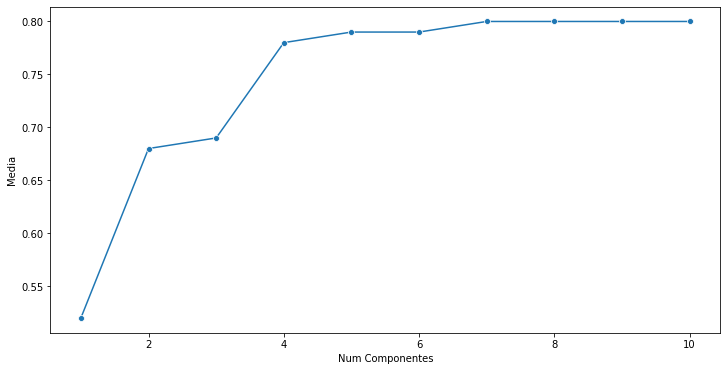

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))  
g = sns.lineplot(y='Media', x = 'Num Componentes', data=df, marker = 'o')
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
plt.savefig('media_pca_componentes_tensorflow-weather.png')

### Curva roc Tensorflow

In [32]:
divisao = 0.2
dim_inputu = 11
pca_mlp = PCA(n_components = 11)
pca_mlp.fit(scaled_data)
x_pca = pca_mlp.transform(scaled_data)

X_train, X_test, y_train, y_test = aplicaKFoldAlterado(x_pca, df_cardio_target, divisao)
predictedprob = aplicaTensor(X_train, X_test, y_train, dim_inputu)

fpr, tpr, thresholds = roc_curve(y_test, predictedprob)
roc_auc= auc(fpr, tpr)

Epoch 1/30
5634/5634 [==============================] - 0s 60us/step - loss: 0.5288 - accuracy: 0.7334
Epoch 2/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4621 - accuracy: 0.7753
Epoch 3/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4554 - accuracy: 0.7808
Epoch 4/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4518 - accuracy: 0.7827
Epoch 5/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4491 - accuracy: 0.7851
Epoch 6/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4467 - accuracy: 0.7847
Epoch 7/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4453 - accuracy: 0.7877
Epoch 8/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4437 - accuracy: 0.7893
Epoch 9/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4414 - accuracy: 0.7872
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - l

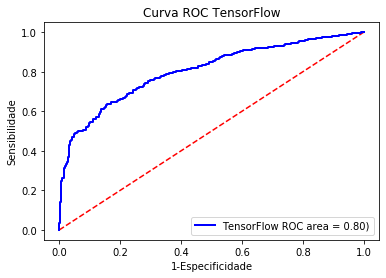

In [33]:
fig = plt.figure()
plt.xlabel('1-Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Curva ROC TensorFlow')
plt.plot(fpr, tpr, color='blue', lw=2, label='TensorFlow ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()
fig.savefig('ROC_TensorFlow-weather.PNG')

## Avaliação exaustiva - Teste/Treino - Cardio

In [34]:
convergencia = False
auc_total = []
auc_num_componentes = []
media_anterior = 0
auc_divisao = []
numAucsComponentes = []
numAucsDivisao = []

for divisao in np.arange(0.1, 1, 0.1):
    print("DIVISAO DA BASE DE DADOS", divisao)

    for numComponentes in range(1,12):
        print(numComponentes)
        
        auc_componente = []
        media_anterior = 0
        qtd_iguais = 0
        
        pca_Tensor = PCA(n_components = numComponentes)
        pca_Tensor.fit(scaled_data)
        x_pca_Tensor = pca_Tensor.transform(scaled_data)
        
        convergencia = False
        print("COMPONENTE", numComponentes)
        
        while(not convergencia):
            
            X_train, X_test, y_train, y_test = aplicaKFoldAlterado(x_pca_Tensor, df_custumer_target, divisao)
            predictedprob = aplicaTensor(X_train, X_test, y_train, numComponentes)
           
            fpr, tpr, thresholds = roc_curve(y_test, predictedprob)
            roc_auc = auc(fpr, tpr)
            
            auc_componente.append(roc_auc)#FEITO
            media_aucs = round(sum(auc_componente) / len(auc_componente), 2)#feito
           
            if media_anterior == media_aucs:
                qtd_iguais = qtd_iguais + 1
            if qtd_iguais == 10:
                
                auc_num_componentes.append(media_aucs)#feito
                auc_total.append(auc_componente)
                convergencia = True
                
            media_anterior = media_aucs
            #print("Media Anterior", media_anterior)
            #print("QUANTIDADE", qtd_iguais)
            
    numAucsDivisao.append(numAucsComponentes)
    auc_divisao.append(auc_total)
    
    numAucsComponentes = []
    auc_total = []
    
    

DIVISAO DA BASE DE DADOS0++++++++++++++++++++++++++++++ 0.1
1
COMPONENTE++++++++++++++++++++++++++++++++++++++ 1
Epoch 1/30
6338/6338 [==============================] - 0s 58us/step - loss: 0.5833 - accuracy: 0.7248
Epoch 2/30
6338/6338 [==============================] - 0s 22us/step - loss: 0.4964 - accuracy: 0.7554
Epoch 3/30
6338/6338 [==============================] - 0s 23us/step - loss: 0.4837 - accuracy: 0.7607
Epoch 4/30
6338/6338 [==============================] - 0s 22us/step - loss: 0.4803 - accuracy: 0.7619
Epoch 5/30
6338/6338 [==============================] - 0s 21us/step - loss: 0.4795 - accuracy: 0.7591
Epoch 6/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4786 - accuracy: 0.7613
Epoch 7/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4798 - accuracy: 0.7581
Epoch 8/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4794 - accuracy: 0.7586
Epoch 9/30
6338/6338 [==============================] - 0s 16us

Epoch 19/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4751 - accuracy: 0.7595
Epoch 20/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4754 - accuracy: 0.7591
Epoch 21/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4750 - accuracy: 0.7636
Epoch 22/30
6338/6338 [==============================] - 0s 37us/step - loss: 0.4759 - accuracy: 0.7592
Epoch 23/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4752 - accuracy: 0.7633
Epoch 24/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4757 - accuracy: 0.7562
Epoch 25/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4752 - accuracy: 0.7632
Epoch 26/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4751 - accuracy: 0.7595
Epoch 27/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4751 - accuracy: 0.7611
Epoch 28/30
6338/6338 [==============================] - 0s 24us

6338/6338 [==============================] - 0s 17us/step - loss: 0.4790 - accuracy: 0.7581
Epoch 9/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4789 - accuracy: 0.7584
Epoch 10/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4790 - accuracy: 0.7632
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4783 - accuracy: 0.7619
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4789 - accuracy: 0.7616
Epoch 13/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4785 - accuracy: 0.7584
Epoch 14/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4788 - accuracy: 0.7622
Epoch 15/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4779 - accuracy: 0.7597
Epoch 16/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4781 - accuracy: 0.7613
Epoch 17/30
6338/6338 [==============================] - 0s 16us/step - loss:

6338/6338 [==============================] - 0s 20us/step - loss: 0.4774 - accuracy: 0.7614
Epoch 28/30
6338/6338 [==============================] - 0s 22us/step - loss: 0.4774 - accuracy: 0.7592
Epoch 29/30
6338/6338 [==============================] - 0s 22us/step - loss: 0.4772 - accuracy: 0.7588
Epoch 30/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4773 - accuracy: 0.7597
Epoch 1/30
6338/6338 [==============================] - 0s 68us/step - loss: 0.5473 - accuracy: 0.7329
Epoch 2/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4949 - accuracy: 0.7588
Epoch 3/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4839 - accuracy: 0.7607
Epoch 4/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4803 - accuracy: 0.7602
Epoch 5/30
6338/6338 [==============================] - 0s 22us/step - loss: 0.4796 - accuracy: 0.7592
Epoch 6/30
6338/6338 [==============================] - 0s 21us/step - loss: 0.47

6338/6338 [==============================] - 0s 16us/step - loss: 0.4814 - accuracy: 0.7603
Epoch 6/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4815 - accuracy: 0.7594
Epoch 7/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4803 - accuracy: 0.7595
Epoch 8/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4814 - accuracy: 0.7583
Epoch 9/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4804 - accuracy: 0.7602
Epoch 10/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4798 - accuracy: 0.7624
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4807 - accuracy: 0.7610
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4798 - accuracy: 0.7573
Epoch 13/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4802 - accuracy: 0.7591
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.

6338/6338 [==============================] - 0s 21us/step - loss: 0.4705 - accuracy: 0.7666
Epoch 13/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4704 - accuracy: 0.7651
Epoch 14/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4721 - accuracy: 0.7618
Epoch 15/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4699 - accuracy: 0.7684
Epoch 16/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4702 - accuracy: 0.7670
Epoch 17/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4703 - accuracy: 0.7649
Epoch 18/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4700 - accuracy: 0.7679
Epoch 19/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4691 - accuracy: 0.7674
Epoch 20/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4695 - accuracy: 0.7696
Epoch 21/30
6338/6338 [==============================] - 0s 17us/step - loss

6338/6338 [==============================] - 0s 19us/step - loss: 0.4698 - accuracy: 0.7648
Epoch 20/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4695 - accuracy: 0.7666
Epoch 21/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4690 - accuracy: 0.7674
Epoch 22/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4694 - accuracy: 0.7671
Epoch 23/30
6338/6338 [==============================] - 0s 23us/step - loss: 0.4688 - accuracy: 0.7690
Epoch 24/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4690 - accuracy: 0.7666
Epoch 25/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4684 - accuracy: 0.7690
Epoch 26/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4689 - accuracy: 0.7652
Epoch 27/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4685 - accuracy: 0.7689
Epoch 28/30
6338/6338 [==============================] - 0s 16us/step - loss

6338/6338 [==============================] - 0s 18us/step - loss: 0.4687 - accuracy: 0.7681
Epoch 28/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4679 - accuracy: 0.7640
Epoch 29/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4684 - accuracy: 0.7657
Epoch 30/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4689 - accuracy: 0.7679
3
COMPONENTE++++++++++++++++++++++++++++++++++++++ 3
Epoch 1/30
6338/6338 [==============================] - 0s 58us/step - loss: 0.5658 - accuracy: 0.6917
Epoch 2/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4930 - accuracy: 0.7600
Epoch 3/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4848 - accuracy: 0.7684
Epoch 4/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4803 - accuracy: 0.7676
Epoch 5/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4759 - accuracy: 0.7698
Epoch 6/30
6338/6338 [======

6338/6338 [==============================] - 0s 31us/step - loss: 0.4912 - accuracy: 0.7588
Epoch 3/30
6338/6338 [==============================] - 0s 30us/step - loss: 0.4830 - accuracy: 0.7627
Epoch 4/30
6338/6338 [==============================] - 0s 21us/step - loss: 0.4762 - accuracy: 0.7700
Epoch 5/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4723 - accuracy: 0.7685
Epoch 6/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4696 - accuracy: 0.7733
Epoch 7/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4664 - accuracy: 0.7684
Epoch 8/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4651 - accuracy: 0.7700
Epoch 9/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4632 - accuracy: 0.7742
Epoch 10/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4620 - accuracy: 0.7755
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.461

6338/6338 [==============================] - 0s 16us/step - loss: 0.4613 - accuracy: 0.7775
Epoch 10/30
6338/6338 [==============================] - 0s 15us/step - loss: 0.4602 - accuracy: 0.7771
Epoch 11/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4602 - accuracy: 0.7734
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4597 - accuracy: 0.7758
Epoch 13/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4583 - accuracy: 0.7788
Epoch 14/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4578 - accuracy: 0.7783
Epoch 15/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4573 - accuracy: 0.7775
Epoch 16/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4571 - accuracy: 0.7793
Epoch 17/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4565 - accuracy: 0.7774
Epoch 18/30
6338/6338 [==============================] - 0s 16us/step - loss

6338/6338 [==============================] - 0s 17us/step - loss: 0.4518 - accuracy: 0.7772
Epoch 29/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4503 - accuracy: 0.7774
Epoch 30/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4515 - accuracy: 0.7772
4
COMPONENTE++++++++++++++++++++++++++++++++++++++ 4
Epoch 1/30
6338/6338 [==============================] - 0s 60us/step - loss: 0.5419 - accuracy: 0.7401
Epoch 2/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4909 - accuracy: 0.7547
Epoch 3/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4812 - accuracy: 0.7652
Epoch 4/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4764 - accuracy: 0.7673
Epoch 5/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4744 - accuracy: 0.7692
Epoch 6/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4711 - accuracy: 0.7730
Epoch 7/30
6338/6338 [=======

6338/6338 [==============================] - 0s 18us/step - loss: 0.4668 - accuracy: 0.7733
Epoch 6/30
6338/6338 [==============================] - 0s 25us/step - loss: 0.4642 - accuracy: 0.7760
Epoch 7/30
6338/6338 [==============================] - 0s 21us/step - loss: 0.4620 - accuracy: 0.7778
Epoch 8/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4603 - accuracy: 0.7793
Epoch 9/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4577 - accuracy: 0.7782
Epoch 10/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4570 - accuracy: 0.7786
Epoch 11/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4565 - accuracy: 0.7794
Epoch 12/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4549 - accuracy: 0.7761
Epoch 13/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4546 - accuracy: 0.7791
Epoch 14/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.

6338/6338 [==============================] - 0s 16us/step - loss: 0.4562 - accuracy: 0.7793
Epoch 13/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4564 - accuracy: 0.7780
Epoch 14/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4557 - accuracy: 0.7791
Epoch 15/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4539 - accuracy: 0.7807
Epoch 16/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4547 - accuracy: 0.7782
Epoch 17/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4551 - accuracy: 0.7766
Epoch 18/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4537 - accuracy: 0.7769
Epoch 19/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4536 - accuracy: 0.7799
Epoch 20/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4523 - accuracy: 0.7821
Epoch 21/30
6338/6338 [==============================] - 0s 16us/step - loss

6338/6338 [==============================] - 0s 55us/step - loss: 0.5260 - accuracy: 0.7428
Epoch 2/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4898 - accuracy: 0.7569
Epoch 3/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4820 - accuracy: 0.7632
Epoch 4/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4772 - accuracy: 0.7644
Epoch 5/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4723 - accuracy: 0.7711
Epoch 6/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4697 - accuracy: 0.7704
Epoch 7/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4675 - accuracy: 0.7714
Epoch 8/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4655 - accuracy: 0.7731
Epoch 9/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4637 - accuracy: 0.7736
Epoch 10/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4629

6338/6338 [==============================] - 0s 16us/step - loss: 0.4573 - accuracy: 0.7736
Epoch 8/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4556 - accuracy: 0.7785
Epoch 9/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4549 - accuracy: 0.7780
Epoch 10/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4536 - accuracy: 0.7797
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4539 - accuracy: 0.7785
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4528 - accuracy: 0.7790
Epoch 13/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4519 - accuracy: 0.7788
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4511 - accuracy: 0.7804
Epoch 15/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4507 - accuracy: 0.7790
Epoch 16/30
6338/6338 [==============================] - 0s 17us/step - loss: 

6338/6338 [==============================] - 0s 18us/step - loss: 0.4417 - accuracy: 0.7856
Epoch 27/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4402 - accuracy: 0.7843
Epoch 28/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4405 - accuracy: 0.7851
Epoch 29/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4409 - accuracy: 0.7835
Epoch 30/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4404 - accuracy: 0.7856
Epoch 1/30
6338/6338 [==============================] - 0s 55us/step - loss: 0.5984 - accuracy: 0.6489
Epoch 2/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4838 - accuracy: 0.7543
Epoch 3/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4713 - accuracy: 0.7644
Epoch 4/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4669 - accuracy: 0.7715
Epoch 5/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4

6338/6338 [==============================] - 0s 17us/step - loss: 0.4647 - accuracy: 0.7734
Epoch 4/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4619 - accuracy: 0.7723
Epoch 5/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4598 - accuracy: 0.7744
Epoch 6/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4582 - accuracy: 0.7761
Epoch 7/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4563 - accuracy: 0.7783
Epoch 8/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4551 - accuracy: 0.7780
Epoch 9/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4542 - accuracy: 0.7791
Epoch 10/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4520 - accuracy: 0.7827
Epoch 11/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4513 - accuracy: 0.7794
Epoch 12/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.45

6338/6338 [==============================] - 0s 17us/step - loss: 0.4484 - accuracy: 0.7824
Epoch 11/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4494 - accuracy: 0.7786
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4467 - accuracy: 0.7823
Epoch 13/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4459 - accuracy: 0.7842
Epoch 14/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4448 - accuracy: 0.7846
Epoch 15/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4446 - accuracy: 0.7840
Epoch 16/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4444 - accuracy: 0.7854
Epoch 17/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4435 - accuracy: 0.7846
Epoch 18/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4431 - accuracy: 0.7849
Epoch 19/30
6338/6338 [==============================] - 0s 17us/step - loss

6338/6338 [==============================] - 0s 20us/step - loss: 0.4362 - accuracy: 0.7881
Epoch 30/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4360 - accuracy: 0.7906
Epoch 1/30
6338/6338 [==============================] - 0s 54us/step - loss: 0.5144 - accuracy: 0.7520
Epoch 2/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4636 - accuracy: 0.7711
Epoch 3/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4578 - accuracy: 0.7720
Epoch 4/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4552 - accuracy: 0.7741
Epoch 5/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4533 - accuracy: 0.7755
Epoch 6/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4516 - accuracy: 0.7772
Epoch 7/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4508 - accuracy: 0.7769
Epoch 8/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4488

6338/6338 [==============================] - 0s 18us/step - loss: 0.4508 - accuracy: 0.7831
Epoch 8/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4486 - accuracy: 0.7865
Epoch 9/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4483 - accuracy: 0.7823
Epoch 10/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4463 - accuracy: 0.7875
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4458 - accuracy: 0.7864
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4450 - accuracy: 0.7886
Epoch 13/30
6338/6338 [==============================] - 0s 15us/step - loss: 0.4437 - accuracy: 0.7872
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4430 - accuracy: 0.7884
Epoch 15/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4437 - accuracy: 0.7903
Epoch 16/30
6338/6338 [==============================] - 0s 16us/step - loss: 

6338/6338 [==============================] - 0s 16us/step - loss: 0.4436 - accuracy: 0.7862
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4428 - accuracy: 0.7856
Epoch 15/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4412 - accuracy: 0.7865
Epoch 16/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4399 - accuracy: 0.7876
Epoch 17/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4398 - accuracy: 0.7872
Epoch 18/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4386 - accuracy: 0.7887
Epoch 19/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4374 - accuracy: 0.7898
Epoch 20/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4359 - accuracy: 0.7911
Epoch 21/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4368 - accuracy: 0.7886
Epoch 22/30
6338/6338 [==============================] - 0s 17us/step - loss

6338/6338 [==============================] - 0s 17us/step - loss: 0.4656 - accuracy: 0.7715
Epoch 3/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4582 - accuracy: 0.7739
Epoch 4/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4545 - accuracy: 0.7783
Epoch 5/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4517 - accuracy: 0.7794
Epoch 6/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4499 - accuracy: 0.7808
Epoch 7/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4470 - accuracy: 0.7840
Epoch 8/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4462 - accuracy: 0.7834
Epoch 9/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4445 - accuracy: 0.7840
Epoch 10/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4429 - accuracy: 0.7838
Epoch 11/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.442

6338/6338 [==============================] - 0s 18us/step - loss: 0.4461 - accuracy: 0.7824
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4453 - accuracy: 0.7813
Epoch 12/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4443 - accuracy: 0.7820
Epoch 13/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4436 - accuracy: 0.7870
Epoch 14/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4425 - accuracy: 0.7848
Epoch 15/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4418 - accuracy: 0.7831
Epoch 16/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4405 - accuracy: 0.7867
Epoch 17/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4396 - accuracy: 0.7851
Epoch 18/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4407 - accuracy: 0.7827
Epoch 19/30
6338/6338 [==============================] - 0s 17us/step - loss

6338/6338 [==============================] - 0s 16us/step - loss: 0.4341 - accuracy: 0.7913
Epoch 30/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4353 - accuracy: 0.7887
Epoch 1/30
6338/6338 [==============================] - 0s 54us/step - loss: 0.5209 - accuracy: 0.7427
Epoch 2/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4648 - accuracy: 0.7685
Epoch 3/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4600 - accuracy: 0.7737
Epoch 4/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4573 - accuracy: 0.7769
Epoch 5/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4547 - accuracy: 0.7756
Epoch 6/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4534 - accuracy: 0.7774
Epoch 7/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4514 - accuracy: 0.7786
Epoch 8/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4508

6338/6338 [==============================] - 0s 17us/step - loss: 0.4453 - accuracy: 0.7813
Epoch 7/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4440 - accuracy: 0.7867
Epoch 8/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4425 - accuracy: 0.7864
Epoch 9/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4399 - accuracy: 0.7891
Epoch 10/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4385 - accuracy: 0.7883
Epoch 11/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4378 - accuracy: 0.7897
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4362 - accuracy: 0.7870
Epoch 13/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4350 - accuracy: 0.7903
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4331 - accuracy: 0.7935
Epoch 15/30
6338/6338 [==============================] - 0s 16us/step - loss: 0

6338/6338 [==============================] - 0s 18us/step - loss: 0.4293 - accuracy: 0.7903
Epoch 26/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4275 - accuracy: 0.7930
Epoch 27/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4278 - accuracy: 0.7898
Epoch 28/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4274 - accuracy: 0.7898
Epoch 29/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4273 - accuracy: 0.7876
Epoch 30/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4261 - accuracy: 0.7913
Epoch 1/30
6338/6338 [==============================] - 0s 68us/step - loss: 0.5245 - accuracy: 0.7430
Epoch 2/30
6338/6338 [==============================] - 0s 21us/step - loss: 0.4659 - accuracy: 0.7682
Epoch 3/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4611 - accuracy: 0.7758
Epoch 4/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.

6338/6338 [==============================] - 0s 18us/step - loss: 0.4616 - accuracy: 0.7777
Epoch 4/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4590 - accuracy: 0.7801
Epoch 5/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4575 - accuracy: 0.7794
Epoch 6/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4548 - accuracy: 0.7802
Epoch 7/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4527 - accuracy: 0.7826
Epoch 8/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4519 - accuracy: 0.7804
Epoch 9/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4502 - accuracy: 0.7821
Epoch 10/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4472 - accuracy: 0.7845
Epoch 11/30
6338/6338 [==============================] - ETA: 0s - loss: 0.4482 - accuracy: 0.78 - 0s 19us/step - loss: 0.4467 - accuracy: 0.7854
Epoch 12/30
6338/6338 [=================

6338/6338 [==============================] - 0s 19us/step - loss: 0.4429 - accuracy: 0.7842
Epoch 10/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4411 - accuracy: 0.7864
Epoch 11/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4400 - accuracy: 0.7881
Epoch 12/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4386 - accuracy: 0.7884
Epoch 13/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4377 - accuracy: 0.7868
Epoch 14/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4366 - accuracy: 0.7865
Epoch 15/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4364 - accuracy: 0.7919
Epoch 16/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4343 - accuracy: 0.7884
Epoch 17/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4342 - accuracy: 0.7889
Epoch 18/30
6338/6338 [==============================] - 0s 17us/step - loss

6338/6338 [==============================] - 0s 17us/step - loss: 0.4288 - accuracy: 0.7886
Epoch 29/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4272 - accuracy: 0.7905
Epoch 30/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4282 - accuracy: 0.7891
Epoch 1/30
6338/6338 [==============================] - 0s 56us/step - loss: 0.5481 - accuracy: 0.7076
Epoch 2/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4607 - accuracy: 0.7711
Epoch 3/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4547 - accuracy: 0.7785
Epoch 4/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4517 - accuracy: 0.7805
Epoch 5/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4495 - accuracy: 0.7835
Epoch 6/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4477 - accuracy: 0.7816
Epoch 7/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.446

6338/6338 [==============================] - 0s 18us/step - loss: 0.4499 - accuracy: 0.7834
Epoch 7/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4489 - accuracy: 0.7821
Epoch 8/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4480 - accuracy: 0.7845
Epoch 9/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4450 - accuracy: 0.7827
Epoch 10/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4443 - accuracy: 0.7820
Epoch 11/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4432 - accuracy: 0.7823
Epoch 12/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4411 - accuracy: 0.7857
Epoch 13/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4407 - accuracy: 0.7856
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4391 - accuracy: 0.7853
Epoch 15/30
6338/6338 [==============================] - 0s 17us/step - loss: 0

6338/6338 [==============================] - 0s 18us/step - loss: 0.4277 - accuracy: 0.7902
Epoch 26/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4272 - accuracy: 0.7911
Epoch 27/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4267 - accuracy: 0.7928
Epoch 28/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4254 - accuracy: 0.7916
Epoch 29/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4248 - accuracy: 0.7939
Epoch 30/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4264 - accuracy: 0.7925
Epoch 1/30
6338/6338 [==============================] - 0s 55us/step - loss: 0.5636 - accuracy: 0.6979
Epoch 2/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4651 - accuracy: 0.7723
Epoch 3/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4564 - accuracy: 0.7755
Epoch 4/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.

6338/6338 [==============================] - 0s 17us/step - loss: 0.4601 - accuracy: 0.7763
Epoch 3/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4567 - accuracy: 0.7749
Epoch 4/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4542 - accuracy: 0.7788
Epoch 5/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4534 - accuracy: 0.7772
Epoch 6/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4518 - accuracy: 0.7812
Epoch 7/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4500 - accuracy: 0.7780
Epoch 8/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4487 - accuracy: 0.7782
Epoch 9/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4472 - accuracy: 0.7827
Epoch 10/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4466 - accuracy: 0.7808
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.445

6338/6338 [==============================] - 0s 18us/step - loss: 0.4442 - accuracy: 0.7876
Epoch 10/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4420 - accuracy: 0.7843
Epoch 11/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4408 - accuracy: 0.7856
Epoch 12/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4412 - accuracy: 0.7859
Epoch 13/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4386 - accuracy: 0.7862
Epoch 14/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4378 - accuracy: 0.7832
Epoch 15/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4374 - accuracy: 0.7859
Epoch 16/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4361 - accuracy: 0.7867
Epoch 17/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4350 - accuracy: 0.7876
Epoch 18/30
6338/6338 [==============================] - 0s 18us/step - loss

6338/6338 [==============================] - 0s 17us/step - loss: 0.4303 - accuracy: 0.7919
Epoch 17/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4297 - accuracy: 0.7920
Epoch 18/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4284 - accuracy: 0.7932
Epoch 19/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4275 - accuracy: 0.7932
Epoch 20/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4267 - accuracy: 0.7903
Epoch 21/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4254 - accuracy: 0.7914
Epoch 22/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4250 - accuracy: 0.7906
Epoch 23/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4241 - accuracy: 0.7932
Epoch 24/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4234 - accuracy: 0.7908
Epoch 25/30
6338/6338 [==============================] - 0s 17us/step - loss

6338/6338 [==============================] - 0s 17us/step - loss: 0.4500 - accuracy: 0.7842
Epoch 6/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4483 - accuracy: 0.7856
Epoch 7/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4461 - accuracy: 0.7853
Epoch 8/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4442 - accuracy: 0.7840
Epoch 9/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4429 - accuracy: 0.7864
Epoch 10/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4404 - accuracy: 0.7875
Epoch 11/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4407 - accuracy: 0.7854
Epoch 12/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4386 - accuracy: 0.7887
Epoch 13/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4365 - accuracy: 0.7859
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.

6338/6338 [==============================] - 0s 18us/step - loss: 0.4385 - accuracy: 0.7870
Epoch 13/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4381 - accuracy: 0.7853
Epoch 14/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4370 - accuracy: 0.7865
Epoch 15/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4342 - accuracy: 0.7873
Epoch 16/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4340 - accuracy: 0.7870
Epoch 17/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4321 - accuracy: 0.7873
Epoch 18/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4319 - accuracy: 0.7892
Epoch 19/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4297 - accuracy: 0.7916
Epoch 20/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4309 - accuracy: 0.7851
Epoch 21/30
6338/6338 [==============================] - 0s 17us/step - loss

6338/6338 [==============================] - 0s 60us/step - loss: 0.5469 - accuracy: 0.7106
Epoch 2/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4660 - accuracy: 0.7745
Epoch 3/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4578 - accuracy: 0.7777
Epoch 4/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4549 - accuracy: 0.7802
Epoch 5/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4529 - accuracy: 0.7820
Epoch 6/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4506 - accuracy: 0.7835
Epoch 7/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4487 - accuracy: 0.7835
Epoch 8/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4476 - accuracy: 0.7837
Epoch 9/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4459 - accuracy: 0.7872
Epoch 10/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4442

6338/6338 [==============================] - 0s 19us/step - loss: 0.4437 - accuracy: 0.7862
Epoch 9/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4428 - accuracy: 0.7873
Epoch 10/30
6338/6338 [==============================] - 0s 21us/step - loss: 0.4419 - accuracy: 0.7862
Epoch 11/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4397 - accuracy: 0.7867
Epoch 12/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4389 - accuracy: 0.7872
Epoch 13/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4367 - accuracy: 0.7881
Epoch 14/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4372 - accuracy: 0.7861
Epoch 15/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4342 - accuracy: 0.7900
Epoch 16/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4331 - accuracy: 0.7906
Epoch 17/30
6338/6338 [==============================] - 0s 17us/step - loss:

6338/6338 [==============================] - 0s 16us/step - loss: 0.4211 - accuracy: 0.7933
Epoch 28/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4209 - accuracy: 0.7949
Epoch 29/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4205 - accuracy: 0.7939
Epoch 30/30
6338/6338 [==============================] - 0s 19us/step - loss: 0.4187 - accuracy: 0.7952
Epoch 1/30
6338/6338 [==============================] - 0s 75us/step - loss: 0.5384 - accuracy: 0.7371
Epoch 2/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4637 - accuracy: 0.7827
Epoch 3/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.4572 - accuracy: 0.7864
Epoch 4/30
6338/6338 [==============================] - 0s 18us/step - loss: 0.4532 - accuracy: 0.7865
Epoch 5/30
6338/6338 [==============================] - 0s 20us/step - loss: 0.4506 - accuracy: 0.7861
Epoch 6/30
6338/6338 [==============================] - 0s 17us/step - loss: 0.44

6338/6338 [==============================] - 0s 17us/step - loss: 0.4492 - accuracy: 0.7785
Epoch 6/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4473 - accuracy: 0.7827
Epoch 7/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4449 - accuracy: 0.7845
Epoch 8/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4430 - accuracy: 0.7868
Epoch 9/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4411 - accuracy: 0.7868
Epoch 10/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4408 - accuracy: 0.7875
Epoch 11/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4384 - accuracy: 0.7900
Epoch 12/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4367 - accuracy: 0.7906
Epoch 13/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.4354 - accuracy: 0.7906
Epoch 14/30
6338/6338 [==============================] - 0s 16us/step - loss: 0.

5634/5634 [==============================] - 0s 18us/step - loss: 0.4762 - accuracy: 0.7661
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4756 - accuracy: 0.7588
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4754 - accuracy: 0.7591
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4754 - accuracy: 0.7639
Epoch 13/30
5634/5634 [==============================] - 0s 20us/step - loss: 0.4753 - accuracy: 0.7629
Epoch 14/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4760 - accuracy: 0.7616
Epoch 15/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4753 - accuracy: 0.7597
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4760 - accuracy: 0.7604
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4756 - accuracy: 0.7613
Epoch 18/30
5634/5634 [==============================] - 0s 18us/step - loss

5634/5634 [==============================] - 0s 18us/step - loss: 0.4805 - accuracy: 0.7577
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4798 - accuracy: 0.7586
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4795 - accuracy: 0.7568
Epoch 1/30
5634/5634 [==============================] - 0s 74us/step - loss: 0.5833 - accuracy: 0.7002
Epoch 2/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.5054 - accuracy: 0.7575
Epoch 3/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4888 - accuracy: 0.7584
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4828 - accuracy: 0.7620
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4815 - accuracy: 0.7597
Epoch 6/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4810 - accuracy: 0.7575
Epoch 7/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.480

5634/5634 [==============================] - 0s 17us/step - loss: 0.4771 - accuracy: 0.7618
Epoch 7/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4772 - accuracy: 0.7609
Epoch 8/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4784 - accuracy: 0.7606
Epoch 9/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4765 - accuracy: 0.7609
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4767 - accuracy: 0.7588
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4771 - accuracy: 0.7600
Epoch 12/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4764 - accuracy: 0.7607
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4763 - accuracy: 0.7620
Epoch 14/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4783 - accuracy: 0.7597
Epoch 15/30
5634/5634 [==============================] - 0s 18us/step - loss: 0

5634/5634 [==============================] - 0s 17us/step - loss: 0.4810 - accuracy: 0.7584
Epoch 26/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4810 - accuracy: 0.7581
Epoch 27/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4809 - accuracy: 0.7607
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4811 - accuracy: 0.7574
Epoch 29/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4816 - accuracy: 0.7597
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4810 - accuracy: 0.7581
Epoch 1/30
5634/5634 [==============================] - 0s 60us/step - loss: 0.6155 - accuracy: 0.6699
Epoch 2/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.5076 - accuracy: 0.7543
Epoch 3/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4928 - accuracy: 0.7623
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.

5634/5634 [==============================] - 0s 60us/step - loss: 0.5495 - accuracy: 0.6951
Epoch 2/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4938 - accuracy: 0.7570
Epoch 3/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4843 - accuracy: 0.7634
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4777 - accuracy: 0.7652
Epoch 5/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4727 - accuracy: 0.7687
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4713 - accuracy: 0.7657
Epoch 7/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4693 - accuracy: 0.7673
Epoch 8/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4688 - accuracy: 0.7666
Epoch 9/30
5634/5634 [==============================] - 0s 24us/step - loss: 0.4670 - accuracy: 0.7694
Epoch 10/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4664

5634/5634 [==============================] - 0s 17us/step - loss: 0.4733 - accuracy: 0.7698
Epoch 9/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4723 - accuracy: 0.7648
Epoch 10/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4718 - accuracy: 0.7677
Epoch 11/30
5634/5634 [==============================] - 0s 19us/step - loss: 0.4714 - accuracy: 0.7719
Epoch 12/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4711 - accuracy: 0.7701
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4705 - accuracy: 0.7707
Epoch 14/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4707 - accuracy: 0.7661
Epoch 15/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4705 - accuracy: 0.7655
Epoch 16/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4698 - accuracy: 0.7698
Epoch 17/30
5634/5634 [==============================] - 0s 21us/step - loss:

5634/5634 [==============================] - 0s 18us/step - loss: 0.4682 - accuracy: 0.7671
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4681 - accuracy: 0.7701
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4683 - accuracy: 0.7691
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4683 - accuracy: 0.7689
Epoch 1/30
5634/5634 [==============================] - 0s 57us/step - loss: 0.5266 - accuracy: 0.7442
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4979 - accuracy: 0.7575
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4898 - accuracy: 0.7579
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4840 - accuracy: 0.7641
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4804 - accuracy: 0.7618
Epoch 6/30
5634/5634 [==============================] - ETA: 0s - loss: 0.4739 - 

5634/5634 [==============================] - 0s 18us/step - loss: 0.4848 - accuracy: 0.7682
Epoch 4/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4778 - accuracy: 0.7716
Epoch 5/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4741 - accuracy: 0.7726
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4709 - accuracy: 0.7756
Epoch 7/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4692 - accuracy: 0.7712
Epoch 8/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4666 - accuracy: 0.7748
Epoch 9/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4655 - accuracy: 0.7732
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4644 - accuracy: 0.7758
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4639 - accuracy: 0.7765
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.46

5634/5634 [==============================] - 0s 15us/step - loss: 0.4668 - accuracy: 0.7670
Epoch 10/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4643 - accuracy: 0.7687
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4635 - accuracy: 0.7703
Epoch 12/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4614 - accuracy: 0.7721
Epoch 13/30
5634/5634 [==============================] - 0s 24us/step - loss: 0.4615 - accuracy: 0.7707
Epoch 14/30
5634/5634 [==============================] - 0s 22us/step - loss: 0.4621 - accuracy: 0.7689
Epoch 15/30
5634/5634 [==============================] - 0s 21us/step - loss: 0.4599 - accuracy: 0.7755 0s - loss: 0.4608 - accuracy: 0.77
Epoch 16/30
5634/5634 [==============================] - 0s 22us/step - loss: 0.4612 - accuracy: 0.7710 0s - loss: 0.4606 - accuracy: 0.77
Epoch 17/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4602 - accuracy: 0.7714
Epoch 

5634/5634 [==============================] - 0s 15us/step - loss: 0.4539 - accuracy: 0.7822
Epoch 16/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4535 - accuracy: 0.7815
Epoch 17/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4536 - accuracy: 0.7810
Epoch 18/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4532 - accuracy: 0.7819
Epoch 19/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4526 - accuracy: 0.7824
Epoch 20/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4528 - accuracy: 0.7817
Epoch 21/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4516 - accuracy: 0.7792
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4508 - accuracy: 0.7803
Epoch 23/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4512 - accuracy: 0.7817
Epoch 24/30
5634/5634 [==============================] - 0s 15us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4802 - accuracy: 0.7629
Epoch 4/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4763 - accuracy: 0.7673
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4727 - accuracy: 0.7698
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4707 - accuracy: 0.7691 0s - loss: 0.4659 - accuracy: 0.76
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4669 - accuracy: 0.7760
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4651 - accuracy: 0.7749
Epoch 9/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4623 - accuracy: 0.7709
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4621 - accuracy: 0.7721
Epoch 11/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4614 - accuracy: 0.7764
Epoch 12/30
5634/5634 [========================

5634/5634 [==============================] - 0s 15us/step - loss: 0.4626 - accuracy: 0.7737
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4612 - accuracy: 0.7771
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4603 - accuracy: 0.7748
Epoch 12/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4585 - accuracy: 0.7728
Epoch 13/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4577 - accuracy: 0.7746
Epoch 14/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4576 - accuracy: 0.7764
Epoch 15/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4568 - accuracy: 0.7723
Epoch 16/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4554 - accuracy: 0.7739
Epoch 17/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4545 - accuracy: 0.7751
Epoch 18/30
5634/5634 [==============================] - 0s 14us/step - loss

5634/5634 [==============================] - 0s 15us/step - loss: 0.4486 - accuracy: 0.7852
Epoch 29/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4494 - accuracy: 0.7785
Epoch 30/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4485 - accuracy: 0.7829
Epoch 1/30
5634/5634 [==============================] - 0s 50us/step - loss: 0.5248 - accuracy: 0.7526
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4875 - accuracy: 0.7655
Epoch 3/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4815 - accuracy: 0.7670
Epoch 4/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4761 - accuracy: 0.7700
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4731 - accuracy: 0.7685
Epoch 6/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4706 - accuracy: 0.7716
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.467

5634/5634 [==============================] - 0s 16us/step - loss: 0.4603 - accuracy: 0.7721
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4588 - accuracy: 0.7748
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4577 - accuracy: 0.7787
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4563 - accuracy: 0.7755
Epoch 9/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4551 - accuracy: 0.7783
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4547 - accuracy: 0.7804
Epoch 11/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4528 - accuracy: 0.7806
Epoch 12/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4518 - accuracy: 0.7787
Epoch 13/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4520 - accuracy: 0.7838
Epoch 14/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.

5634/5634 [==============================] - 0s 15us/step - loss: 0.4434 - accuracy: 0.7847
Epoch 25/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4432 - accuracy: 0.7852
Epoch 26/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4425 - accuracy: 0.7842
Epoch 27/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4427 - accuracy: 0.7863
Epoch 28/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4428 - accuracy: 0.7843
Epoch 29/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4426 - accuracy: 0.7861
Epoch 30/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4418 - accuracy: 0.7849
Epoch 1/30
5634/5634 [==============================] - 0s 48us/step - loss: 0.5123 - accuracy: 0.7439
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4756 - accuracy: 0.7726
Epoch 3/30
5634/5634 [==============================] - 0s 14us/step - loss: 0

5634/5634 [==============================] - 0s 51us/step - loss: 0.5206 - accuracy: 0.7423
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4700 - accuracy: 0.7680
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4638 - accuracy: 0.7728
Epoch 4/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4604 - accuracy: 0.7726
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4584 - accuracy: 0.7733
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4576 - accuracy: 0.7760
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4547 - accuracy: 0.7758
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4534 - accuracy: 0.7772
Epoch 9/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4521 - accuracy: 0.7796
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4510

5634/5634 [==============================] - 0s 15us/step - loss: 0.4529 - accuracy: 0.7799
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4538 - accuracy: 0.7822 0s - loss: 0.4567 - accuracy: 0.77
Epoch 11/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4494 - accuracy: 0.7843
Epoch 12/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4496 - accuracy: 0.7829
Epoch 13/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4484 - accuracy: 0.7859
Epoch 14/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4474 - accuracy: 0.7849
Epoch 15/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4474 - accuracy: 0.7852
Epoch 16/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4464 - accuracy: 0.7849
Epoch 17/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4470 - accuracy: 0.7829
Epoch 18/30
5634/5634 [==================

5634/5634 [==============================] - 0s 15us/step - loss: 0.4473 - accuracy: 0.7875
Epoch 17/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4457 - accuracy: 0.7906
Epoch 18/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4463 - accuracy: 0.7861
Epoch 19/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4450 - accuracy: 0.7870
Epoch 20/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4438 - accuracy: 0.7893
Epoch 21/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4435 - accuracy: 0.7884
Epoch 22/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4446 - accuracy: 0.7888
Epoch 23/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4424 - accuracy: 0.7872
Epoch 24/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4425 - accuracy: 0.7881
Epoch 25/30
5634/5634 [==============================] - 0s 15us/step - loss

5634/5634 [==============================] - 0s 15us/step - loss: 0.4544 - accuracy: 0.7765
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4524 - accuracy: 0.7728
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4494 - accuracy: 0.7774
Epoch 8/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4488 - accuracy: 0.7783
Epoch 9/30
5634/5634 [==============================] - 0s 13us/step - loss: 0.4471 - accuracy: 0.7783
Epoch 10/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4459 - accuracy: 0.7790
Epoch 11/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4454 - accuracy: 0.7780
Epoch 12/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4435 - accuracy: 0.7787
Epoch 13/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4440 - accuracy: 0.7781
Epoch 14/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.

5634/5634 [==============================] - 0s 14us/step - loss: 0.4422 - accuracy: 0.7831
Epoch 13/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4407 - accuracy: 0.7829
Epoch 14/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4399 - accuracy: 0.7813
Epoch 15/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4388 - accuracy: 0.7842
Epoch 16/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4400 - accuracy: 0.7840
Epoch 17/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4370 - accuracy: 0.7854
Epoch 18/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4360 - accuracy: 0.7856
Epoch 19/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4360 - accuracy: 0.7849
Epoch 20/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4346 - accuracy: 0.7843
Epoch 21/30
5634/5634 [==============================] - 0s 15us/step - loss

5634/5634 [==============================] - 0s 49us/step - loss: 0.5157 - accuracy: 0.7167
Epoch 2/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4609 - accuracy: 0.7675
Epoch 3/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4540 - accuracy: 0.7733
Epoch 4/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4514 - accuracy: 0.7765
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4483 - accuracy: 0.7783
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4469 - accuracy: 0.7790
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4453 - accuracy: 0.7812
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4433 - accuracy: 0.7797
Epoch 9/30
5634/5634 [==============================] - 0s 14us/step - loss: 0.4417 - accuracy: 0.7822
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4402

5634/5634 [==============================] - 0s 16us/step - loss: 0.4452 - accuracy: 0.7838
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4453 - accuracy: 0.7817
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4429 - accuracy: 0.7845
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4429 - accuracy: 0.7852
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4403 - accuracy: 0.7845
Epoch 14/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4397 - accuracy: 0.7856
Epoch 15/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4390 - accuracy: 0.7875
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4384 - accuracy: 0.7851
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4379 - accuracy: 0.7861
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4465 - accuracy: 0.7813
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4455 - accuracy: 0.7835
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4447 - accuracy: 0.7827
Epoch 18/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4441 - accuracy: 0.7826
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4424 - accuracy: 0.7852
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4421 - accuracy: 0.7824
Epoch 21/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4407 - accuracy: 0.7863
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4399 - accuracy: 0.7840
Epoch 23/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4405 - accuracy: 0.7822
Epoch 24/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4585 - accuracy: 0.7785
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4561 - accuracy: 0.7792
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4546 - accuracy: 0.7781
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4522 - accuracy: 0.7808
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4521 - accuracy: 0.7812
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4492 - accuracy: 0.7824
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4482 - accuracy: 0.7842
Epoch 11/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4472 - accuracy: 0.7843
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4456 - accuracy: 0.7840
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4

5634/5634 [==============================] - 0s 17us/step - loss: 0.4475 - accuracy: 0.7812
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4459 - accuracy: 0.7859
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4452 - accuracy: 0.7827
Epoch 14/30
5634/5634 [==============================] - 0s 18us/step - loss: 0.4440 - accuracy: 0.7835
Epoch 15/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4423 - accuracy: 0.7874
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4413 - accuracy: 0.7847
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4407 - accuracy: 0.7843
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4404 - accuracy: 0.7854
Epoch 19/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4385 - accuracy: 0.7870
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 16us/step - loss: 0.4287 - accuracy: 0.7929
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4288 - accuracy: 0.7906
Epoch 20/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4281 - accuracy: 0.7927
Epoch 21/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4270 - accuracy: 0.7945
Epoch 22/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4271 - accuracy: 0.7897
Epoch 23/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4258 - accuracy: 0.7902
Epoch 24/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4243 - accuracy: 0.7945
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4240 - accuracy: 0.7946
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4226 - accuracy: 0.7952
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4240 - accuracy: 0.7925
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4247 - accuracy: 0.7925
Epoch 27/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4227 - accuracy: 0.7916
Epoch 28/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4235 - accuracy: 0.7934
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4220 - accuracy: 0.7909
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4211 - accuracy: 0.7938
Epoch 1/30
5634/5634 [==============================] - 0s 50us/step - loss: 0.5364 - accuracy: 0.7270
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4670 - accuracy: 0.7689
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4603 - accuracy: 0.7728
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.

5634/5634 [==============================] - 0s 16us/step - loss: 0.4626 - accuracy: 0.7712
Epoch 3/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4560 - accuracy: 0.7735
Epoch 4/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4532 - accuracy: 0.7771
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4500 - accuracy: 0.7799
Epoch 6/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4481 - accuracy: 0.7758
Epoch 7/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4470 - accuracy: 0.7827
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4453 - accuracy: 0.7806
Epoch 9/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4438 - accuracy: 0.7833
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4421 - accuracy: 0.7838
Epoch 11/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.440

5634/5634 [==============================] - 0s 17us/step - loss: 0.4424 - accuracy: 0.7854
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4421 - accuracy: 0.7840
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4407 - accuracy: 0.7845
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4396 - accuracy: 0.7863
Epoch 14/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4380 - accuracy: 0.7863
Epoch 15/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4381 - accuracy: 0.7886
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4363 - accuracy: 0.7856
Epoch 17/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4349 - accuracy: 0.7877
Epoch 18/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4347 - accuracy: 0.7888
Epoch 19/30
5634/5634 [==============================] - 0s 16us/step - loss

5634/5634 [==============================] - 0s 17us/step - loss: 0.4210 - accuracy: 0.7955
Epoch 30/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4204 - accuracy: 0.7934
Epoch 1/30
5634/5634 [==============================] - 0s 52us/step - loss: 0.5189 - accuracy: 0.7536
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4664 - accuracy: 0.7687
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4609 - accuracy: 0.7698
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4583 - accuracy: 0.7762
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4562 - accuracy: 0.7737
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4546 - accuracy: 0.7771
Epoch 7/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4529 - accuracy: 0.7769
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4514

5634/5634 [==============================] - 0s 18us/step - loss: 0.4520 - accuracy: 0.7804
Epoch 6/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4497 - accuracy: 0.7820
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4479 - accuracy: 0.7826
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4463 - accuracy: 0.7872
Epoch 9/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4454 - accuracy: 0.7879
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4424 - accuracy: 0.7861
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4416 - accuracy: 0.7870
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4401 - accuracy: 0.7867
Epoch 13/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4388 - accuracy: 0.7898
Epoch 14/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.

5634/5634 [==============================] - 0s 17us/step - loss: 0.4282 - accuracy: 0.7934
Epoch 25/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4278 - accuracy: 0.7930
Epoch 26/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4263 - accuracy: 0.7914
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4280 - accuracy: 0.7929
Epoch 28/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4256 - accuracy: 0.7909
Epoch 29/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4252 - accuracy: 0.7950
Epoch 30/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4222 - accuracy: 0.7930
Epoch 1/30
5634/5634 [==============================] - 0s 52us/step - loss: 0.5311 - accuracy: 0.7190
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4636 - accuracy: 0.7756
Epoch 3/30
5634/5634 [==============================] - 0s 16us/step - loss: 0

5634/5634 [==============================] - 0s 51us/step - loss: 0.5166 - accuracy: 0.7453
Epoch 2/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4558 - accuracy: 0.7758
Epoch 3/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4508 - accuracy: 0.7822
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4490 - accuracy: 0.7822
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4469 - accuracy: 0.7794
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4464 - accuracy: 0.7815
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4429 - accuracy: 0.7849
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4421 - accuracy: 0.7868
Epoch 9/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4394 - accuracy: 0.7898
Epoch 10/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4387

5634/5634 [==============================] - 0s 16us/step - loss: 0.4490 - accuracy: 0.7792
Epoch 8/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4469 - accuracy: 0.7799
Epoch 9/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4456 - accuracy: 0.7817
Epoch 10/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4424 - accuracy: 0.7847
Epoch 11/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4404 - accuracy: 0.7859
Epoch 12/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4394 - accuracy: 0.7856
Epoch 13/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4376 - accuracy: 0.7863
Epoch 14/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4357 - accuracy: 0.7859
Epoch 15/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4348 - accuracy: 0.7863
Epoch 16/30
5634/5634 [==============================] - 0s 16us/step - loss: 

5634/5634 [==============================] - 0s 15us/step - loss: 0.4209 - accuracy: 0.7980
Epoch 27/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4210 - accuracy: 0.7975
Epoch 28/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4216 - accuracy: 0.8016
Epoch 29/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4184 - accuracy: 0.7987
Epoch 30/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4164 - accuracy: 0.8000
Epoch 1/30
5634/5634 [==============================] - 0s 50us/step - loss: 0.5524 - accuracy: 0.7164
Epoch 2/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4685 - accuracy: 0.7774
Epoch 3/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4597 - accuracy: 0.7824
Epoch 4/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4555 - accuracy: 0.7861
Epoch 5/30
5634/5634 [==============================] - 0s 15us/step - loss: 0.4

5634/5634 [==============================] - 0s 16us/step - loss: 0.4588 - accuracy: 0.7767
Epoch 4/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4558 - accuracy: 0.7785
Epoch 5/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4519 - accuracy: 0.7826
Epoch 6/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4508 - accuracy: 0.7851
Epoch 7/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4477 - accuracy: 0.7842
Epoch 8/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4456 - accuracy: 0.7852
Epoch 9/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4441 - accuracy: 0.7842
Epoch 10/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.4424 - accuracy: 0.7859
Epoch 11/30
5634/5634 [==============================] - 0s 16us/step - loss: 0.4408 - accuracy: 0.7851
Epoch 12/30
5634/5634 [==============================] - 0s 17us/step - loss: 0.43

4930/4930 [==============================] - 0s 15us/step - loss: 0.4791 - accuracy: 0.7580
Epoch 10/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4787 - accuracy: 0.7600
Epoch 11/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4794 - accuracy: 0.7574
Epoch 12/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4789 - accuracy: 0.7606
Epoch 13/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4791 - accuracy: 0.7592
Epoch 14/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4792 - accuracy: 0.7566
Epoch 15/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4780 - accuracy: 0.7562
Epoch 16/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4782 - accuracy: 0.7596
Epoch 17/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4787 - accuracy: 0.7611
Epoch 18/30
4930/4930 [==============================] - 0s 17us/step - loss

4930/4930 [==============================] - 0s 16us/step - loss: 0.4881 - accuracy: 0.7525
Epoch 17/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4882 - accuracy: 0.7544
Epoch 18/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4885 - accuracy: 0.7542
Epoch 19/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4880 - accuracy: 0.7515
Epoch 20/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4877 - accuracy: 0.7558
Epoch 21/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4882 - accuracy: 0.7598
Epoch 22/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4879 - accuracy: 0.7515
Epoch 23/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4893 - accuracy: 0.7505
Epoch 24/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4877 - accuracy: 0.7550
Epoch 25/30
4930/4930 [==============================] - 0s 16us/step - loss

4930/4930 [==============================] - 0s 16us/step - loss: 0.4867 - accuracy: 0.7574
Epoch 6/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4861 - accuracy: 0.7588
Epoch 7/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4854 - accuracy: 0.7574
Epoch 8/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4853 - accuracy: 0.7542
Epoch 9/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4841 - accuracy: 0.7568
Epoch 10/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4838 - accuracy: 0.7596
Epoch 11/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4841 - accuracy: 0.7580
Epoch 12/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4837 - accuracy: 0.7576
Epoch 13/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4839 - accuracy: 0.7568
Epoch 14/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.

4930/4930 [==============================] - 0s 16us/step - loss: 0.4826 - accuracy: 0.7631
Epoch 25/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4826 - accuracy: 0.7574
Epoch 26/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4820 - accuracy: 0.7558
Epoch 27/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4822 - accuracy: 0.7613
Epoch 28/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4823 - accuracy: 0.7588
Epoch 29/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4826 - accuracy: 0.7604
Epoch 30/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4828 - accuracy: 0.7602
2
COMPONENTE++++++++++++++++++++++++++++++++++++++ 2
Epoch 1/30
4930/4930 [==============================] - 0s 55us/step - loss: 0.5165 - accuracy: 0.7495
Epoch 2/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4872 - accuracy: 0.7604
Epoch 3/30
4930/4930 [===

4930/4930 [==============================] - 0s 54us/step - loss: 0.5592 - accuracy: 0.7300
Epoch 2/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4967 - accuracy: 0.7538
Epoch 3/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4889 - accuracy: 0.7625
Epoch 4/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4827 - accuracy: 0.7613
Epoch 5/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4794 - accuracy: 0.7663
Epoch 6/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4758 - accuracy: 0.7688
Epoch 7/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4721 - accuracy: 0.7682
Epoch 8/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4711 - accuracy: 0.7667
Epoch 9/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4699 - accuracy: 0.7706
Epoch 10/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4706

4930/4930 [==============================] - 0s 14us/step - loss: 0.4756 - accuracy: 0.7641
Epoch 10/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4763 - accuracy: 0.7600
Epoch 11/30
4930/4930 [==============================] - 0s 14us/step - loss: 0.4746 - accuracy: 0.7629
Epoch 12/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4744 - accuracy: 0.7671
Epoch 13/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4729 - accuracy: 0.7675
Epoch 14/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4741 - accuracy: 0.7724
Epoch 15/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4734 - accuracy: 0.7704
Epoch 16/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4733 - accuracy: 0.7696
Epoch 17/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4729 - accuracy: 0.7696
Epoch 18/30
4930/4930 [==============================] - 0s 15us/step - loss

4930/4930 [==============================] - 0s 19us/step - loss: 0.4605 - accuracy: 0.7730
Epoch 17/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4602 - accuracy: 0.7771
Epoch 18/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4587 - accuracy: 0.7781
Epoch 19/30
4930/4930 [==============================] - 0s 20us/step - loss: 0.4585 - accuracy: 0.7755
Epoch 20/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4587 - accuracy: 0.7767
Epoch 21/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4582 - accuracy: 0.7793
Epoch 22/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4577 - accuracy: 0.7759
Epoch 23/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4570 - accuracy: 0.7769
Epoch 24/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4564 - accuracy: 0.7777
Epoch 25/30
4930/4930 [==============================] - 0s 18us/step - loss

4930/4930 [==============================] - 0s 18us/step - loss: 0.4725 - accuracy: 0.7698
Epoch 6/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4698 - accuracy: 0.7718
Epoch 7/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4665 - accuracy: 0.7730
Epoch 8/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4634 - accuracy: 0.7732
Epoch 9/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4635 - accuracy: 0.7740
Epoch 10/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4620 - accuracy: 0.7755
Epoch 11/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4607 - accuracy: 0.7734
Epoch 12/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4608 - accuracy: 0.7753
Epoch 13/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4598 - accuracy: 0.7742
Epoch 14/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.

4930/4930 [==============================] - 0s 18us/step - loss: 0.4561 - accuracy: 0.7807
Epoch 13/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4553 - accuracy: 0.7777
Epoch 14/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4533 - accuracy: 0.7795
Epoch 15/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4538 - accuracy: 0.7815
Epoch 16/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4529 - accuracy: 0.7809
Epoch 17/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4527 - accuracy: 0.7805
Epoch 18/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4525 - accuracy: 0.7805
Epoch 19/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4530 - accuracy: 0.7819
Epoch 20/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4515 - accuracy: 0.7803
Epoch 21/30
4930/4930 [==============================] - 0s 17us/step - loss

4930/4930 [==============================] - 0s 59us/step - loss: 0.5649 - accuracy: 0.7373
Epoch 2/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4928 - accuracy: 0.7657
Epoch 3/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4848 - accuracy: 0.7639
Epoch 4/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4791 - accuracy: 0.7734
Epoch 5/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4748 - accuracy: 0.7728
Epoch 6/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4718 - accuracy: 0.7753
Epoch 7/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4692 - accuracy: 0.7761
Epoch 8/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4669 - accuracy: 0.7779
Epoch 9/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4652 - accuracy: 0.7769
Epoch 10/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4647

4930/4930 [==============================] - 0s 16us/step - loss: 0.4726 - accuracy: 0.7728
Epoch 8/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4708 - accuracy: 0.7767
Epoch 9/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4686 - accuracy: 0.7748
Epoch 10/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4674 - accuracy: 0.7767
Epoch 11/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4671 - accuracy: 0.7757
Epoch 12/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4655 - accuracy: 0.7769
Epoch 13/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4641 - accuracy: 0.7777
Epoch 14/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4635 - accuracy: 0.7789
Epoch 15/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4630 - accuracy: 0.7777
Epoch 16/30
4930/4930 [==============================] - 0s 16us/step - loss: 

4930/4930 [==============================] - 0s 16us/step - loss: 0.4487 - accuracy: 0.7781
Epoch 27/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4481 - accuracy: 0.7795
Epoch 28/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4475 - accuracy: 0.7826
Epoch 29/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4487 - accuracy: 0.7765
Epoch 30/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4477 - accuracy: 0.7842
Epoch 1/30
4930/4930 [==============================] - 0s 56us/step - loss: 0.5924 - accuracy: 0.6795
Epoch 2/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4919 - accuracy: 0.7643
Epoch 3/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4802 - accuracy: 0.7718
Epoch 4/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4733 - accuracy: 0.7771
Epoch 5/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4

4930/4930 [==============================] - 0s 16us/step - loss: 0.4688 - accuracy: 0.7669
Epoch 4/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4659 - accuracy: 0.7673
Epoch 5/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4628 - accuracy: 0.7712
Epoch 6/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4603 - accuracy: 0.7736
Epoch 7/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4598 - accuracy: 0.7763
Epoch 8/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4582 - accuracy: 0.7767
Epoch 9/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4571 - accuracy: 0.7769
Epoch 10/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4557 - accuracy: 0.7795
Epoch 11/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4547 - accuracy: 0.7740
Epoch 12/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.45

4930/4930 [==============================] - 0s 17us/step - loss: 0.4597 - accuracy: 0.7753
Epoch 12/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4586 - accuracy: 0.7765
Epoch 13/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4586 - accuracy: 0.7765
Epoch 14/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4570 - accuracy: 0.7728
Epoch 15/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4561 - accuracy: 0.7765
Epoch 16/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4560 - accuracy: 0.7769
Epoch 17/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4556 - accuracy: 0.7734
Epoch 18/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4535 - accuracy: 0.7807
Epoch 19/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4537 - accuracy: 0.7753
Epoch 20/30
4930/4930 [==============================] - 0s 16us/step - loss

4930/4930 [==============================] - 0s 18us/step - loss: 0.4331 - accuracy: 0.7915
Epoch 1/30
4930/4930 [==============================] - 0s 57us/step - loss: 0.5577 - accuracy: 0.7053
Epoch 2/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4748 - accuracy: 0.7653
Epoch 3/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4666 - accuracy: 0.7706
Epoch 4/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4630 - accuracy: 0.7722
Epoch 5/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4598 - accuracy: 0.7722
Epoch 6/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4592 - accuracy: 0.7730
Epoch 7/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4578 - accuracy: 0.7734
Epoch 8/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4560 - accuracy: 0.7726
Epoch 9/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4550 

4930/4930 [==============================] - 0s 18us/step - loss: 0.4518 - accuracy: 0.7781
Epoch 8/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4506 - accuracy: 0.7852
Epoch 9/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4491 - accuracy: 0.7793
Epoch 10/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4478 - accuracy: 0.7840
Epoch 11/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4459 - accuracy: 0.7848
Epoch 12/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4446 - accuracy: 0.7854
Epoch 13/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4452 - accuracy: 0.7840
Epoch 14/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4428 - accuracy: 0.7819
Epoch 15/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4416 - accuracy: 0.7836
Epoch 16/30
4930/4930 [==============================] - 0s 18us/step - loss: 

4930/4930 [==============================] - 0s 20us/step - loss: 0.4443 - accuracy: 0.7888
Epoch 14/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4422 - accuracy: 0.7897
Epoch 15/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4415 - accuracy: 0.7899
Epoch 16/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4411 - accuracy: 0.7925
Epoch 17/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4401 - accuracy: 0.7903
Epoch 18/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4395 - accuracy: 0.7919
Epoch 19/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4396 - accuracy: 0.7921
Epoch 20/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4383 - accuracy: 0.7917
Epoch 21/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4386 - accuracy: 0.7915
Epoch 22/30
4930/4930 [==============================] - 0s 18us/step - loss

4930/4930 [==============================] - 0s 17us/step - loss: 0.4395 - accuracy: 0.7884
Epoch 20/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4376 - accuracy: 0.7874
Epoch 21/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4381 - accuracy: 0.7882
Epoch 22/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4371 - accuracy: 0.7895
Epoch 23/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4376 - accuracy: 0.7864
Epoch 24/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4362 - accuracy: 0.7878
Epoch 25/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4352 - accuracy: 0.7909
Epoch 26/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4351 - accuracy: 0.7903
Epoch 27/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4347 - accuracy: 0.7878
Epoch 28/30
4930/4930 [==============================] - 0s 16us/step - loss

4930/4930 [==============================] - 0s 18us/step - loss: 0.4424 - accuracy: 0.7897
Epoch 27/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4420 - accuracy: 0.7886
Epoch 28/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4415 - accuracy: 0.7854
Epoch 29/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4420 - accuracy: 0.7832
Epoch 30/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4400 - accuracy: 0.7852
Epoch 1/30
4930/4930 [==============================] - 0s 55us/step - loss: 0.5215 - accuracy: 0.7542
Epoch 2/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4631 - accuracy: 0.7781
Epoch 3/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4573 - accuracy: 0.7805
Epoch 4/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4535 - accuracy: 0.7817
Epoch 5/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4

4930/4930 [==============================] - 0s 16us/step - loss: 0.4649 - accuracy: 0.7740
Epoch 4/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4611 - accuracy: 0.7783
Epoch 5/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4600 - accuracy: 0.7783
Epoch 6/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4568 - accuracy: 0.7793
Epoch 7/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4557 - accuracy: 0.7826
Epoch 8/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4541 - accuracy: 0.7807
Epoch 9/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4524 - accuracy: 0.7868
Epoch 10/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4518 - accuracy: 0.7830
Epoch 11/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4502 - accuracy: 0.7848
Epoch 12/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.44

4930/4930 [==============================] - 0s 19us/step - loss: 0.4478 - accuracy: 0.7805
Epoch 12/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4472 - accuracy: 0.7840
Epoch 13/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4464 - accuracy: 0.7850
Epoch 14/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4448 - accuracy: 0.7848
Epoch 15/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4435 - accuracy: 0.7838
Epoch 16/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4421 - accuracy: 0.7878
Epoch 17/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4415 - accuracy: 0.7876
Epoch 18/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4404 - accuracy: 0.7888
Epoch 19/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4392 - accuracy: 0.7876
Epoch 20/30
4930/4930 [==============================] - 0s 20us/step - loss

4930/4930 [==============================] - 0s 19us/step - loss: 0.4265 - accuracy: 0.7939
Epoch 1/30
4930/4930 [==============================] - 0s 58us/step - loss: 0.5682 - accuracy: 0.6860
Epoch 2/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4666 - accuracy: 0.7694
Epoch 3/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4557 - accuracy: 0.7763
Epoch 4/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4521 - accuracy: 0.7795
Epoch 5/30
4930/4930 [==============================] - 0s 20us/step - loss: 0.4495 - accuracy: 0.7799
Epoch 6/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4494 - accuracy: 0.7819
Epoch 7/30
4930/4930 [==============================] - 0s 20us/step - loss: 0.4474 - accuracy: 0.7832
Epoch 8/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4457 - accuracy: 0.7787
Epoch 9/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4456 

4930/4930 [==============================] - 0s 18us/step - loss: 0.4590 - accuracy: 0.7777
Epoch 7/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4570 - accuracy: 0.7797
Epoch 8/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4548 - accuracy: 0.7795
Epoch 9/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4526 - accuracy: 0.7824
Epoch 10/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4505 - accuracy: 0.7822
Epoch 11/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4517 - accuracy: 0.7832
Epoch 12/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4487 - accuracy: 0.7832
Epoch 13/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4475 - accuracy: 0.7819
Epoch 14/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4468 - accuracy: 0.7854
Epoch 15/30
4930/4930 [==============================] - 0s 18us/step - loss: 0

4930/4930 [==============================] - 0s 18us/step - loss: 0.4341 - accuracy: 0.7929
Epoch 14/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4331 - accuracy: 0.7921
Epoch 15/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4324 - accuracy: 0.7907
Epoch 16/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4300 - accuracy: 0.7929
Epoch 17/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4297 - accuracy: 0.7917
Epoch 18/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4290 - accuracy: 0.7929
Epoch 19/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4273 - accuracy: 0.7915
Epoch 20/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4265 - accuracy: 0.7937
Epoch 21/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4254 - accuracy: 0.7935
Epoch 22/30
4930/4930 [==============================] - 0s 18us/step - loss

4930/4930 [==============================] - 0s 17us/step - loss: 0.4310 - accuracy: 0.7892
Epoch 19/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4296 - accuracy: 0.7884
Epoch 20/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4280 - accuracy: 0.7905
Epoch 21/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4269 - accuracy: 0.7905
Epoch 22/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4266 - accuracy: 0.7933
Epoch 23/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4248 - accuracy: 0.7941
Epoch 24/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4235 - accuracy: 0.7927
Epoch 25/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4226 - accuracy: 0.7943
Epoch 26/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4216 - accuracy: 0.7945
Epoch 27/30
4930/4930 [==============================] - 0s 17us/step - loss

4930/4930 [==============================] - 0s 17us/step - loss: 0.4289 - accuracy: 0.7895
Epoch 26/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4273 - accuracy: 0.7911
Epoch 27/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4256 - accuracy: 0.7927
Epoch 28/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4255 - accuracy: 0.7884
Epoch 29/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4244 - accuracy: 0.7911
Epoch 30/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4235 - accuracy: 0.7951
Epoch 1/30
4930/4930 [==============================] - 0s 57us/step - loss: 0.5772 - accuracy: 0.6917
Epoch 2/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4711 - accuracy: 0.7742
Epoch 3/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4567 - accuracy: 0.7728
Epoch 4/30
4930/4930 [==============================] - 0s 20us/step - loss: 0.

4930/4930 [==============================] - 0s 17us/step - loss: 0.4653 - accuracy: 0.7700
Epoch 3/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4572 - accuracy: 0.7773
Epoch 4/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4538 - accuracy: 0.7813
Epoch 5/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4512 - accuracy: 0.7822
Epoch 6/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4486 - accuracy: 0.7828
Epoch 7/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4459 - accuracy: 0.7854
Epoch 8/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4448 - accuracy: 0.7872
Epoch 9/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4433 - accuracy: 0.7886
Epoch 10/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4413 - accuracy: 0.7874
Epoch 11/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.440

4930/4930 [==============================] - 0s 14us/step - loss: 0.4384 - accuracy: 0.7822
Epoch 11/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4362 - accuracy: 0.7850
Epoch 12/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4344 - accuracy: 0.7868
Epoch 13/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4334 - accuracy: 0.7826
Epoch 14/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4323 - accuracy: 0.7832
Epoch 15/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4304 - accuracy: 0.7886
Epoch 16/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4285 - accuracy: 0.7892
Epoch 17/30
4930/4930 [==============================] - 0s 16us/step - loss: 0.4273 - accuracy: 0.7897
Epoch 18/30
4930/4930 [==============================] - 0s 15us/step - loss: 0.4252 - accuracy: 0.7884
Epoch 19/30
4930/4930 [==============================] - 0s 16us/step - loss

4930/4930 [==============================] - 0s 20us/step - loss: 0.4263 - accuracy: 0.7937
Epoch 30/30
4930/4930 [==============================] - 0s 20us/step - loss: 0.4261 - accuracy: 0.7901
Epoch 1/30
4930/4930 [==============================] - 0s 59us/step - loss: 0.5267 - accuracy: 0.7422
Epoch 2/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4662 - accuracy: 0.7698
Epoch 3/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4579 - accuracy: 0.7704
Epoch 4/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4544 - accuracy: 0.7755
Epoch 5/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4504 - accuracy: 0.7765
Epoch 6/30
4930/4930 [==============================] - 0s 20us/step - loss: 0.4479 - accuracy: 0.7817
Epoch 7/30
4930/4930 [==============================] - 0s 20us/step - loss: 0.4461 - accuracy: 0.7777
Epoch 8/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4442

4930/4930 [==============================] - 0s 19us/step - loss: 0.4433 - accuracy: 0.7907
Epoch 7/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4414 - accuracy: 0.7917
Epoch 8/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4392 - accuracy: 0.7935
Epoch 9/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4388 - accuracy: 0.7905
Epoch 10/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4360 - accuracy: 0.7939
Epoch 11/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4349 - accuracy: 0.7939
Epoch 12/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4346 - accuracy: 0.7972
Epoch 13/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4324 - accuracy: 0.7959
Epoch 14/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4309 - accuracy: 0.7963
Epoch 15/30
4930/4930 [==============================] - 0s 19us/step - loss: 0

4930/4930 [==============================] - 0s 19us/step - loss: 0.4394 - accuracy: 0.7860
Epoch 14/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4384 - accuracy: 0.7882
Epoch 15/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4378 - accuracy: 0.7880
Epoch 16/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4364 - accuracy: 0.7909
Epoch 17/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4346 - accuracy: 0.7909
Epoch 18/30
4930/4930 [==============================] - 0s 17us/step - loss: 0.4341 - accuracy: 0.7915
Epoch 19/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4323 - accuracy: 0.7895
Epoch 20/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4307 - accuracy: 0.7923
Epoch 21/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4308 - accuracy: 0.7905
Epoch 22/30
4930/4930 [==============================] - 0s 19us/step - loss

4930/4930 [==============================] - 0s 18us/step - loss: 0.4745 - accuracy: 0.7653
Epoch 3/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4627 - accuracy: 0.7763
Epoch 4/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4579 - accuracy: 0.7791
Epoch 5/30
4930/4930 [==============================] - 0s 19us/step - loss: 0.4543 - accuracy: 0.7783
Epoch 6/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4519 - accuracy: 0.7826
Epoch 7/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4497 - accuracy: 0.7854
Epoch 8/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4480 - accuracy: 0.7842
Epoch 9/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4464 - accuracy: 0.7860
Epoch 10/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.4438 - accuracy: 0.7866
Epoch 11/30
4930/4930 [==============================] - 0s 18us/step - loss: 0.443

4225/4225 [==============================] - 0s 16us/step - loss: 0.4773 - accuracy: 0.7605
Epoch 9/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4783 - accuracy: 0.7593
Epoch 10/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4765 - accuracy: 0.7595
Epoch 11/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4772 - accuracy: 0.7548
Epoch 12/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4767 - accuracy: 0.7593
Epoch 13/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4767 - accuracy: 0.7600
Epoch 14/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4763 - accuracy: 0.7638
Epoch 15/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4773 - accuracy: 0.7572
Epoch 16/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4765 - accuracy: 0.7609
Epoch 17/30
4225/4225 [==============================] - 0s 17us/step - loss:

4225/4225 [==============================] - 0s 16us/step - loss: 0.4753 - accuracy: 0.7581
Epoch 28/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4747 - accuracy: 0.7557
Epoch 29/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4748 - accuracy: 0.7574
Epoch 30/30
4225/4225 [==============================] - 0s 15us/step - loss: 0.4746 - accuracy: 0.7574
Epoch 1/30
4225/4225 [==============================] - 0s 66us/step - loss: 0.5784 - accuracy: 0.7378
Epoch 2/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.5136 - accuracy: 0.7482
Epoch 3/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4957 - accuracy: 0.7600
Epoch 4/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4882 - accuracy: 0.7569
Epoch 5/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4884 - accuracy: 0.7567
Epoch 6/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.48

4225/4225 [==============================] - 0s 17us/step - loss: 0.4902 - accuracy: 0.7595
Epoch 5/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4878 - accuracy: 0.7557
Epoch 6/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4864 - accuracy: 0.7572
Epoch 7/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4854 - accuracy: 0.7550
Epoch 8/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4845 - accuracy: 0.7562
Epoch 9/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4859 - accuracy: 0.7548
Epoch 10/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4854 - accuracy: 0.7550
Epoch 11/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4846 - accuracy: 0.7586
Epoch 12/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4846 - accuracy: 0.7560
Epoch 13/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4

4225/4225 [==============================] - 0s 17us/step - loss: 0.4730 - accuracy: 0.7664
Epoch 12/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4736 - accuracy: 0.7662
Epoch 13/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4731 - accuracy: 0.7673
Epoch 14/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4728 - accuracy: 0.7650
Epoch 15/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4725 - accuracy: 0.7680
Epoch 16/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4708 - accuracy: 0.7680
Epoch 17/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4712 - accuracy: 0.7666
Epoch 18/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4709 - accuracy: 0.7680
Epoch 19/30
4225/4225 [==============================] - 0s 15us/step - loss: 0.4706 - accuracy: 0.7678
Epoch 20/30
4225/4225 [==============================] - 0s 15us/step - loss

4225/4225 [==============================] - 0s 20us/step - loss: 0.4597 - accuracy: 0.7723
Epoch 19/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4611 - accuracy: 0.7716
Epoch 20/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4598 - accuracy: 0.7718
Epoch 21/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4590 - accuracy: 0.7721
Epoch 22/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4594 - accuracy: 0.7721
Epoch 23/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4585 - accuracy: 0.7744
Epoch 24/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4597 - accuracy: 0.7749
Epoch 25/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4580 - accuracy: 0.7754
Epoch 26/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4596 - accuracy: 0.7756
Epoch 27/30
4225/4225 [==============================] - 0s 21us/step - loss

4225/4225 [==============================] - 0s 18us/step - loss: 0.4516 - accuracy: 0.7770
Epoch 26/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4514 - accuracy: 0.7751
Epoch 27/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4515 - accuracy: 0.7707
Epoch 28/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4527 - accuracy: 0.7716
Epoch 29/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4515 - accuracy: 0.7759
Epoch 30/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4514 - accuracy: 0.7742
Epoch 1/30
4225/4225 [==============================] - 0s 66us/step - loss: 0.5330 - accuracy: 0.7470
Epoch 2/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4931 - accuracy: 0.7638
Epoch 3/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4863 - accuracy: 0.7652
Epoch 4/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.

4225/4225 [==============================] - 0s 18us/step - loss: 0.4860 - accuracy: 0.7638
Epoch 4/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4809 - accuracy: 0.7666
Epoch 5/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4769 - accuracy: 0.7647
Epoch 6/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4729 - accuracy: 0.7716
Epoch 7/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4697 - accuracy: 0.7737
Epoch 8/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4666 - accuracy: 0.7709
Epoch 9/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4635 - accuracy: 0.7718
Epoch 10/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4609 - accuracy: 0.7735
Epoch 11/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4602 - accuracy: 0.7763
Epoch 12/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.45

4225/4225 [==============================] - 0s 18us/step - loss: 0.4632 - accuracy: 0.7785
Epoch 12/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4616 - accuracy: 0.7841
Epoch 13/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4604 - accuracy: 0.7780
Epoch 14/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4593 - accuracy: 0.7794
Epoch 15/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4587 - accuracy: 0.7813
Epoch 16/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4574 - accuracy: 0.7763
Epoch 17/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4570 - accuracy: 0.7820
Epoch 18/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4575 - accuracy: 0.7785
Epoch 19/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4604 - accuracy: 0.7811
Epoch 20/30
4225/4225 [==============================] - 0s 19us/step - loss

4225/4225 [==============================] - 0s 18us/step - loss: 0.4583 - accuracy: 0.7761
Epoch 17/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4569 - accuracy: 0.7751
Epoch 18/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4571 - accuracy: 0.7773
Epoch 19/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4560 - accuracy: 0.7761
Epoch 20/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4559 - accuracy: 0.7761
Epoch 21/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4563 - accuracy: 0.7749
Epoch 22/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4552 - accuracy: 0.7735
Epoch 23/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4562 - accuracy: 0.7740
Epoch 24/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4529 - accuracy: 0.7744
Epoch 25/30
4225/4225 [==============================] - 0s 18us/step - loss

Epoch 5/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4740 - accuracy: 0.7640
Epoch 6/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4708 - accuracy: 0.7688
Epoch 7/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4682 - accuracy: 0.7695
Epoch 8/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4652 - accuracy: 0.7728
Epoch 9/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4646 - accuracy: 0.7638
Epoch 10/30
4225/4225 [==============================] - 0s 27us/step - loss: 0.4618 - accuracy: 0.7702
Epoch 11/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4626 - accuracy: 0.7735
Epoch 12/30
4225/4225 [==============================] - 0s 14us/step - loss: 0.4616 - accuracy: 0.7740
Epoch 13/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4611 - accuracy: 0.7711
Epoch 14/30
4225/4225 [==============================] - 0s 15us/step

4225/4225 [==============================] - 0s 16us/step - loss: 0.4607 - accuracy: 0.7754
Epoch 12/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4596 - accuracy: 0.7761
Epoch 13/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4584 - accuracy: 0.7794
Epoch 14/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4574 - accuracy: 0.7751
Epoch 15/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4577 - accuracy: 0.7709
Epoch 16/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4554 - accuracy: 0.7796
Epoch 17/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4550 - accuracy: 0.7789
Epoch 18/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4539 - accuracy: 0.7770
Epoch 19/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4536 - accuracy: 0.7787
Epoch 20/30
4225/4225 [==============================] - 0s 16us/step - loss

4225/4225 [==============================] - 0s 22us/step - loss: 0.4396 - accuracy: 0.7846
Epoch 19/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4399 - accuracy: 0.7832
Epoch 20/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4380 - accuracy: 0.7834
Epoch 21/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4376 - accuracy: 0.7846
Epoch 22/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4363 - accuracy: 0.7884
Epoch 23/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4368 - accuracy: 0.7837
Epoch 24/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4359 - accuracy: 0.7856
Epoch 25/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4360 - accuracy: 0.7872
Epoch 26/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4346 - accuracy: 0.7884
Epoch 27/30
4225/4225 [==============================] - 0s 21us/step - loss

4225/4225 [==============================] - 0s 21us/step - loss: 0.4379 - accuracy: 0.7867
Epoch 26/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4372 - accuracy: 0.7882
Epoch 27/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4376 - accuracy: 0.7910
Epoch 28/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4358 - accuracy: 0.7886
Epoch 29/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4364 - accuracy: 0.7858
Epoch 30/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4351 - accuracy: 0.7860
Epoch 1/30
4225/4225 [==============================] - 0s 68us/step - loss: 0.5304 - accuracy: 0.7394
Epoch 2/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4801 - accuracy: 0.7702
Epoch 3/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4655 - accuracy: 0.7737
Epoch 4/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.

4225/4225 [==============================] - 0s 69us/step - loss: 0.5409 - accuracy: 0.7209
Epoch 2/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4727 - accuracy: 0.7650
Epoch 3/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4689 - accuracy: 0.7657
Epoch 4/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4652 - accuracy: 0.7707
Epoch 5/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4636 - accuracy: 0.7659
Epoch 6/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4624 - accuracy: 0.7647
Epoch 7/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4613 - accuracy: 0.7733
Epoch 8/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4590 - accuracy: 0.7718
Epoch 9/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4579 - accuracy: 0.7754
Epoch 10/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4571

4225/4225 [==============================] - 0s 20us/step - loss: 0.4438 - accuracy: 0.7825
Epoch 10/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4422 - accuracy: 0.7901
Epoch 11/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4413 - accuracy: 0.7934
Epoch 12/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4398 - accuracy: 0.7893
Epoch 13/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4391 - accuracy: 0.7922
Epoch 14/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4384 - accuracy: 0.7896
Epoch 15/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4389 - accuracy: 0.7886
Epoch 16/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4372 - accuracy: 0.7884
Epoch 17/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4366 - accuracy: 0.7920
Epoch 18/30
4225/4225 [==============================] - 0s 20us/step - loss

4225/4225 [==============================] - 0s 18us/step - loss: 0.4456 - accuracy: 0.7860
Epoch 17/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4454 - accuracy: 0.7822
Epoch 18/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4450 - accuracy: 0.7863
Epoch 19/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4441 - accuracy: 0.7844
Epoch 20/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4421 - accuracy: 0.7884
Epoch 21/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4417 - accuracy: 0.7846
Epoch 22/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4425 - accuracy: 0.7849
Epoch 23/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4409 - accuracy: 0.7889
Epoch 24/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4408 - accuracy: 0.7858
Epoch 25/30
4225/4225 [==============================] - 0s 19us/step - loss

4225/4225 [==============================] - 0s 19us/step - loss: 0.4407 - accuracy: 0.7863
Epoch 23/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4407 - accuracy: 0.7844
Epoch 24/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4398 - accuracy: 0.7851
Epoch 25/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4393 - accuracy: 0.7853
Epoch 26/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4382 - accuracy: 0.7858
Epoch 27/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4384 - accuracy: 0.7834
Epoch 28/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4372 - accuracy: 0.7849
Epoch 29/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4364 - accuracy: 0.7860
Epoch 30/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4357 - accuracy: 0.7851
Epoch 1/30
4225/4225 [==============================] - 0s 65us/step - loss:

4225/4225 [==============================] - 0s 18us/step - loss: 0.4309 - accuracy: 0.7941
Epoch 30/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4298 - accuracy: 0.7931
Epoch 1/30
4225/4225 [==============================] - 0s 64us/step - loss: 0.5776 - accuracy: 0.6930
Epoch 2/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4667 - accuracy: 0.7770
Epoch 3/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4563 - accuracy: 0.7782
Epoch 4/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4524 - accuracy: 0.7825
Epoch 5/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4483 - accuracy: 0.7815
Epoch 6/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4462 - accuracy: 0.7849
Epoch 7/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4447 - accuracy: 0.7841
Epoch 8/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4431

4225/4225 [==============================] - 0s 23us/step - loss: 0.4482 - accuracy: 0.7832
Epoch 7/30
4225/4225 [==============================] - 0s 24us/step - loss: 0.4466 - accuracy: 0.7858
Epoch 8/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4450 - accuracy: 0.7853
Epoch 9/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4435 - accuracy: 0.7846
Epoch 10/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4433 - accuracy: 0.7870
Epoch 11/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4425 - accuracy: 0.7858
Epoch 12/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4401 - accuracy: 0.7834
Epoch 13/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4383 - accuracy: 0.7898
Epoch 14/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4379 - accuracy: 0.7867
Epoch 15/30
4225/4225 [==============================] - 0s 22us/step - loss: 0

4225/4225 [==============================] - 0s 23us/step - loss: 0.4360 - accuracy: 0.7796
Epoch 26/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4353 - accuracy: 0.7870
Epoch 27/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4344 - accuracy: 0.7851
Epoch 28/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4334 - accuracy: 0.7886
Epoch 29/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4338 - accuracy: 0.7856
Epoch 30/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4320 - accuracy: 0.7893
Epoch 1/30
4225/4225 [==============================] - 0s 69us/step - loss: 0.5153 - accuracy: 0.7321
Epoch 2/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4717 - accuracy: 0.7650
Epoch 3/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4634 - accuracy: 0.7735
Epoch 4/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.

4225/4225 [==============================] - 0s 22us/step - loss: 0.4632 - accuracy: 0.7728
Epoch 4/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4592 - accuracy: 0.7740
Epoch 5/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4569 - accuracy: 0.7751
Epoch 6/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4549 - accuracy: 0.7773
Epoch 7/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4529 - accuracy: 0.7785
Epoch 8/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4516 - accuracy: 0.7830
Epoch 9/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4505 - accuracy: 0.7858
Epoch 10/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4484 - accuracy: 0.7849
Epoch 11/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4481 - accuracy: 0.7827
Epoch 12/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.44

4225/4225 [==============================] - 0s 22us/step - loss: 0.4444 - accuracy: 0.7773
Epoch 11/30
4225/4225 [==============================] - 0s 25us/step - loss: 0.4437 - accuracy: 0.7794
Epoch 12/30
4225/4225 [==============================] - 0s 24us/step - loss: 0.4437 - accuracy: 0.7813
Epoch 13/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4415 - accuracy: 0.7801
Epoch 14/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4407 - accuracy: 0.7787
Epoch 15/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4390 - accuracy: 0.7844
Epoch 16/30
4225/4225 [==============================] - 0s 26us/step - loss: 0.4376 - accuracy: 0.7832
Epoch 17/30
4225/4225 [==============================] - 0s 27us/step - loss: 0.4377 - accuracy: 0.7818
Epoch 18/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4349 - accuracy: 0.7846
Epoch 19/30
4225/4225 [==============================] - 0s 22us/step - loss

4225/4225 [==============================] - 0s 21us/step - loss: 0.4211 - accuracy: 0.7950
Epoch 30/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4184 - accuracy: 0.7964
Epoch 1/30
4225/4225 [==============================] - 0s 68us/step - loss: 0.5509 - accuracy: 0.7262
Epoch 2/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4740 - accuracy: 0.7647
Epoch 3/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4632 - accuracy: 0.7711
Epoch 4/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4588 - accuracy: 0.7728
Epoch 5/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4558 - accuracy: 0.7728
Epoch 6/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4542 - accuracy: 0.7761
Epoch 7/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4512 - accuracy: 0.7806
Epoch 8/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4500

4225/4225 [==============================] - 0s 21us/step - loss: 0.4586 - accuracy: 0.7756
Epoch 7/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4557 - accuracy: 0.7787
Epoch 8/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4548 - accuracy: 0.7775
Epoch 9/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4531 - accuracy: 0.7796
Epoch 10/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4526 - accuracy: 0.7761
Epoch 11/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4502 - accuracy: 0.7801
Epoch 12/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4499 - accuracy: 0.7808
Epoch 13/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4488 - accuracy: 0.7792
Epoch 14/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4479 - accuracy: 0.7832
Epoch 15/30
4225/4225 [==============================] - 0s 20us/step - loss: 0

4225/4225 [==============================] - 0s 19us/step - loss: 0.4378 - accuracy: 0.7879
Epoch 14/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4362 - accuracy: 0.7867
Epoch 15/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4365 - accuracy: 0.7879
Epoch 16/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4338 - accuracy: 0.7910
Epoch 17/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4319 - accuracy: 0.7910
Epoch 18/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4305 - accuracy: 0.7910
Epoch 19/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4293 - accuracy: 0.7931
Epoch 20/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4282 - accuracy: 0.7893
Epoch 21/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4264 - accuracy: 0.7931
Epoch 22/30
4225/4225 [==============================] - 0s 20us/step - loss

4225/4225 [==============================] - 0s 18us/step - loss: 0.4636 - accuracy: 0.7794
Epoch 3/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4567 - accuracy: 0.7792
Epoch 4/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4541 - accuracy: 0.7811
Epoch 5/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4524 - accuracy: 0.7839
Epoch 6/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4509 - accuracy: 0.7839
Epoch 7/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4506 - accuracy: 0.7849
Epoch 8/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4490 - accuracy: 0.7872
Epoch 9/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4464 - accuracy: 0.7891
Epoch 10/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4471 - accuracy: 0.7827
Epoch 11/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.444

4225/4225 [==============================] - 0s 19us/step - loss: 0.4440 - accuracy: 0.7872
Epoch 10/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4429 - accuracy: 0.7884
Epoch 11/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4417 - accuracy: 0.7860
Epoch 12/30
4225/4225 [==============================] - 0s 18us/step - loss: 0.4403 - accuracy: 0.7886
Epoch 13/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4383 - accuracy: 0.7920
Epoch 14/30
4225/4225 [==============================] - 0s 16us/step - loss: 0.4364 - accuracy: 0.7920
Epoch 15/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4358 - accuracy: 0.7924
Epoch 16/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4339 - accuracy: 0.7905
Epoch 17/30
4225/4225 [==============================] - 0s 17us/step - loss: 0.4328 - accuracy: 0.7936
Epoch 18/30
4225/4225 [==============================] - 0s 18us/step - loss

4225/4225 [==============================] - 0s 24us/step - loss: 0.4165 - accuracy: 0.7969
Epoch 29/30
4225/4225 [==============================] - 0s 24us/step - loss: 0.4159 - accuracy: 0.8000
Epoch 30/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4139 - accuracy: 0.7988
Epoch 1/30
4225/4225 [==============================] - 0s 70us/step - loss: 0.5739 - accuracy: 0.7207
Epoch 2/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4786 - accuracy: 0.7711
Epoch 3/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4645 - accuracy: 0.7747
Epoch 4/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4606 - accuracy: 0.7770
Epoch 5/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4564 - accuracy: 0.7837
Epoch 6/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4541 - accuracy: 0.7820
Epoch 7/30
4225/4225 [==============================] - 0s 24us/step - loss: 0.450

4225/4225 [==============================] - 0s 24us/step - loss: 0.4590 - accuracy: 0.7796
Epoch 6/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4564 - accuracy: 0.7796
Epoch 7/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4546 - accuracy: 0.7787
Epoch 8/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4533 - accuracy: 0.7770
Epoch 9/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4506 - accuracy: 0.7815
Epoch 10/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4492 - accuracy: 0.7818
Epoch 11/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4472 - accuracy: 0.7863
Epoch 12/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4460 - accuracy: 0.7832
Epoch 13/30
4225/4225 [==============================] - 0s 24us/step - loss: 0.4441 - accuracy: 0.7839
Epoch 14/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.

4225/4225 [==============================] - 0s 23us/step - loss: 0.4208 - accuracy: 0.7993
Epoch 25/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4172 - accuracy: 0.7998
Epoch 26/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4157 - accuracy: 0.8024
Epoch 27/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4162 - accuracy: 0.8002
Epoch 28/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4164 - accuracy: 0.7983
Epoch 29/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4153 - accuracy: 0.7950
Epoch 30/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4127 - accuracy: 0.8002
Epoch 1/30
4225/4225 [==============================] - 0s 79us/step - loss: 0.5450 - accuracy: 0.7075
Epoch 2/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4713 - accuracy: 0.7744
Epoch 3/30
4225/4225 [==============================] - 0s 30us/step - loss: 0

4225/4225 [==============================] - 0s 71us/step - loss: 0.5778 - accuracy: 0.6869
Epoch 2/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4811 - accuracy: 0.7628
Epoch 3/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4661 - accuracy: 0.7749
Epoch 4/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4593 - accuracy: 0.7768
Epoch 5/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4553 - accuracy: 0.7825
Epoch 6/30
4225/4225 [==============================] - 0s 23us/step - loss: 0.4534 - accuracy: 0.7825
Epoch 7/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4505 - accuracy: 0.7841
Epoch 8/30
4225/4225 [==============================] - 0s 24us/step - loss: 0.4487 - accuracy: 0.7853
Epoch 9/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4471 - accuracy: 0.7844
Epoch 10/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4451

4225/4225 [==============================] - 0s 23us/step - loss: 0.4419 - accuracy: 0.7905
Epoch 8/30
4225/4225 [==============================] - 0s 22us/step - loss: 0.4402 - accuracy: 0.7931
Epoch 9/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4385 - accuracy: 0.7912
Epoch 10/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4368 - accuracy: 0.7929
Epoch 11/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4348 - accuracy: 0.7917
Epoch 12/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4334 - accuracy: 0.7941
Epoch 13/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4312 - accuracy: 0.7924
Epoch 14/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4303 - accuracy: 0.7948
Epoch 15/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4294 - accuracy: 0.7972
Epoch 16/30
4225/4225 [==============================] - 0s 20us/step - loss: 

4225/4225 [==============================] - 0s 20us/step - loss: 0.4354 - accuracy: 0.7936
Epoch 14/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4338 - accuracy: 0.7957
Epoch 15/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4322 - accuracy: 0.7936
Epoch 16/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4304 - accuracy: 0.7957
Epoch 17/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4288 - accuracy: 0.7981
Epoch 18/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4281 - accuracy: 0.7995
Epoch 19/30
4225/4225 [==============================] - 0s 19us/step - loss: 0.4258 - accuracy: 0.7986
Epoch 20/30
4225/4225 [==============================] - 0s 20us/step - loss: 0.4245 - accuracy: 0.8002
Epoch 21/30
4225/4225 [==============================] - 0s 21us/step - loss: 0.4233 - accuracy: 0.7974
Epoch 22/30
4225/4225 [==============================] - 0s 20us/step - loss

3521/3521 [==============================] - 0s 19us/step - loss: 0.4782 - accuracy: 0.7646
Epoch 20/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4780 - accuracy: 0.7603
Epoch 21/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4775 - accuracy: 0.7611
Epoch 22/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4781 - accuracy: 0.7586
Epoch 23/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4772 - accuracy: 0.7629
Epoch 24/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4780 - accuracy: 0.7657
Epoch 25/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4777 - accuracy: 0.7609
Epoch 26/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4772 - accuracy: 0.7629
Epoch 27/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4773 - accuracy: 0.7626
Epoch 28/30
3521/3521 [==============================] - 0s 20us/step - loss

3521/3521 [==============================] - 0s 21us/step - loss: 0.4736 - accuracy: 0.7665
Epoch 28/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4751 - accuracy: 0.7640
Epoch 29/30
3521/3521 [==============================] - 0s 18us/step - loss: 0.4741 - accuracy: 0.7637
Epoch 30/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4746 - accuracy: 0.7640
Epoch 1/30
3521/3521 [==============================] - 0s 79us/step - loss: 0.5986 - accuracy: 0.7339
Epoch 2/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.5211 - accuracy: 0.7447
Epoch 3/30
3521/3521 [==============================] - 0s 18us/step - loss: 0.5034 - accuracy: 0.7461
Epoch 4/30
3521/3521 [==============================] - 0s 18us/step - loss: 0.4945 - accuracy: 0.7523
Epoch 5/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4888 - accuracy: 0.7560
Epoch 6/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.48

3521/3521 [==============================] - 0s 27us/step - loss: 0.4855 - accuracy: 0.7637
Epoch 5/30
3521/3521 [==============================] - 0s 32us/step - loss: 0.4816 - accuracy: 0.7657
Epoch 6/30
3521/3521 [==============================] - 0s 30us/step - loss: 0.4784 - accuracy: 0.7654
Epoch 7/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4749 - accuracy: 0.7680
Epoch 8/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4722 - accuracy: 0.7682
Epoch 9/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4708 - accuracy: 0.7702
Epoch 10/30
3521/3521 [==============================] - 0s 29us/step - loss: 0.4700 - accuracy: 0.7717
Epoch 11/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4694 - accuracy: 0.7694
Epoch 12/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4689 - accuracy: 0.7688
Epoch 13/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4

3521/3521 [==============================] - 0s 24us/step - loss: 0.4663 - accuracy: 0.7569
Epoch 11/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4677 - accuracy: 0.7566
Epoch 12/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4651 - accuracy: 0.7631
Epoch 13/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4666 - accuracy: 0.7614
Epoch 14/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4645 - accuracy: 0.7589
Epoch 15/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4634 - accuracy: 0.7620
Epoch 16/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4656 - accuracy: 0.7580
Epoch 17/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4633 - accuracy: 0.7620
Epoch 18/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4639 - accuracy: 0.7558
Epoch 19/30
3521/3521 [==============================] - 0s 24us/step - loss

3521/3521 [==============================] - 0s 24us/step - loss: 0.4698 - accuracy: 0.7768
Epoch 17/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4713 - accuracy: 0.7756
Epoch 18/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4685 - accuracy: 0.7773
Epoch 19/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4713 - accuracy: 0.7782 0s - loss: 0.4696 - accuracy: 0.78
Epoch 20/30
3521/3521 [==============================] - 0s 35us/step - loss: 0.4698 - accuracy: 0.7782
Epoch 21/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4695 - accuracy: 0.7782
Epoch 22/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4675 - accuracy: 0.7771
Epoch 23/30
3521/3521 [==============================] - ETA: 0s - loss: 0.4664 - accuracy: 0.76 - 0s 23us/step - loss: 0.4676 - accuracy: 0.7751
Epoch 24/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4669 - accuracy: 0.7782

3521/3521 [==============================] - 0s 24us/step - loss: 0.4509 - accuracy: 0.7793
Epoch 24/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4545 - accuracy: 0.7685
Epoch 25/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4518 - accuracy: 0.7751
Epoch 26/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4524 - accuracy: 0.7736
Epoch 27/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4515 - accuracy: 0.7731
Epoch 28/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4521 - accuracy: 0.7728
Epoch 29/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4488 - accuracy: 0.7799
Epoch 30/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4500 - accuracy: 0.7796
Epoch 1/30
3521/3521 [==============================] - 0s 80us/step - loss: 0.6153 - accuracy: 0.6657
Epoch 2/30
3521/3521 [==============================] - 0s 22us/step - loss: 

Epoch 1/30
3521/3521 [==============================] - 0s 88us/step - loss: 0.6094 - accuracy: 0.6794
Epoch 2/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.5020 - accuracy: 0.7529
Epoch 3/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4886 - accuracy: 0.7552
Epoch 4/30
3521/3521 [==============================] - ETA: 0s - loss: 0.4875 - accuracy: 0.75 - 0s 22us/step - loss: 0.4830 - accuracy: 0.7597
Epoch 5/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4790 - accuracy: 0.7651
Epoch 6/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4759 - accuracy: 0.7682
Epoch 7/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4741 - accuracy: 0.7697
Epoch 8/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4709 - accuracy: 0.7725
Epoch 9/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4691 - accuracy: 0.7717
Epoch 10/30
3521/3521 [========

3521/3521 [==============================] - 0s 23us/step - loss: 0.4627 - accuracy: 0.7691
Epoch 8/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4614 - accuracy: 0.7751
Epoch 9/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4583 - accuracy: 0.7782
Epoch 10/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4566 - accuracy: 0.7810
Epoch 11/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4548 - accuracy: 0.7807
Epoch 12/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4559 - accuracy: 0.7779
Epoch 13/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4535 - accuracy: 0.7819
Epoch 14/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4521 - accuracy: 0.7822
Epoch 15/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4509 - accuracy: 0.7810
Epoch 16/30
3521/3521 [==============================] - 0s 21us/step - loss: 

3521/3521 [==============================] - 0s 24us/step - loss: 0.4555 - accuracy: 0.7799
Epoch 27/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4561 - accuracy: 0.7782
Epoch 28/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4567 - accuracy: 0.7748
Epoch 29/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4555 - accuracy: 0.7788
Epoch 30/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4549 - accuracy: 0.7790
Epoch 1/30
3521/3521 [==============================] - 0s 80us/step - loss: 0.5377 - accuracy: 0.7373
Epoch 2/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4867 - accuracy: 0.7626
Epoch 3/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4814 - accuracy: 0.7640
Epoch 4/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4777 - accuracy: 0.7694
Epoch 5/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4

3521/3521 [==============================] - 0s 103us/step - loss: 0.6188 - accuracy: 0.6399
Epoch 2/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4875 - accuracy: 0.7575
Epoch 3/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4757 - accuracy: 0.7702
Epoch 4/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4696 - accuracy: 0.7731
Epoch 5/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4662 - accuracy: 0.7717
Epoch 6/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4646 - accuracy: 0.7731
Epoch 7/30
3521/3521 [==============================] - 0s 36us/step - loss: 0.4640 - accuracy: 0.7739
Epoch 8/30
3521/3521 [==============================] - 0s 40us/step - loss: 0.4609 - accuracy: 0.7751
Epoch 9/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4592 - accuracy: 0.7785
Epoch 10/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.459

3521/3521 [==============================] - 0s 28us/step - loss: 0.4436 - accuracy: 0.7901
Epoch 10/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4424 - accuracy: 0.7893
Epoch 11/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4411 - accuracy: 0.7876
Epoch 12/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4401 - accuracy: 0.7895
Epoch 13/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4388 - accuracy: 0.7898
Epoch 14/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4376 - accuracy: 0.7907
Epoch 15/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4364 - accuracy: 0.7904
Epoch 16/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4376 - accuracy: 0.7924
Epoch 17/30
3521/3521 [==============================] - 0s 29us/step - loss: 0.4355 - accuracy: 0.7904
Epoch 18/30
3521/3521 [==============================] - 0s 27us/step - loss

3521/3521 [==============================] - 0s 26us/step - loss: 0.4344 - accuracy: 0.7878
Epoch 29/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4333 - accuracy: 0.7924
Epoch 30/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4337 - accuracy: 0.7910
Epoch 1/30
3521/3521 [==============================] - 0s 116us/step - loss: 0.6051 - accuracy: 0.6964
Epoch 2/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4887 - accuracy: 0.7620
Epoch 3/30
3521/3521 [==============================] - 0s 31us/step - loss: 0.4677 - accuracy: 0.7660
Epoch 4/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4626 - accuracy: 0.7654
Epoch 5/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4593 - accuracy: 0.7694
Epoch 6/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4578 - accuracy: 0.7680
Epoch 7/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.45

3521/3521 [==============================] - 0s 26us/step - loss: 0.4577 - accuracy: 0.7793
Epoch 5/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4557 - accuracy: 0.7785
Epoch 6/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4543 - accuracy: 0.7785
Epoch 7/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4521 - accuracy: 0.7819
Epoch 8/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4505 - accuracy: 0.7853
Epoch 9/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4492 - accuracy: 0.7842
Epoch 10/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4483 - accuracy: 0.7850
Epoch 11/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4474 - accuracy: 0.7844
Epoch 12/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4446 - accuracy: 0.7861
Epoch 13/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4

3521/3521 [==============================] - 0s 25us/step - loss: 0.4427 - accuracy: 0.7836
Epoch 12/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4431 - accuracy: 0.7822
Epoch 13/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4411 - accuracy: 0.7853
Epoch 14/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4408 - accuracy: 0.7836
Epoch 15/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4398 - accuracy: 0.7876
Epoch 16/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4391 - accuracy: 0.7887
Epoch 17/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4384 - accuracy: 0.7847
Epoch 18/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4366 - accuracy: 0.7884
Epoch 19/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4360 - accuracy: 0.7867
Epoch 20/30
3521/3521 [==============================] - 0s 23us/step - loss

3521/3521 [==============================] - 0s 26us/step - loss: 0.4362 - accuracy: 0.7796
Epoch 1/30
3521/3521 [==============================] - 0s 81us/step - loss: 0.5959 - accuracy: 0.7055
Epoch 2/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4822 - accuracy: 0.7580
Epoch 3/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4597 - accuracy: 0.7790
Epoch 4/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4527 - accuracy: 0.7816
Epoch 5/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4508 - accuracy: 0.7824
Epoch 6/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4482 - accuracy: 0.7884
Epoch 7/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4471 - accuracy: 0.7850
Epoch 8/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4462 - accuracy: 0.7890
Epoch 9/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4451 

3521/3521 [==============================] - 0s 25us/step - loss: 0.4535 - accuracy: 0.7788
Epoch 7/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4517 - accuracy: 0.7762
Epoch 8/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4509 - accuracy: 0.7779
Epoch 9/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4489 - accuracy: 0.7805
Epoch 10/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4471 - accuracy: 0.7819
Epoch 11/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4467 - accuracy: 0.7802
Epoch 12/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4441 - accuracy: 0.7822
Epoch 13/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4461 - accuracy: 0.7807
Epoch 14/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4437 - accuracy: 0.7839
Epoch 15/30
3521/3521 [==============================] - 0s 24us/step - loss: 0

3521/3521 [==============================] - 0s 24us/step - loss: 0.4442 - accuracy: 0.7918
Epoch 13/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4435 - accuracy: 0.7938
Epoch 14/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4427 - accuracy: 0.7904
Epoch 15/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4416 - accuracy: 0.7921
Epoch 16/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4406 - accuracy: 0.7918
Epoch 17/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4406 - accuracy: 0.7913
Epoch 18/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4387 - accuracy: 0.7938
Epoch 19/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4389 - accuracy: 0.7932
Epoch 20/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4367 - accuracy: 0.7935
Epoch 21/30
3521/3521 [==============================] - 0s 22us/step - loss

3521/3521 [==============================] - 0s 80us/step - loss: 0.5575 - accuracy: 0.7373
Epoch 2/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4886 - accuracy: 0.7529
Epoch 3/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4735 - accuracy: 0.7711
Epoch 4/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4660 - accuracy: 0.7745
Epoch 5/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4633 - accuracy: 0.7728
Epoch 6/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4611 - accuracy: 0.7753
Epoch 7/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4598 - accuracy: 0.7771
Epoch 8/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4578 - accuracy: 0.7788
Epoch 9/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4561 - accuracy: 0.7807
Epoch 10/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4556

3521/3521 [==============================] - 0s 26us/step - loss: 0.4499 - accuracy: 0.7847
Epoch 8/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4484 - accuracy: 0.7870
Epoch 9/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4485 - accuracy: 0.7836
Epoch 10/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4454 - accuracy: 0.7824
Epoch 11/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4452 - accuracy: 0.7853
Epoch 12/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4435 - accuracy: 0.7844
Epoch 13/30
3521/3521 [==============================] - 0s 20us/step - loss: 0.4435 - accuracy: 0.7833
Epoch 14/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4410 - accuracy: 0.7859
Epoch 15/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4397 - accuracy: 0.7830
Epoch 16/30
3521/3521 [==============================] - 0s 22us/step - loss: 

3521/3521 [==============================] - 0s 22us/step - loss: 0.4260 - accuracy: 0.7955
Epoch 27/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4257 - accuracy: 0.7938
Epoch 28/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4243 - accuracy: 0.7947
Epoch 29/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4252 - accuracy: 0.7966
Epoch 30/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4231 - accuracy: 0.7935
Epoch 1/30
3521/3521 [==============================] - 0s 86us/step - loss: 0.5847 - accuracy: 0.6856
Epoch 2/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4804 - accuracy: 0.7677
Epoch 3/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4626 - accuracy: 0.7731
Epoch 4/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4558 - accuracy: 0.7793
Epoch 5/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4

3521/3521 [==============================] - 0s 29us/step - loss: 0.4715 - accuracy: 0.7736
Epoch 4/30
3521/3521 [==============================] - 0s 29us/step - loss: 0.4635 - accuracy: 0.7734
Epoch 5/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4585 - accuracy: 0.7819
Epoch 6/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4546 - accuracy: 0.7822
Epoch 7/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4529 - accuracy: 0.7830
Epoch 8/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4499 - accuracy: 0.7847
Epoch 9/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4476 - accuracy: 0.7893
Epoch 10/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4458 - accuracy: 0.7890
Epoch 11/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4439 - accuracy: 0.7930
Epoch 12/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.44

3521/3521 [==============================] - 0s 26us/step - loss: 0.4400 - accuracy: 0.7830
Epoch 12/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4380 - accuracy: 0.7876
Epoch 13/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4375 - accuracy: 0.7887
Epoch 14/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4359 - accuracy: 0.7856
Epoch 15/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4348 - accuracy: 0.7864
Epoch 16/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4340 - accuracy: 0.7861
Epoch 17/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4320 - accuracy: 0.7867
Epoch 18/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4311 - accuracy: 0.7890
Epoch 19/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4296 - accuracy: 0.7904
Epoch 20/30
3521/3521 [==============================] - 0s 26us/step - loss

3521/3521 [==============================] - 0s 27us/step - loss: 0.4195 - accuracy: 0.7964
Epoch 1/30
3521/3521 [==============================] - 0s 86us/step - loss: 0.5380 - accuracy: 0.7217
Epoch 2/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4741 - accuracy: 0.7572
Epoch 3/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4687 - accuracy: 0.7623
Epoch 4/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4659 - accuracy: 0.7631
Epoch 5/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4631 - accuracy: 0.7629
Epoch 6/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4617 - accuracy: 0.7680
Epoch 7/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4610 - accuracy: 0.7680
Epoch 8/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4594 - accuracy: 0.7691
Epoch 9/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4584 

3521/3521 [==============================] - 0s 26us/step - loss: 0.4527 - accuracy: 0.7799
Epoch 8/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4528 - accuracy: 0.7779
Epoch 9/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4496 - accuracy: 0.7842
Epoch 10/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4480 - accuracy: 0.7824
Epoch 11/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4462 - accuracy: 0.7867
Epoch 12/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4459 - accuracy: 0.7864
Epoch 13/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4440 - accuracy: 0.7856
Epoch 14/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4435 - accuracy: 0.7864
Epoch 15/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4417 - accuracy: 0.7881
Epoch 16/30
3521/3521 [==============================] - 0s 25us/step - loss: 

3521/3521 [==============================] - 0s 25us/step - loss: 0.4375 - accuracy: 0.7958
Epoch 14/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4355 - accuracy: 0.7921
Epoch 15/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4341 - accuracy: 0.7927
Epoch 16/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4329 - accuracy: 0.7944
Epoch 17/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4304 - accuracy: 0.7947
Epoch 18/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4310 - accuracy: 0.7884
Epoch 19/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4279 - accuracy: 0.7952
Epoch 20/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4270 - accuracy: 0.7978
Epoch 21/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4260 - accuracy: 0.7969
Epoch 22/30
3521/3521 [==============================] - 0s 24us/step - loss

3521/3521 [==============================] - 0s 26us/step - loss: 0.4163 - accuracy: 0.7978
Epoch 19/30
3521/3521 [==============================] - 0s 26us/step - loss: 0.4164 - accuracy: 0.8023
Epoch 20/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4147 - accuracy: 0.7995
Epoch 21/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4126 - accuracy: 0.8032
Epoch 22/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4114 - accuracy: 0.8057
Epoch 23/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4108 - accuracy: 0.8015
Epoch 24/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4091 - accuracy: 0.8040
Epoch 25/30
3521/3521 [==============================] - 0s 19us/step - loss: 0.4077 - accuracy: 0.8023
Epoch 26/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4080 - accuracy: 0.8023
Epoch 27/30
3521/3521 [==============================] - 0s 24us/step - loss

3521/3521 [==============================] - 0s 22us/step - loss: 0.4170 - accuracy: 0.8032
Epoch 26/30
3521/3521 [==============================] - 0s 25us/step - loss: 0.4162 - accuracy: 0.8035
Epoch 27/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4146 - accuracy: 0.8063
Epoch 28/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4128 - accuracy: 0.8055
Epoch 29/30
3521/3521 [==============================] - 0s 24us/step - loss: 0.4118 - accuracy: 0.8052
Epoch 30/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4116 - accuracy: 0.8035
Epoch 1/30
3521/3521 [==============================] - 0s 78us/step - loss: 0.5730 - accuracy: 0.6961
Epoch 2/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4698 - accuracy: 0.7702
Epoch 3/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.4598 - accuracy: 0.7768
Epoch 4/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.

3521/3521 [==============================] - 0s 21us/step - loss: 0.4810 - accuracy: 0.7626
Epoch 3/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4640 - accuracy: 0.7736
Epoch 4/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4592 - accuracy: 0.7739
Epoch 5/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4547 - accuracy: 0.7793
Epoch 6/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4516 - accuracy: 0.7810
Epoch 7/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4488 - accuracy: 0.7827
Epoch 8/30
3521/3521 [==============================] - 0s 21us/step - loss: 0.4458 - accuracy: 0.7833
Epoch 9/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4439 - accuracy: 0.7850
Epoch 10/30
3521/3521 [==============================] - 0s 22us/step - loss: 0.4423 - accuracy: 0.7836
Epoch 11/30
3521/3521 [==============================] - 0s 23us/step - loss: 0.440

3521/3521 [==============================] - 0s 29us/step - loss: 0.4351 - accuracy: 0.7981
Epoch 11/30
3521/3521 [==============================] - 0s 29us/step - loss: 0.4324 - accuracy: 0.7972
Epoch 12/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4308 - accuracy: 0.7975
Epoch 13/30
3521/3521 [==============================] - 0s 29us/step - loss: 0.4297 - accuracy: 0.7998
Epoch 14/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4278 - accuracy: 0.7981
Epoch 15/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4263 - accuracy: 0.8006
Epoch 16/30
3521/3521 [==============================] - 0s 30us/step - loss: 0.4246 - accuracy: 0.8018
Epoch 17/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4239 - accuracy: 0.8035
Epoch 18/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4233 - accuracy: 0.8020
Epoch 19/30
3521/3521 [==============================] - 0s 29us/step - loss

3521/3521 [==============================] - 0s 29us/step - loss: 0.4211 - accuracy: 0.7984
Epoch 30/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4202 - accuracy: 0.7981
Epoch 1/30
3521/3521 [==============================] - 0s 85us/step - loss: 0.6359 - accuracy: 0.6529
Epoch 2/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4980 - accuracy: 0.7697
Epoch 3/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4644 - accuracy: 0.7807
Epoch 4/30
3521/3521 [==============================] - 0s 29us/step - loss: 0.4570 - accuracy: 0.7824
Epoch 5/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4547 - accuracy: 0.7822
Epoch 6/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4504 - accuracy: 0.7856
Epoch 7/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4492 - accuracy: 0.7847
Epoch 8/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4449

3521/3521 [==============================] - 0s 27us/step - loss: 0.4427 - accuracy: 0.7867
Epoch 8/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4414 - accuracy: 0.7878
Epoch 9/30
3521/3521 [==============================] - 0s 29us/step - loss: 0.4391 - accuracy: 0.7887
Epoch 10/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4390 - accuracy: 0.7873
Epoch 11/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4359 - accuracy: 0.7881
Epoch 12/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4351 - accuracy: 0.7876
Epoch 13/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4333 - accuracy: 0.7890
Epoch 14/30
3521/3521 [==============================] - 0s 28us/step - loss: 0.4317 - accuracy: 0.7890
Epoch 15/30
3521/3521 [==============================] - 0s 27us/step - loss: 0.4304 - accuracy: 0.7932
Epoch 16/30
3521/3521 [==============================] - 0s 28us/step - loss: 

Epoch 12/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4836 - accuracy: 0.7600
Epoch 13/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4822 - accuracy: 0.7650
Epoch 14/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4825 - accuracy: 0.7625
Epoch 15/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4823 - accuracy: 0.7622
Epoch 16/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4827 - accuracy: 0.7607
Epoch 17/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4817 - accuracy: 0.7629
Epoch 18/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4818 - accuracy: 0.7604
Epoch 19/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4819 - accuracy: 0.7629
Epoch 20/30
2817/2817 [==============================] - ETA: 0s - loss: 0.4808 - accuracy: 0.75 - 0s 26us/step - loss: 0.4818 - accuracy: 0.7618
Epoch 21/30
2817/2817 

2817/2817 [==============================] - 0s 26us/step - loss: 0.4725 - accuracy: 0.7693
Epoch 20/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4725 - accuracy: 0.7710
Epoch 21/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4715 - accuracy: 0.7714
Epoch 22/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4716 - accuracy: 0.7714
Epoch 23/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4715 - accuracy: 0.7714
Epoch 24/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4724 - accuracy: 0.7707
Epoch 25/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4714 - accuracy: 0.7739
Epoch 26/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4719 - accuracy: 0.7732
Epoch 27/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4751 - accuracy: 0.7685
Epoch 28/30
2817/2817 [==============================] - 0s 26us/step - loss

2817/2817 [==============================] - 0s 27us/step - loss: 0.4709 - accuracy: 0.7639
Epoch 26/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4697 - accuracy: 0.7693
Epoch 27/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4696 - accuracy: 0.7650
Epoch 28/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4716 - accuracy: 0.7625
Epoch 29/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4708 - accuracy: 0.7618
Epoch 30/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4695 - accuracy: 0.7650
Epoch 1/30
2817/2817 [==============================] - 0s 95us/step - loss: 0.6058 - accuracy: 0.6603
Epoch 2/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.5065 - accuracy: 0.7487
Epoch 3/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4932 - accuracy: 0.7547
Epoch 4/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.

2817/2817 [==============================] - 0s 24us/step - loss: 0.4833 - accuracy: 0.7717
Epoch 4/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4780 - accuracy: 0.7703
Epoch 5/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4725 - accuracy: 0.7710
Epoch 6/30
2817/2817 [==============================] - 0s 23us/step - loss: 0.4698 - accuracy: 0.7742
Epoch 7/30
2817/2817 [==============================] - 0s 23us/step - loss: 0.4668 - accuracy: 0.7707
Epoch 8/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4641 - accuracy: 0.7728
Epoch 9/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4621 - accuracy: 0.7760
Epoch 10/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4612 - accuracy: 0.7739
Epoch 11/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4596 - accuracy: 0.7739
Epoch 12/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.45

2817/2817 [==============================] - 0s 25us/step - loss: 0.4661 - accuracy: 0.7710
Epoch 23/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4660 - accuracy: 0.7675
Epoch 24/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4656 - accuracy: 0.7618
Epoch 25/30
2817/2817 [==============================] - 0s 23us/step - loss: 0.4659 - accuracy: 0.7717
Epoch 26/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4671 - accuracy: 0.7696
Epoch 27/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4651 - accuracy: 0.7685
Epoch 28/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4637 - accuracy: 0.7696
Epoch 29/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4640 - accuracy: 0.7646
Epoch 30/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4636 - accuracy: 0.7657
Epoch 1/30
2817/2817 [==============================] - 0s 94us/step - loss:

2817/2817 [==============================] - 0s 24us/step - loss: 0.4539 - accuracy: 0.7781
Epoch 30/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4535 - accuracy: 0.7810
Epoch 1/30
2817/2817 [==============================] - 0s 114us/step - loss: 0.5663 - accuracy: 0.7284
Epoch 2/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4999 - accuracy: 0.7568
Epoch 3/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4937 - accuracy: 0.7586
Epoch 4/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4895 - accuracy: 0.7540
Epoch 5/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4854 - accuracy: 0.7604
Epoch 6/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4811 - accuracy: 0.7611
Epoch 7/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4790 - accuracy: 0.7611
Epoch 8/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.476

2817/2817 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.76 - 0s 32us/step - loss: 0.4913 - accuracy: 0.7632
Epoch 5/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4872 - accuracy: 0.7700 0s - loss: 0.4827 - accuracy: 0.77
Epoch 6/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4843 - accuracy: 0.7700
Epoch 7/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4807 - accuracy: 0.7728
Epoch 8/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4778 - accuracy: 0.7714
Epoch 9/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4744 - accuracy: 0.7742
Epoch 10/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4719 - accuracy: 0.7810
Epoch 11/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4696 - accuracy: 0.7760
Epoch 12/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4687 - accuracy: 0.7767
Epoc

2817/2817 [==============================] - 0s 31us/step - loss: 0.4667 - accuracy: 0.7788
Epoch 10/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4656 - accuracy: 0.7749
Epoch 11/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4635 - accuracy: 0.7799
Epoch 12/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4620 - accuracy: 0.7799
Epoch 13/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4603 - accuracy: 0.7842
Epoch 14/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4598 - accuracy: 0.7810
Epoch 15/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4581 - accuracy: 0.7803
Epoch 16/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4562 - accuracy: 0.7863
Epoch 17/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4563 - accuracy: 0.7831
Epoch 18/30
2817/2817 [==============================] - 0s 30us/step - loss

2817/2817 [==============================] - 0s 30us/step - loss: 0.4739 - accuracy: 0.7682
Epoch 16/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4715 - accuracy: 0.7682
Epoch 17/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4702 - accuracy: 0.7703
Epoch 18/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4692 - accuracy: 0.7710
Epoch 19/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4692 - accuracy: 0.7661
Epoch 20/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4669 - accuracy: 0.7756
Epoch 21/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4676 - accuracy: 0.7710
Epoch 22/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4660 - accuracy: 0.7700
Epoch 23/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4664 - accuracy: 0.7710
Epoch 24/30
2817/2817 [==============================] - 0s 25us/step - loss

2817/2817 [==============================] - 0s 30us/step - loss: 0.4825 - accuracy: 0.7625
Epoch 5/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4794 - accuracy: 0.7671
Epoch 6/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4771 - accuracy: 0.7650
Epoch 7/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4745 - accuracy: 0.7717
Epoch 8/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4725 - accuracy: 0.7707
Epoch 9/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4721 - accuracy: 0.7753
Epoch 10/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4703 - accuracy: 0.7756
Epoch 11/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4674 - accuracy: 0.7739
Epoch 12/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4663 - accuracy: 0.7778
Epoch 13/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4

2817/2817 [==============================] - 0s 29us/step - loss: 0.4447 - accuracy: 0.7831
Epoch 12/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4432 - accuracy: 0.7867
Epoch 13/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4431 - accuracy: 0.7820
Epoch 14/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4410 - accuracy: 0.7838
Epoch 15/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4401 - accuracy: 0.7849
Epoch 16/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4408 - accuracy: 0.7863
Epoch 17/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4388 - accuracy: 0.7884
Epoch 18/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4389 - accuracy: 0.7874
Epoch 19/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4377 - accuracy: 0.7895
Epoch 20/30
2817/2817 [==============================] - 0s 28us/step - loss

2817/2817 [==============================] - 0s 29us/step - loss: 0.4545 - accuracy: 0.7767
Epoch 1/30
2817/2817 [==============================] - 0s 98us/step - loss: 0.5900 - accuracy: 0.6933
Epoch 2/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.5057 - accuracy: 0.7480
Epoch 3/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4899 - accuracy: 0.7618
Epoch 4/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4830 - accuracy: 0.7689
Epoch 5/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4785 - accuracy: 0.7678
Epoch 6/30
2817/2817 [==============================] - ETA: 0s - loss: 0.4809 - accuracy: 0.76 - 0s 27us/step - loss: 0.4738 - accuracy: 0.7721
Epoch 7/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4712 - accuracy: 0.7785
Epoch 8/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4686 - accuracy: 0.7760
Epoch 9/30
2817/2817 [====================

2817/2817 [==============================] - 0s 29us/step - loss: 0.4569 - accuracy: 0.7767
Epoch 7/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4553 - accuracy: 0.7788
Epoch 8/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4537 - accuracy: 0.7799
Epoch 9/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4528 - accuracy: 0.7796
Epoch 10/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4516 - accuracy: 0.7831
Epoch 11/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4507 - accuracy: 0.7824
Epoch 12/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4503 - accuracy: 0.7810
Epoch 13/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4507 - accuracy: 0.7774
Epoch 14/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4489 - accuracy: 0.7884
Epoch 15/30
2817/2817 [==============================] - 0s 29us/step - loss: 0

2817/2817 [==============================] - 0s 28us/step - loss: 0.4418 - accuracy: 0.7884
Epoch 26/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4415 - accuracy: 0.7877
Epoch 27/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4413 - accuracy: 0.7867
Epoch 28/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4414 - accuracy: 0.7863
Epoch 29/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4405 - accuracy: 0.7849
Epoch 30/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4393 - accuracy: 0.7906
Epoch 1/30
2817/2817 [==============================] - 0s 95us/step - loss: 0.6081 - accuracy: 0.6837
Epoch 2/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4922 - accuracy: 0.7597
Epoch 3/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4665 - accuracy: 0.7707
Epoch 4/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.

2817/2817 [==============================] - 0s 23us/step - loss: 0.4747 - accuracy: 0.7742
Epoch 3/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4584 - accuracy: 0.7820
Epoch 4/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4539 - accuracy: 0.7867
Epoch 5/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4515 - accuracy: 0.7874
Epoch 6/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4498 - accuracy: 0.7838
Epoch 7/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4479 - accuracy: 0.7916
Epoch 8/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4468 - accuracy: 0.7852
Epoch 9/30
2817/2817 [==============================] - 0s 23us/step - loss: 0.4442 - accuracy: 0.7891
Epoch 10/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4442 - accuracy: 0.7934
Epoch 11/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.443

2817/2817 [==============================] - 0s 34us/step - loss: 0.4517 - accuracy: 0.7803
Epoch 9/30
2817/2817 [==============================] - 0s 35us/step - loss: 0.4502 - accuracy: 0.7831
Epoch 10/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4507 - accuracy: 0.7842
Epoch 11/30
2817/2817 [==============================] - 0s 36us/step - loss: 0.4511 - accuracy: 0.7824
Epoch 12/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4484 - accuracy: 0.7845
Epoch 13/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4473 - accuracy: 0.7874
Epoch 14/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4457 - accuracy: 0.7888
Epoch 15/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4454 - accuracy: 0.7902
Epoch 16/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4470 - accuracy: 0.7881
Epoch 17/30
2817/2817 [==============================] - 0s 33us/step - loss:

2817/2817 [==============================] - 0s 28us/step - loss: 0.4372 - accuracy: 0.7870
Epoch 28/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4392 - accuracy: 0.7817
Epoch 29/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4387 - accuracy: 0.7820
Epoch 30/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4371 - accuracy: 0.7842
Epoch 1/30
2817/2817 [==============================] - 0s 111us/step - loss: 0.5797 - accuracy: 0.7061
Epoch 2/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4840 - accuracy: 0.7661
Epoch 3/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4716 - accuracy: 0.7806
Epoch 4/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4678 - accuracy: 0.7810
Epoch 5/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4650 - accuracy: 0.7842
Epoch 6/30
2817/2817 [==============================] - 0s 37us/step - loss: 0.4

Epoch 5/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4657 - accuracy: 0.7703
Epoch 6/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4631 - accuracy: 0.7689
Epoch 7/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4616 - accuracy: 0.7707
Epoch 8/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4606 - accuracy: 0.7703
Epoch 9/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4598 - accuracy: 0.7721
Epoch 10/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4577 - accuracy: 0.7742
Epoch 11/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4563 - accuracy: 0.7774
Epoch 12/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4548 - accuracy: 0.7781
Epoch 13/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4540 - accuracy: 0.7785
Epoch 14/30
2817/2817 [==============================] - 0s 32us/step

2817/2817 [==============================] - 0s 38us/step - loss: 0.4505 - accuracy: 0.7863
Epoch 13/30
2817/2817 [==============================] - 0s 36us/step - loss: 0.4489 - accuracy: 0.7874
Epoch 14/30
2817/2817 [==============================] - 0s 35us/step - loss: 0.4486 - accuracy: 0.7888
Epoch 15/30
2817/2817 [==============================] - 0s 35us/step - loss: 0.4469 - accuracy: 0.7906
Epoch 16/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4457 - accuracy: 0.7909
Epoch 17/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4460 - accuracy: 0.7863
Epoch 18/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4450 - accuracy: 0.7888
Epoch 19/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4427 - accuracy: 0.7906
Epoch 20/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4419 - accuracy: 0.7916
Epoch 21/30
2817/2817 [==============================] - 0s 36us/step - loss

2817/2817 [==============================] - 0s 30us/step - loss: 0.4309 - accuracy: 0.7923
Epoch 20/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4309 - accuracy: 0.7955
Epoch 21/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4296 - accuracy: 0.7909
Epoch 22/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4282 - accuracy: 0.7930
Epoch 23/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4287 - accuracy: 0.7923
Epoch 24/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4268 - accuracy: 0.7987
Epoch 25/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4251 - accuracy: 0.7955
Epoch 26/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4267 - accuracy: 0.7898
Epoch 27/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4259 - accuracy: 0.7927
Epoch 28/30
2817/2817 [==============================] - 0s 30us/step - loss

2817/2817 [==============================] - 0s 30us/step - loss: 0.4348 - accuracy: 0.7870
Epoch 25/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4349 - accuracy: 0.7856
Epoch 26/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4347 - accuracy: 0.7867
Epoch 27/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4333 - accuracy: 0.7881
Epoch 28/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4314 - accuracy: 0.7874
Epoch 29/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4313 - accuracy: 0.7891
Epoch 30/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4305 - accuracy: 0.7906
Epoch 1/30
2817/2817 [==============================] - 0s 112us/step - loss: 0.6863 - accuracy: 0.5389
Epoch 2/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.5248 - accuracy: 0.7423
Epoch 3/30
2817/2817 [==============================] - 0s 28us/step - loss: 

2817/2817 [==============================] - 0s 27us/step - loss: 0.4308 - accuracy: 0.7938
Epoch 1/30
2817/2817 [==============================] - 0s 98us/step - loss: 0.5764 - accuracy: 0.7469
Epoch 2/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4785 - accuracy: 0.7639
Epoch 3/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4537 - accuracy: 0.7788
Epoch 4/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4447 - accuracy: 0.7927
Epoch 5/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4430 - accuracy: 0.7863
Epoch 6/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4396 - accuracy: 0.7888
Epoch 7/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4374 - accuracy: 0.7934
Epoch 8/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4352 - accuracy: 0.7969
Epoch 9/30
2817/2817 [==============================] - 0s 39us/step - loss: 0.4340 

2817/2817 [==============================] - 0s 25us/step - loss: 0.4615 - accuracy: 0.7764
Epoch 8/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4583 - accuracy: 0.7774
Epoch 9/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4558 - accuracy: 0.7781
Epoch 10/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4535 - accuracy: 0.7806
Epoch 11/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4530 - accuracy: 0.7824
Epoch 12/30
2817/2817 [==============================] - 0s 27us/step - loss: 0.4500 - accuracy: 0.7810
Epoch 13/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4492 - accuracy: 0.7796
Epoch 14/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4478 - accuracy: 0.7817
Epoch 15/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4465 - accuracy: 0.7810
Epoch 16/30
2817/2817 [==============================] - 0s 27us/step - loss: 

2817/2817 [==============================] - 0s 24us/step - loss: 0.4326 - accuracy: 0.7813
Epoch 27/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4319 - accuracy: 0.7831
Epoch 28/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4290 - accuracy: 0.7859
Epoch 29/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4292 - accuracy: 0.7827
Epoch 30/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4268 - accuracy: 0.7856
Epoch 1/30
2817/2817 [==============================] - 0s 96us/step - loss: 0.5739 - accuracy: 0.7089
Epoch 2/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4772 - accuracy: 0.7682
Epoch 3/30
2817/2817 [==============================] - 0s 23us/step - loss: 0.4594 - accuracy: 0.7749
Epoch 4/30
2817/2817 [==============================] - 0s 24us/step - loss: 0.4548 - accuracy: 0.7796
Epoch 5/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4

2817/2817 [==============================] - 0s 30us/step - loss: 0.4632 - accuracy: 0.7771
Epoch 4/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4569 - accuracy: 0.7788
Epoch 5/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4531 - accuracy: 0.7849
Epoch 6/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4501 - accuracy: 0.7838
Epoch 7/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4481 - accuracy: 0.7877
Epoch 8/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4458 - accuracy: 0.7859
Epoch 9/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4435 - accuracy: 0.7881
Epoch 10/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4418 - accuracy: 0.7895
Epoch 11/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4413 - accuracy: 0.7877
Epoch 12/30
2817/2817 [==============================] - 0s 36us/step - loss: 0.43

2817/2817 [==============================] - 0s 33us/step - loss: 0.4338 - accuracy: 0.7895
Epoch 23/30
2817/2817 [==============================] - 0s 34us/step - loss: 0.4330 - accuracy: 0.7856
Epoch 24/30
2817/2817 [==============================] - 0s 35us/step - loss: 0.4318 - accuracy: 0.7863
Epoch 25/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4297 - accuracy: 0.7881
Epoch 26/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4288 - accuracy: 0.7891
Epoch 27/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4290 - accuracy: 0.7863
Epoch 28/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4269 - accuracy: 0.7810
Epoch 29/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4259 - accuracy: 0.7895
Epoch 30/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4264 - accuracy: 0.7874
Epoch 1/30
2817/2817 [==============================] - 0s 108us/step - loss

2817/2817 [==============================] - 0s 33us/step - loss: 0.4118 - accuracy: 0.8009
Epoch 1/30
2817/2817 [==============================] - 0s 121us/step - loss: 0.6162 - accuracy: 0.6479
Epoch 2/30
2817/2817 [==============================] - 0s 35us/step - loss: 0.4942 - accuracy: 0.7519
Epoch 3/30
2817/2817 [==============================] - 0s 36us/step - loss: 0.4683 - accuracy: 0.7753
Epoch 4/30
2817/2817 [==============================] - 0s 40us/step - loss: 0.4581 - accuracy: 0.7824
Epoch 5/30
2817/2817 [==============================] - 0s 42us/step - loss: 0.4531 - accuracy: 0.7849
Epoch 6/30
2817/2817 [==============================] - 0s 43us/step - loss: 0.4492 - accuracy: 0.7835
Epoch 7/30
2817/2817 [==============================] - 0s 38us/step - loss: 0.4468 - accuracy: 0.7863
Epoch 8/30
2817/2817 [==============================] - 0s 36us/step - loss: 0.4447 - accuracy: 0.7856
Epoch 9/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4433

2817/2817 [==============================] - 0s 30us/step - loss: 0.4339 - accuracy: 0.7959
Epoch 6/30
2817/2817 [==============================] - 0s 33us/step - loss: 0.4306 - accuracy: 0.7955
Epoch 7/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4290 - accuracy: 0.7977
Epoch 8/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4279 - accuracy: 0.7938
Epoch 9/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4249 - accuracy: 0.7977
Epoch 10/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4239 - accuracy: 0.7938
Epoch 11/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4222 - accuracy: 0.7966
Epoch 12/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4216 - accuracy: 0.7994
Epoch 13/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4192 - accuracy: 0.7994
Epoch 14/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.

2817/2817 [==============================] - 0s 32us/step - loss: 0.4157 - accuracy: 0.8019
Epoch 25/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4135 - accuracy: 0.8030
Epoch 26/30
2817/2817 [==============================] - 0s 47us/step - loss: 0.4113 - accuracy: 0.8019
Epoch 27/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4122 - accuracy: 0.8012
Epoch 28/30
2817/2817 [==============================] - 0s 25us/step - loss: 0.4088 - accuracy: 0.8055
Epoch 29/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4084 - accuracy: 0.8065
Epoch 30/30
2817/2817 [==============================] - 0s 26us/step - loss: 0.4066 - accuracy: 0.8048
Epoch 1/30
2817/2817 [==============================] - 0s 99us/step - loss: 0.5596 - accuracy: 0.7327
Epoch 2/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4772 - accuracy: 0.7487
Epoch 3/30
2817/2817 [==============================] - 0s 31us/step - loss: 0

2817/2817 [==============================] - 0s 31us/step - loss: 0.4066 - accuracy: 0.8030
Epoch 1/30
2817/2817 [==============================] - 0s 102us/step - loss: 0.6054 - accuracy: 0.6745
Epoch 2/30
2817/2817 [==============================] - 0s 30us/step - loss: 0.4933 - accuracy: 0.7565
Epoch 3/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4709 - accuracy: 0.7696
Epoch 4/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4613 - accuracy: 0.7803
Epoch 5/30
2817/2817 [==============================] - 0s 32us/step - loss: 0.4573 - accuracy: 0.7831 0s - loss: 0.4451 - accuracy: 0.79
Epoch 6/30
2817/2817 [==============================] - 0s 31us/step - loss: 0.4542 - accuracy: 0.7849
Epoch 7/30
2817/2817 [==============================] - 0s 29us/step - loss: 0.4512 - accuracy: 0.7852
Epoch 8/30
2817/2817 [==============================] - 0s 28us/step - loss: 0.4488 - accuracy: 0.7906
Epoch 9/30
2817/2817 [==========================

2112/2112 [==============================] - 0s 25us/step - loss: 0.5028 - accuracy: 0.7637
Epoch 6/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4948 - accuracy: 0.7628
Epoch 7/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4888 - accuracy: 0.7633
Epoch 8/30
2112/2112 [==============================] - 0s 27us/step - loss: 0.4832 - accuracy: 0.7618
Epoch 9/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4790 - accuracy: 0.7652
Epoch 10/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4777 - accuracy: 0.7623
Epoch 11/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4768 - accuracy: 0.7633
Epoch 12/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4760 - accuracy: 0.7652
Epoch 13/30
2112/2112 [==============================] - 0s 28us/step - loss: 0.4753 - accuracy: 0.7685
Epoch 14/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.

2112/2112 [==============================] - 0s 27us/step - loss: 0.4872 - accuracy: 0.7453
Epoch 25/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4841 - accuracy: 0.7552
Epoch 26/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4851 - accuracy: 0.7505
Epoch 27/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4841 - accuracy: 0.7500
Epoch 28/30
2112/2112 [==============================] - 0s 27us/step - loss: 0.4844 - accuracy: 0.7495
Epoch 29/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4837 - accuracy: 0.7486
Epoch 30/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4837 - accuracy: 0.7500
Epoch 1/30
2112/2112 [==============================] - 0s 119us/step - loss: 0.6433 - accuracy: 0.6586
Epoch 2/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.5508 - accuracy: 0.7348
Epoch 3/30
2112/2112 [==============================] - 0s 26us/step - loss: 

2112/2112 [==============================] - 0s 25us/step - loss: 0.4812 - accuracy: 0.7656
Epoch 30/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.4803 - accuracy: 0.7675
Epoch 1/30
2112/2112 [==============================] - 0s 119us/step - loss: 0.5684 - accuracy: 0.7353
Epoch 2/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.5153 - accuracy: 0.7491
Epoch 3/30
2112/2112 [==============================] - 0s 25us/step - loss: 0.5045 - accuracy: 0.7656
Epoch 4/30
2112/2112 [==============================] - 0s 25us/step - loss: 0.4996 - accuracy: 0.7694
Epoch 5/30
2112/2112 [==============================] - 0s 23us/step - loss: 0.4945 - accuracy: 0.7576
Epoch 6/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4904 - accuracy: 0.7718
Epoch 7/30
2112/2112 [==============================] - 0s 25us/step - loss: 0.4879 - accuracy: 0.7694
Epoch 8/30
2112/2112 [==============================] - 0s 25us/step - loss: 0.484

2112/2112 [==============================] - 0s 25us/step - loss: 0.4772 - accuracy: 0.7751
Epoch 6/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.4748 - accuracy: 0.7746
Epoch 7/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4711 - accuracy: 0.7798
Epoch 8/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.4688 - accuracy: 0.7789
Epoch 9/30
2112/2112 [==============================] - 0s 22us/step - loss: 0.4668 - accuracy: 0.7831
Epoch 10/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.4668 - accuracy: 0.7817
Epoch 11/30
2112/2112 [==============================] - 0s 23us/step - loss: 0.4651 - accuracy: 0.7822
Epoch 12/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.4628 - accuracy: 0.7850
Epoch 13/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.4603 - accuracy: 0.7865
Epoch 14/30
2112/2112 [==============================] - 0s 24us/step - loss: 0.

2112/2112 [==============================] - 0s 36us/step - loss: 0.4685 - accuracy: 0.7779
Epoch 12/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4677 - accuracy: 0.7775
Epoch 13/30
2112/2112 [==============================] - 0s 41us/step - loss: 0.4656 - accuracy: 0.7760
Epoch 14/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4635 - accuracy: 0.7794
Epoch 15/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4616 - accuracy: 0.7803
Epoch 16/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4624 - accuracy: 0.7789
Epoch 17/30
2112/2112 [==============================] - ETA: 0s - loss: 0.4571 - accuracy: 0.78 - 0s 37us/step - loss: 0.4611 - accuracy: 0.7751
Epoch 18/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4591 - accuracy: 0.7808
Epoch 19/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4589 - accuracy: 0.7812
Epoch 20/30
2112/2112 [===========

2112/2112 [==============================] - 0s 36us/step - loss: 0.4589 - accuracy: 0.7860
Epoch 19/30
2112/2112 [==============================] - 0s 39us/step - loss: 0.4578 - accuracy: 0.7831
Epoch 20/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4551 - accuracy: 0.7869
Epoch 21/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4535 - accuracy: 0.7884
Epoch 22/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4541 - accuracy: 0.7860
Epoch 23/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4534 - accuracy: 0.7884
Epoch 24/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4519 - accuracy: 0.7841
Epoch 25/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4516 - accuracy: 0.7874
Epoch 26/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4526 - accuracy: 0.7836
Epoch 27/30
2112/2112 [==============================] - 0s 39us/step - loss

2112/2112 [==============================] - 0s 36us/step - loss: 0.4588 - accuracy: 0.7808
Epoch 25/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4546 - accuracy: 0.7836
Epoch 26/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4561 - accuracy: 0.7808
Epoch 27/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4543 - accuracy: 0.7808
Epoch 28/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4551 - accuracy: 0.7803
Epoch 29/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4528 - accuracy: 0.7850
Epoch 30/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4534 - accuracy: 0.7846
Epoch 1/30
2112/2112 [==============================] - 0s 133us/step - loss: 0.6181 - accuracy: 0.7008
Epoch 2/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.5221 - accuracy: 0.7462
Epoch 3/30
2112/2112 [==============================] - 0s 34us/step - loss: 

2112/2112 [==============================] - 0s 132us/step - loss: 0.6048 - accuracy: 0.7121
Epoch 2/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.5319 - accuracy: 0.7259
Epoch 3/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.5131 - accuracy: 0.7453
Epoch 4/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.5045 - accuracy: 0.7528
Epoch 5/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4987 - accuracy: 0.7557
Epoch 6/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4946 - accuracy: 0.7566
Epoch 7/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4910 - accuracy: 0.7585
Epoch 8/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4884 - accuracy: 0.7595
Epoch 9/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4855 - accuracy: 0.7661
Epoch 10/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.483

2112/2112 [==============================] - 0s 34us/step - loss: 0.4657 - accuracy: 0.7652
Epoch 21/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4643 - accuracy: 0.7642
Epoch 22/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4633 - accuracy: 0.7675
Epoch 23/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4623 - accuracy: 0.7708
Epoch 24/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4619 - accuracy: 0.7652
Epoch 25/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4631 - accuracy: 0.7713
Epoch 26/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4624 - accuracy: 0.7666
Epoch 27/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4592 - accuracy: 0.7718
Epoch 28/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4620 - accuracy: 0.7652
Epoch 29/30
2112/2112 [==============================] - 0s 33us/step - loss

2112/2112 [==============================] - 0s 31us/step - loss: 0.4547 - accuracy: 0.7803
Epoch 29/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4533 - accuracy: 0.7789
Epoch 30/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4538 - accuracy: 0.7798
Epoch 1/30
2112/2112 [==============================] - 0s 122us/step - loss: 0.5791 - accuracy: 0.7240
Epoch 2/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.5115 - accuracy: 0.7467
Epoch 3/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4902 - accuracy: 0.7543
Epoch 4/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4825 - accuracy: 0.7595
Epoch 5/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4768 - accuracy: 0.7704
Epoch 6/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4731 - accuracy: 0.7647
Epoch 7/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.46

2112/2112 [==============================] - 0s 25us/step - loss: 0.4640 - accuracy: 0.7708
Epoch 5/30
2112/2112 [==============================] - 0s 27us/step - loss: 0.4587 - accuracy: 0.7723
Epoch 6/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4560 - accuracy: 0.7770
Epoch 7/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4523 - accuracy: 0.7779
Epoch 8/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4508 - accuracy: 0.7779
Epoch 9/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4485 - accuracy: 0.7808
Epoch 10/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4510 - accuracy: 0.7808
Epoch 11/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4455 - accuracy: 0.7846
Epoch 12/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4443 - accuracy: 0.7869
Epoch 13/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4

2112/2112 [==============================] - 0s 25us/step - loss: 0.4570 - accuracy: 0.7756
Epoch 11/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4565 - accuracy: 0.7737
Epoch 12/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4546 - accuracy: 0.7770
Epoch 13/30
2112/2112 [==============================] - 0s 25us/step - loss: 0.4543 - accuracy: 0.7751
Epoch 14/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4530 - accuracy: 0.7760
Epoch 15/30
2112/2112 [==============================] - 0s 25us/step - loss: 0.4518 - accuracy: 0.7794
Epoch 16/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4517 - accuracy: 0.7746
Epoch 17/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4524 - accuracy: 0.7779
Epoch 18/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4510 - accuracy: 0.7817
Epoch 19/30
2112/2112 [==============================] - 0s 32us/step - loss

2112/2112 [==============================] - 0s 38us/step - loss: 0.4487 - accuracy: 0.7803
Epoch 17/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4485 - accuracy: 0.7789
Epoch 18/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4482 - accuracy: 0.7812
Epoch 19/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4467 - accuracy: 0.7817
Epoch 20/30
2112/2112 [==============================] - 0s 40us/step - loss: 0.4461 - accuracy: 0.7779
Epoch 21/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4460 - accuracy: 0.7822
Epoch 22/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4446 - accuracy: 0.7822
Epoch 23/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4440 - accuracy: 0.7827
Epoch 24/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4429 - accuracy: 0.7841
Epoch 25/30
2112/2112 [==============================] - 0s 38us/step - loss

2112/2112 [==============================] - 0s 37us/step - loss: 0.4479 - accuracy: 0.7893
Epoch 6/30
2112/2112 [==============================] - 0s 42us/step - loss: 0.4438 - accuracy: 0.7917
Epoch 7/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4432 - accuracy: 0.7850
Epoch 8/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4398 - accuracy: 0.7955
Epoch 9/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4386 - accuracy: 0.7907
Epoch 10/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4365 - accuracy: 0.7926
Epoch 11/30
2112/2112 [==============================] - 0s 39us/step - loss: 0.4346 - accuracy: 0.7907
Epoch 12/30
2112/2112 [==============================] - 0s 40us/step - loss: 0.4339 - accuracy: 0.7950
Epoch 13/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4334 - accuracy: 0.8016
Epoch 14/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.

2112/2112 [==============================] - 0s 38us/step - loss: 0.4383 - accuracy: 0.7997
Epoch 11/30
2112/2112 [==============================] - 0s 42us/step - loss: 0.4374 - accuracy: 0.7997 0s - loss: 0.4367 - accuracy: 0.79
Epoch 12/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4352 - accuracy: 0.7992
Epoch 13/30
2112/2112 [==============================] - 0s 40us/step - loss: 0.4354 - accuracy: 0.7983
Epoch 14/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4335 - accuracy: 0.7988
Epoch 15/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4364 - accuracy: 0.7997
Epoch 16/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4322 - accuracy: 0.8035
Epoch 17/30
2112/2112 [==============================] - 0s 41us/step - loss: 0.4301 - accuracy: 0.7997
Epoch 18/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4292 - accuracy: 0.8016
Epoch 19/30
2112/2112 [==================

2112/2112 [==============================] - 0s 37us/step - loss: 0.4555 - accuracy: 0.7831
Epoch 16/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4531 - accuracy: 0.7836
Epoch 17/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4517 - accuracy: 0.7822
Epoch 18/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4518 - accuracy: 0.7798
Epoch 19/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4501 - accuracy: 0.7808
Epoch 20/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4489 - accuracy: 0.7794
Epoch 21/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4482 - accuracy: 0.7850
Epoch 22/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4476 - accuracy: 0.7846
Epoch 23/30
2112/2112 [==============================] - ETA: 0s - loss: 0.4439 - accuracy: 0.78 - 0s 38us/step - loss: 0.4460 - accuracy: 0.7817
Epoch 24/30
2112/2112 [===========

2112/2112 [==============================] - 0s 33us/step - loss: 0.4286 - accuracy: 0.8030
Epoch 23/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4273 - accuracy: 0.8054
Epoch 24/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4271 - accuracy: 0.8049
Epoch 25/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4261 - accuracy: 0.8035
Epoch 26/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4249 - accuracy: 0.8063
Epoch 27/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4241 - accuracy: 0.8111
Epoch 28/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4229 - accuracy: 0.8078
Epoch 29/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4234 - accuracy: 0.8007
Epoch 30/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4207 - accuracy: 0.8040
8
COMPONENTE++++++++++++++++++++++++++++++++++++++ 8
Epoch 1/30
2112/2112 [=

2112/2112 [==============================] - 0s 34us/step - loss: 0.4349 - accuracy: 0.7836
Epoch 30/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4340 - accuracy: 0.7869
Epoch 1/30
2112/2112 [==============================] - 0s 135us/step - loss: 0.5689 - accuracy: 0.7348
Epoch 2/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4794 - accuracy: 0.7557
Epoch 3/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4486 - accuracy: 0.7808
Epoch 4/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4387 - accuracy: 0.7846
Epoch 5/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4353 - accuracy: 0.7917
Epoch 6/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4326 - accuracy: 0.7898
Epoch 7/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4300 - accuracy: 0.7973
Epoch 8/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.426

2112/2112 [==============================] - 0s 33us/step - loss: 0.4523 - accuracy: 0.7888
Epoch 8/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4502 - accuracy: 0.7855
Epoch 9/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4484 - accuracy: 0.7884
Epoch 10/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4470 - accuracy: 0.7860
Epoch 11/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4449 - accuracy: 0.7921
Epoch 12/30
2112/2112 [==============================] - 0s 42us/step - loss: 0.4440 - accuracy: 0.7898
Epoch 13/30
2112/2112 [==============================] - 0s 39us/step - loss: 0.4442 - accuracy: 0.7926
Epoch 14/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4416 - accuracy: 0.7931
Epoch 15/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4401 - accuracy: 0.7940
Epoch 16/30
2112/2112 [==============================] - 0s 35us/step - loss: 

2112/2112 [==============================] - 0s 31us/step - loss: 0.4329 - accuracy: 0.7931
Epoch 15/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4309 - accuracy: 0.7884
Epoch 16/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4299 - accuracy: 0.7940
Epoch 17/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4287 - accuracy: 0.7950
Epoch 18/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4278 - accuracy: 0.7950
Epoch 19/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4273 - accuracy: 0.7964
Epoch 20/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4264 - accuracy: 0.7983
Epoch 21/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4238 - accuracy: 0.8002
Epoch 22/30
2112/2112 [==============================] - 0s 28us/step - loss: 0.4229 - accuracy: 0.7992
Epoch 23/30
2112/2112 [==============================] - 0s 30us/step - loss

2112/2112 [==============================] - 0s 27us/step - loss: 0.4619 - accuracy: 0.7609
Epoch 4/30
2112/2112 [==============================] - 0s 28us/step - loss: 0.4517 - accuracy: 0.7708
Epoch 5/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4460 - accuracy: 0.7770
Epoch 6/30
2112/2112 [==============================] - 0s 25us/step - loss: 0.4429 - accuracy: 0.7760
Epoch 7/30
2112/2112 [==============================] - 0s 23us/step - loss: 0.4391 - accuracy: 0.7836
Epoch 8/30
2112/2112 [==============================] - 0s 28us/step - loss: 0.4374 - accuracy: 0.7775
Epoch 9/30
2112/2112 [==============================] - 0s 28us/step - loss: 0.4357 - accuracy: 0.7836
Epoch 10/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4327 - accuracy: 0.7836
Epoch 11/30
2112/2112 [==============================] - 0s 27us/step - loss: 0.4319 - accuracy: 0.7850
Epoch 12/30
2112/2112 [==============================] - 0s 28us/step - loss: 0.42

2112/2112 [==============================] - 0s 25us/step - loss: 0.4500 - accuracy: 0.7831
Epoch 11/30
2112/2112 [==============================] - 0s 29us/step - loss: 0.4486 - accuracy: 0.7841
Epoch 12/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4474 - accuracy: 0.7812
Epoch 13/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4471 - accuracy: 0.7850
Epoch 14/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4444 - accuracy: 0.7874
Epoch 15/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4441 - accuracy: 0.7879
Epoch 16/30
2112/2112 [==============================] - 0s 28us/step - loss: 0.4423 - accuracy: 0.7860
Epoch 17/30
2112/2112 [==============================] - 0s 26us/step - loss: 0.4413 - accuracy: 0.7884
Epoch 18/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4409 - accuracy: 0.7879
Epoch 19/30
2112/2112 [==============================] - 0s 27us/step - loss

2112/2112 [==============================] - 0s 37us/step - loss: 0.4459 - accuracy: 0.7794
Epoch 16/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4436 - accuracy: 0.7860
Epoch 17/30
2112/2112 [==============================] - 0s 39us/step - loss: 0.4440 - accuracy: 0.7812
Epoch 18/30
2112/2112 [==============================] - 0s 40us/step - loss: 0.4404 - accuracy: 0.7860
Epoch 19/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4393 - accuracy: 0.7865
Epoch 20/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4378 - accuracy: 0.7865
Epoch 21/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4363 - accuracy: 0.7869
Epoch 22/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4349 - accuracy: 0.7936
Epoch 23/30
2112/2112 [==============================] - 0s 48us/step - loss: 0.4347 - accuracy: 0.7865
Epoch 24/30
2112/2112 [==============================] - 0s 37us/step - loss

2112/2112 [==============================] - 0s 33us/step - loss: 0.4596 - accuracy: 0.7770
Epoch 5/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4535 - accuracy: 0.7737
Epoch 6/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4506 - accuracy: 0.7812
Epoch 7/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4479 - accuracy: 0.7779
Epoch 8/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4455 - accuracy: 0.7827
Epoch 9/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4431 - accuracy: 0.7822
Epoch 10/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4414 - accuracy: 0.7841
Epoch 11/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4388 - accuracy: 0.7803
Epoch 12/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4389 - accuracy: 0.7831
Epoch 13/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4

Epoch 22/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4196 - accuracy: 0.8092
Epoch 23/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4189 - accuracy: 0.8134
Epoch 24/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4173 - accuracy: 0.8111
Epoch 25/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4169 - accuracy: 0.8106
Epoch 26/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4179 - accuracy: 0.8068
Epoch 27/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4171 - accuracy: 0.8097
Epoch 28/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4150 - accuracy: 0.8097
Epoch 29/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4134 - accuracy: 0.8116
Epoch 30/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4132 - accuracy: 0.8149
Epoch 1/30
2112/2112 [==============================] - 0s 134us

2112/2112 [==============================] - 0s 37us/step - loss: 0.4254 - accuracy: 0.8016
Epoch 11/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4241 - accuracy: 0.8049
Epoch 12/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4215 - accuracy: 0.8082
Epoch 13/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4214 - accuracy: 0.8073
Epoch 14/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4200 - accuracy: 0.8068
Epoch 15/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4179 - accuracy: 0.8073
Epoch 16/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4160 - accuracy: 0.8078
Epoch 17/30
2112/2112 [==============================] - 0s 37us/step - loss: 0.4149 - accuracy: 0.8101
Epoch 18/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4133 - accuracy: 0.8116
Epoch 19/30
2112/2112 [==============================] - 0s 34us/step - loss

2112/2112 [==============================] - 0s 34us/step - loss: 0.4327 - accuracy: 0.7959
Epoch 17/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4316 - accuracy: 0.7945
Epoch 18/30
2112/2112 [==============================] - 0s 38us/step - loss: 0.4311 - accuracy: 0.7940
Epoch 19/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4294 - accuracy: 0.7945
Epoch 20/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4288 - accuracy: 0.7936
Epoch 21/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4267 - accuracy: 0.7983
Epoch 22/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4248 - accuracy: 0.7983
Epoch 23/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4238 - accuracy: 0.8007
Epoch 24/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4228 - accuracy: 0.8011
Epoch 25/30
2112/2112 [==============================] - 0s 34us/step - loss

2112/2112 [==============================] - 0s 35us/step - loss: 0.4253 - accuracy: 0.7921
Epoch 24/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4243 - accuracy: 0.7926
Epoch 25/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4230 - accuracy: 0.7902
Epoch 26/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4211 - accuracy: 0.7945
Epoch 27/30
2112/2112 [==============================] - 0s 36us/step - loss: 0.4212 - accuracy: 0.7912
Epoch 28/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4187 - accuracy: 0.7978
Epoch 29/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4175 - accuracy: 0.7964
Epoch 30/30
2112/2112 [==============================] - 0s 35us/step - loss: 0.4151 - accuracy: 0.7955
Epoch 1/30
2112/2112 [==============================] - 0s 129us/step - loss: 0.5926 - accuracy: 0.7116
Epoch 2/30
2112/2112 [==============================] - 0s 31us/step - loss:

2112/2112 [==============================] - 0s 34us/step - loss: 0.4175 - accuracy: 0.7988
Epoch 1/30
2112/2112 [==============================] - 0s 213us/step - loss: 0.5632 - accuracy: 0.7211
Epoch 2/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4813 - accuracy: 0.7618
Epoch 3/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4643 - accuracy: 0.7789
Epoch 4/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4565 - accuracy: 0.7812
Epoch 5/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4514 - accuracy: 0.7812
Epoch 6/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4487 - accuracy: 0.7822
Epoch 7/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4428 - accuracy: 0.7860
Epoch 8/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4396 - accuracy: 0.7874
Epoch 9/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4365

2112/2112 [==============================] - 0s 33us/step - loss: 0.4482 - accuracy: 0.7860
Epoch 9/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4453 - accuracy: 0.7898
Epoch 10/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4430 - accuracy: 0.7907
Epoch 11/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4412 - accuracy: 0.7902
Epoch 12/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4388 - accuracy: 0.7917
Epoch 13/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4360 - accuracy: 0.7964
Epoch 14/30
2112/2112 [==============================] - 0s 33us/step - loss: 0.4350 - accuracy: 0.7964
Epoch 15/30
2112/2112 [==============================] - 0s 34us/step - loss: 0.4328 - accuracy: 0.7992
Epoch 16/30
2112/2112 [==============================] - 0s 30us/step - loss: 0.4326 - accuracy: 0.7950
Epoch 17/30
2112/2112 [==============================] - 0s 35us/step - loss:

2112/2112 [==============================] - 0s 30us/step - loss: 0.4267 - accuracy: 0.7936
Epoch 28/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4251 - accuracy: 0.7964
Epoch 29/30
2112/2112 [==============================] - 0s 32us/step - loss: 0.4263 - accuracy: 0.7988
Epoch 30/30
2112/2112 [==============================] - 0s 31us/step - loss: 0.4273 - accuracy: 0.7921
GUARDEI NO ARQUIVO--------------------------------------------------------
DIVISAO DA BASE DE DADOS0++++++++++++++++++++++++++++++ 0.8
1
COMPONENTE++++++++++++++++++++++++++++++++++++++ 1
Epoch 1/30
1408/1408 [==============================] - 0s 296us/step - loss: 0.7292 - accuracy: 0.4893
Epoch 2/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.6063 - accuracy: 0.7337
Epoch 3/30
1408/1408 [==============================] - 0s 49us/step - loss: 0.5481 - accuracy: 0.7493
Epoch 4/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.5242 - accuracy: 0.

1408/1408 [==============================] - 0s 23us/step - loss: 0.5719 - accuracy: 0.7301
Epoch 3/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.5502 - accuracy: 0.7315
Epoch 4/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.5399 - accuracy: 0.7401
Epoch 5/30
1408/1408 [==============================] - 0s 24us/step - loss: 0.5328 - accuracy: 0.7571
Epoch 6/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.5263 - accuracy: 0.7457
Epoch 7/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.5189 - accuracy: 0.7557
Epoch 8/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.5132 - accuracy: 0.7500
Epoch 9/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.5070 - accuracy: 0.7521
Epoch 10/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.5045 - accuracy: 0.7635
Epoch 11/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.502

1408/1408 [==============================] - 0s 25us/step - loss: 0.4716 - accuracy: 0.7493
Epoch 22/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4707 - accuracy: 0.7543
Epoch 23/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4704 - accuracy: 0.7592
Epoch 24/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4720 - accuracy: 0.7500
Epoch 25/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4706 - accuracy: 0.7543
Epoch 26/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4706 - accuracy: 0.7486
Epoch 27/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4709 - accuracy: 0.7479
Epoch 28/30
1408/1408 [==============================] - 0s 52us/step - loss: 0.4710 - accuracy: 0.7536
Epoch 29/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4702 - accuracy: 0.7500
Epoch 30/30
1408/1408 [==============================] - 0s 25us/step - loss

1408/1408 [==============================] - 0s 35us/step - loss: 0.4531 - accuracy: 0.7834
Epoch 28/30
1408/1408 [==============================] - 0s 40us/step - loss: 0.4532 - accuracy: 0.7827
Epoch 29/30
1408/1408 [==============================] - 0s 40us/step - loss: 0.4536 - accuracy: 0.7827
Epoch 30/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4513 - accuracy: 0.7798
Epoch 1/30
1408/1408 [==============================] - 0s 187us/step - loss: 0.6877 - accuracy: 0.5412
Epoch 2/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.5612 - accuracy: 0.7322
Epoch 3/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.5109 - accuracy: 0.7557
Epoch 4/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4959 - accuracy: 0.7521
Epoch 5/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4923 - accuracy: 0.7514
Epoch 6/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.4

1408/1408 [==============================] - 0s 34us/step - loss: 0.5047 - accuracy: 0.7464
Epoch 6/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.5013 - accuracy: 0.7472
Epoch 7/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4979 - accuracy: 0.7472
Epoch 8/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4949 - accuracy: 0.7500
Epoch 9/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4932 - accuracy: 0.7479
Epoch 10/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4922 - accuracy: 0.7493
Epoch 11/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4908 - accuracy: 0.7479
Epoch 12/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4887 - accuracy: 0.7521
Epoch 13/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.4871 - accuracy: 0.7507
Epoch 14/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.

1408/1408 [==============================] - 0s 34us/step - loss: 0.4738 - accuracy: 0.7741
Epoch 25/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4746 - accuracy: 0.7699
Epoch 26/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4751 - accuracy: 0.7656
Epoch 27/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4735 - accuracy: 0.7656
Epoch 28/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4765 - accuracy: 0.7734
Epoch 29/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4721 - accuracy: 0.7663
Epoch 30/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4705 - accuracy: 0.7741
Epoch 1/30
1408/1408 [==============================] - 0s 184us/step - loss: 0.6743 - accuracy: 0.5639
Epoch 2/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.5696 - accuracy: 0.7450
Epoch 3/30
1408/1408 [==============================] - 0s 34us/step - loss: 

1408/1408 [==============================] - 0s 253us/step - loss: 0.6956 - accuracy: 0.5561
Epoch 2/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.5550 - accuracy: 0.7259
Epoch 3/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.5236 - accuracy: 0.7372
Epoch 4/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.5197 - accuracy: 0.7557
Epoch 5/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.5161 - accuracy: 0.7514
Epoch 6/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.5123 - accuracy: 0.7550
Epoch 7/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.5103 - accuracy: 0.7592
Epoch 8/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.5073 - accuracy: 0.7628
Epoch 9/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.5053 - accuracy: 0.7635
Epoch 10/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.503

1408/1408 [==============================] - 0s 33us/step - loss: 0.4611 - accuracy: 0.7770
Epoch 21/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4583 - accuracy: 0.7798
Epoch 22/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4563 - accuracy: 0.7841
Epoch 23/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4564 - accuracy: 0.7763
Epoch 24/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4547 - accuracy: 0.7876
Epoch 25/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4539 - accuracy: 0.7812
Epoch 26/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4532 - accuracy: 0.7798
Epoch 27/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4529 - accuracy: 0.7763
Epoch 28/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4525 - accuracy: 0.7848
Epoch 29/30
1408/1408 [==============================] - 0s 35us/step - loss

1408/1408 [==============================] - 0s 35us/step - loss: 0.4501 - accuracy: 0.7834
Epoch 29/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4491 - accuracy: 0.7841
Epoch 30/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4485 - accuracy: 0.7862
Epoch 1/30
1408/1408 [==============================] - 0s 175us/step - loss: 0.5842 - accuracy: 0.7422
Epoch 2/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.5203 - accuracy: 0.7401
Epoch 3/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.5020 - accuracy: 0.7457
Epoch 4/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4952 - accuracy: 0.7571
Epoch 5/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4910 - accuracy: 0.7571
Epoch 6/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4875 - accuracy: 0.7592
Epoch 7/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.48

1408/1408 [==============================] - 0s 33us/step - loss: 0.4757 - accuracy: 0.7706
Epoch 6/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4709 - accuracy: 0.7699
Epoch 7/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4677 - accuracy: 0.7706
Epoch 8/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4646 - accuracy: 0.7756
Epoch 9/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4645 - accuracy: 0.7777
Epoch 10/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4622 - accuracy: 0.7784
Epoch 11/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4609 - accuracy: 0.7791
Epoch 12/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4584 - accuracy: 0.7791
Epoch 13/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4552 - accuracy: 0.7820
Epoch 14/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.

1408/1408 [==============================] - 0s 36us/step - loss: 0.4423 - accuracy: 0.7784
Epoch 25/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4421 - accuracy: 0.7784
Epoch 26/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4411 - accuracy: 0.7891
Epoch 27/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4400 - accuracy: 0.7777
Epoch 28/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4401 - accuracy: 0.7734
Epoch 29/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4390 - accuracy: 0.7798
Epoch 30/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4383 - accuracy: 0.7784
Epoch 1/30
1408/1408 [==============================] - 0s 320us/step - loss: 0.6450 - accuracy: 0.6882
Epoch 2/30
1408/1408 [==============================] - 0s 60us/step - loss: 0.5620 - accuracy: 0.7344
Epoch 3/30
1408/1408 [==============================] - 0s 35us/step - loss: 

1408/1408 [==============================] - 0s 173us/step - loss: 0.6595 - accuracy: 0.6037
Epoch 2/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.5663 - accuracy: 0.7294
Epoch 3/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.5167 - accuracy: 0.7457
Epoch 4/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4900 - accuracy: 0.7670
Epoch 5/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4801 - accuracy: 0.7749
Epoch 6/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4746 - accuracy: 0.7670
Epoch 7/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4693 - accuracy: 0.7699
Epoch 8/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4676 - accuracy: 0.7749
Epoch 9/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4661 - accuracy: 0.7770
Epoch 10/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.463

1408/1408 [==============================] - 0s 25us/step - loss: 0.4672 - accuracy: 0.7777
Epoch 7/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4635 - accuracy: 0.7741
Epoch 8/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4599 - accuracy: 0.7770
Epoch 9/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4585 - accuracy: 0.7763
Epoch 10/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4564 - accuracy: 0.7798
Epoch 11/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4552 - accuracy: 0.7741
Epoch 12/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4540 - accuracy: 0.7834
Epoch 13/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4520 - accuracy: 0.7798
Epoch 14/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4517 - accuracy: 0.7756
Epoch 15/30
1408/1408 [==============================] - 0s 29us/step - loss: 0

1408/1408 [==============================] - 0s 35us/step - loss: 0.4516 - accuracy: 0.7763
Epoch 14/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4501 - accuracy: 0.7784
Epoch 15/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4488 - accuracy: 0.7798
Epoch 16/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4487 - accuracy: 0.7763
Epoch 17/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4479 - accuracy: 0.7812
Epoch 18/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.4468 - accuracy: 0.7827
Epoch 19/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4458 - accuracy: 0.7834
Epoch 20/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4448 - accuracy: 0.7812
Epoch 21/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4430 - accuracy: 0.7891
Epoch 22/30
1408/1408 [==============================] - 0s 35us/step - loss

1408/1408 [==============================] - 0s 34us/step - loss: 0.4542 - accuracy: 0.7763
Epoch 21/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4533 - accuracy: 0.7756
Epoch 22/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4527 - accuracy: 0.7827
Epoch 23/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4534 - accuracy: 0.7805
Epoch 24/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4523 - accuracy: 0.7820
Epoch 25/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4508 - accuracy: 0.7791
Epoch 26/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4513 - accuracy: 0.7791
Epoch 27/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4487 - accuracy: 0.7834
Epoch 28/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4503 - accuracy: 0.7805
Epoch 29/30
1408/1408 [==============================] - 0s 35us/step - loss

1408/1408 [==============================] - 0s 33us/step - loss: 0.4548 - accuracy: 0.7756
Epoch 29/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4542 - accuracy: 0.7805
Epoch 30/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4542 - accuracy: 0.7798
Epoch 1/30
1408/1408 [==============================] - 0s 228us/step - loss: 0.5568 - accuracy: 0.7358
Epoch 2/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4965 - accuracy: 0.7486
Epoch 3/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4726 - accuracy: 0.7692
Epoch 4/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4634 - accuracy: 0.7734
Epoch 5/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4615 - accuracy: 0.7749
Epoch 6/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4577 - accuracy: 0.7734
Epoch 7/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.45

1408/1408 [==============================] - 0s 30us/step - loss: 0.4673 - accuracy: 0.7741
Epoch 6/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4658 - accuracy: 0.7706
Epoch 7/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4611 - accuracy: 0.7805
Epoch 8/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4628 - accuracy: 0.7820
Epoch 9/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4579 - accuracy: 0.7812
Epoch 10/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4555 - accuracy: 0.7834
Epoch 11/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4541 - accuracy: 0.7841
Epoch 12/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4521 - accuracy: 0.7827
Epoch 13/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4520 - accuracy: 0.7841
Epoch 14/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.

1408/1408 [==============================] - 0s 33us/step - loss: 0.4303 - accuracy: 0.7798
Epoch 25/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4285 - accuracy: 0.7898
Epoch 26/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4263 - accuracy: 0.7898
Epoch 27/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4262 - accuracy: 0.7884
Epoch 28/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4262 - accuracy: 0.7926
Epoch 29/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4251 - accuracy: 0.7876
Epoch 30/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4248 - accuracy: 0.7905
Epoch 1/30
1408/1408 [==============================] - 0s 258us/step - loss: 0.6900 - accuracy: 0.5355
Epoch 2/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.5426 - accuracy: 0.7301
Epoch 3/30
1408/1408 [==============================] - 0s 33us/step - loss: 

1408/1408 [==============================] - 0s 24us/step - loss: 0.5256 - accuracy: 0.7330
Epoch 3/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4833 - accuracy: 0.7528
Epoch 4/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4684 - accuracy: 0.7713
Epoch 5/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4622 - accuracy: 0.7720
Epoch 6/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4596 - accuracy: 0.7678
Epoch 7/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4575 - accuracy: 0.7685
Epoch 8/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4565 - accuracy: 0.7685
Epoch 9/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4546 - accuracy: 0.7692
Epoch 10/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4523 - accuracy: 0.7749
Epoch 11/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.450

1408/1408 [==============================] - 0s 30us/step - loss: 0.4509 - accuracy: 0.7812
Epoch 10/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4488 - accuracy: 0.7848
Epoch 11/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4454 - accuracy: 0.7791
Epoch 12/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4430 - accuracy: 0.7855
Epoch 13/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4416 - accuracy: 0.7862
Epoch 14/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4396 - accuracy: 0.7905
Epoch 15/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4383 - accuracy: 0.7891
Epoch 16/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4371 - accuracy: 0.7912
Epoch 17/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4350 - accuracy: 0.7933
Epoch 18/30
1408/1408 [==============================] - 0s 32us/step - loss

1408/1408 [==============================] - 0s 28us/step - loss: 0.4530 - accuracy: 0.7805
Epoch 16/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4490 - accuracy: 0.7791
Epoch 17/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4476 - accuracy: 0.7855
Epoch 18/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4463 - accuracy: 0.7834
Epoch 19/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4455 - accuracy: 0.7798
Epoch 20/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4456 - accuracy: 0.7841
Epoch 21/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4436 - accuracy: 0.7848
Epoch 22/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4418 - accuracy: 0.7820
Epoch 23/30
1408/1408 [==============================] - 0s 57us/step - loss: 0.4410 - accuracy: 0.7834
Epoch 24/30
1408/1408 [==============================] - ETA: 0s - loss: 0.3

1408/1408 [==============================] - 0s 28us/step - loss: 0.4515 - accuracy: 0.7741
Epoch 22/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4495 - accuracy: 0.7791
Epoch 23/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4492 - accuracy: 0.7763
Epoch 24/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4486 - accuracy: 0.7741
Epoch 25/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4460 - accuracy: 0.7749
Epoch 26/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4469 - accuracy: 0.7763
Epoch 27/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4450 - accuracy: 0.7805
Epoch 28/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4430 - accuracy: 0.7784
Epoch 29/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4421 - accuracy: 0.7805
Epoch 30/30
1408/1408 [==============================] - 0s 28us/step - loss

1408/1408 [==============================] - 0s 37us/step - loss: 0.4374 - accuracy: 0.7940
Epoch 29/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4380 - accuracy: 0.7962
Epoch 30/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4363 - accuracy: 0.7919
Epoch 1/30
1408/1408 [==============================] - 1s 452us/step - loss: 0.6463 - accuracy: 0.6477
Epoch 2/30
1408/1408 [==============================] - 0s 45us/step - loss: 0.5402 - accuracy: 0.7415
Epoch 3/30
1408/1408 [==============================] - 0s 31us/step - loss: 0.4962 - accuracy: 0.7486
Epoch 4/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4710 - accuracy: 0.7656
Epoch 5/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4581 - accuracy: 0.7841
Epoch 6/30
1408/1408 [==============================] - 0s 44us/step - loss: 0.4525 - accuracy: 0.7898
Epoch 7/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.44

1408/1408 [==============================] - 0s 38us/step - loss: 0.4832 - accuracy: 0.7571
Epoch 6/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4764 - accuracy: 0.7670
Epoch 7/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4720 - accuracy: 0.7699
Epoch 8/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4686 - accuracy: 0.7777
Epoch 9/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4660 - accuracy: 0.7784
Epoch 10/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4659 - accuracy: 0.7713
Epoch 11/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4617 - accuracy: 0.7798
Epoch 12/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4608 - accuracy: 0.7827
Epoch 13/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4575 - accuracy: 0.7876
Epoch 14/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.

1408/1408 [==============================] - 0s 34us/step - loss: 0.4227 - accuracy: 0.7834
Epoch 25/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4208 - accuracy: 0.7962
Epoch 26/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.4196 - accuracy: 0.7947
Epoch 27/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4182 - accuracy: 0.7940
Epoch 28/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4176 - accuracy: 0.7912
Epoch 29/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.4162 - accuracy: 0.8011
Epoch 30/30
1408/1408 [==============================] - 0s 39us/step - loss: 0.4146 - accuracy: 0.7955
Epoch 1/30
1408/1408 [==============================] - 0s 194us/step - loss: 0.6498 - accuracy: 0.6364
Epoch 2/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.5339 - accuracy: 0.7330
Epoch 3/30
1408/1408 [==============================] - 0s 35us/step - loss: 

1408/1408 [==============================] - 0s 38us/step - loss: 0.5327 - accuracy: 0.7344
Epoch 3/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.5046 - accuracy: 0.7457
Epoch 4/30
1408/1408 [==============================] - 0s 38us/step - loss: 0.4923 - accuracy: 0.7536
Epoch 5/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.4859 - accuracy: 0.7578
Epoch 6/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4804 - accuracy: 0.7550
Epoch 7/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4760 - accuracy: 0.7621
Epoch 8/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4726 - accuracy: 0.7699
Epoch 9/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4705 - accuracy: 0.7663
Epoch 10/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4677 - accuracy: 0.7713
Epoch 11/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.466

1408/1408 [==============================] - 0s 26us/step - loss: 0.4523 - accuracy: 0.7834
Epoch 9/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4486 - accuracy: 0.7869
Epoch 10/30
1408/1408 [==============================] - 0s 27us/step - loss: 0.4466 - accuracy: 0.7869
Epoch 11/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4447 - accuracy: 0.7841
Epoch 12/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.4431 - accuracy: 0.7898
Epoch 13/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4408 - accuracy: 0.7891
Epoch 14/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4391 - accuracy: 0.7876
Epoch 15/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.4377 - accuracy: 0.7912
Epoch 16/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.4361 - accuracy: 0.7940
Epoch 17/30
1408/1408 [==============================] - 0s 26us/step - loss:

1408/1408 [==============================] - 0s 26us/step - loss: 0.4146 - accuracy: 0.8040
Epoch 28/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4145 - accuracy: 0.8040
Epoch 29/30
1408/1408 [==============================] - 0s 26us/step - loss: 0.4118 - accuracy: 0.8068
Epoch 30/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.4121 - accuracy: 0.8004
Epoch 1/30
1408/1408 [==============================] - 1s 747us/step - loss: 0.6707 - accuracy: 0.5952
Epoch 2/30
1408/1408 [==============================] - 0s 57us/step - loss: 0.5354 - accuracy: 0.7322
Epoch 3/30
1408/1408 [==============================] - 0s 62us/step - loss: 0.4943 - accuracy: 0.7393
Epoch 4/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4784 - accuracy: 0.7628
Epoch 5/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4694 - accuracy: 0.7713
Epoch 6/30
1408/1408 [==============================] - 0s 72us/step - loss: 0.4

1408/1408 [==============================] - 0s 47us/step - loss: 0.4864 - accuracy: 0.7436
Epoch 4/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4646 - accuracy: 0.7741
Epoch 5/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4561 - accuracy: 0.7749
Epoch 6/30
1408/1408 [==============================] - 0s 29us/step - loss: 0.4484 - accuracy: 0.7876
Epoch 7/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4445 - accuracy: 0.7869
Epoch 8/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4420 - accuracy: 0.7926
Epoch 9/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4392 - accuracy: 0.7898
Epoch 10/30
1408/1408 [==============================] - 0s 32us/step - loss: 0.4384 - accuracy: 0.7891
Epoch 11/30
1408/1408 [==============================] - 0s 82us/step - loss: 0.4351 - accuracy: 0.7891
Epoch 12/30
1408/1408 [==============================] - 0s 50us/step - loss: 0.43

1408/1408 [==============================] - 0s 40us/step - loss: 0.4139 - accuracy: 0.8097
Epoch 23/30
1408/1408 [==============================] - 0s 53us/step - loss: 0.4134 - accuracy: 0.8111
Epoch 24/30
1408/1408 [==============================] - 0s 34us/step - loss: 0.4115 - accuracy: 0.8082
Epoch 25/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4103 - accuracy: 0.8089
Epoch 26/30
1408/1408 [==============================] - 0s 36us/step - loss: 0.4094 - accuracy: 0.8111
Epoch 27/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4084 - accuracy: 0.8104
Epoch 28/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4064 - accuracy: 0.8082
Epoch 29/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4043 - accuracy: 0.8125
Epoch 30/30
1408/1408 [==============================] - 0s 33us/step - loss: 0.4034 - accuracy: 0.8111
Epoch 1/30
1408/1408 [==============================] - 1s 513us/step - loss

1408/1408 [==============================] - 0s 25us/step - loss: 0.3817 - accuracy: 0.8274
Epoch 1/30
1408/1408 [==============================] - 0s 327us/step - loss: 0.6315 - accuracy: 0.6527
Epoch 2/30
1408/1408 [==============================] - 0s 51us/step - loss: 0.5175 - accuracy: 0.7436
Epoch 3/30
1408/1408 [==============================] - 0s 35us/step - loss: 0.4889 - accuracy: 0.7592
Epoch 4/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4752 - accuracy: 0.7784
Epoch 5/30
1408/1408 [==============================] - 0s 25us/step - loss: 0.4670 - accuracy: 0.7919
Epoch 6/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4619 - accuracy: 0.7919
Epoch 7/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4554 - accuracy: 0.7905
Epoch 8/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4512 - accuracy: 0.7983
Epoch 9/30
1408/1408 [==============================] - 0s 37us/step - loss: 0.4484

1408/1408 [==============================] - 0s 28us/step - loss: 0.4540 - accuracy: 0.8068
Epoch 9/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4499 - accuracy: 0.8040
Epoch 10/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4470 - accuracy: 0.8061
Epoch 11/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4448 - accuracy: 0.8033
Epoch 12/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4414 - accuracy: 0.8026
Epoch 13/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4395 - accuracy: 0.8075
Epoch 14/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4371 - accuracy: 0.8104
Epoch 15/30
1408/1408 [==============================] - 0s 30us/step - loss: 0.4348 - accuracy: 0.8054
Epoch 16/30
1408/1408 [==============================] - 0s 28us/step - loss: 0.4327 - accuracy: 0.8082
Epoch 17/30
1408/1408 [==============================] - 0s 31us/step - loss:

C:\Users\Thyago M\Anaconda 3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.218896). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


704/704 [==============================] - 12s 17ms/step - loss: 0.6769 - accuracy: 0.5994
Epoch 2/30
704/704 [==============================] - 0s 493us/step - loss: 0.6218 - accuracy: 0.7429
Epoch 3/30
704/704 [==============================] - 0s 232us/step - loss: 0.5873 - accuracy: 0.7429
Epoch 4/30
704/704 [==============================] - 0s 32us/step - loss: 0.5614 - accuracy: 0.7429
Epoch 5/30
704/704 [==============================] - 0s 79us/step - loss: 0.5467 - accuracy: 0.7429
Epoch 6/30
704/704 [==============================] - 0s 32us/step - loss: 0.5389 - accuracy: 0.7429
Epoch 7/30
704/704 [==============================] - 0s 31us/step - loss: 0.5323 - accuracy: 0.7429
Epoch 8/30
704/704 [==============================] - 0s 32us/step - loss: 0.5281 - accuracy: 0.7429
Epoch 9/30
704/704 [==============================] - 0s 32us/step - loss: 0.5248 - accuracy: 0.7443
Epoch 10/30
704/704 [==============================] - 0s 32us/step - loss: 0.5217 - accuracy: 0.75

Epoch 20/30
704/704 [==============================] - 0s 35us/step - loss: 0.4851 - accuracy: 0.7812
Epoch 21/30
704/704 [==============================] - 0s 33us/step - loss: 0.4816 - accuracy: 0.7784
Epoch 22/30
704/704 [==============================] - 0s 45us/step - loss: 0.4770 - accuracy: 0.7699
Epoch 23/30
704/704 [==============================] - 0s 42us/step - loss: 0.4737 - accuracy: 0.7784
Epoch 24/30
704/704 [==============================] - 0s 33us/step - loss: 0.4718 - accuracy: 0.7798
Epoch 25/30
704/704 [==============================] - 0s 38us/step - loss: 0.4720 - accuracy: 0.7770
Epoch 26/30
704/704 [==============================] - 0s 35us/step - loss: 0.4707 - accuracy: 0.7770
Epoch 27/30
704/704 [==============================] - 0s 33us/step - loss: 0.4721 - accuracy: 0.7898
Epoch 28/30
704/704 [==============================] - 0s 65us/step - loss: 0.4754 - accuracy: 0.7685
Epoch 29/30
704/704 [==============================] - 0s 41us/step - loss: 0.4745

704/704 [==============================] - 0s 43us/step - loss: 0.4971 - accuracy: 0.7386
Epoch 1/30
704/704 [==============================] - 1s 1ms/step - loss: 0.6395 - accuracy: 0.7259
Epoch 2/30
704/704 [==============================] - 0s 40us/step - loss: 0.6037 - accuracy: 0.7259
Epoch 3/30
704/704 [==============================] - 0s 107us/step - loss: 0.5756 - accuracy: 0.7259
Epoch 4/30
704/704 [==============================] - 0s 40us/step - loss: 0.5525 - accuracy: 0.7301
Epoch 5/30
704/704 [==============================] - 0s 38us/step - loss: 0.5384 - accuracy: 0.7301
Epoch 6/30
704/704 [==============================] - 0s 45us/step - loss: 0.5278 - accuracy: 0.7415
Epoch 7/30
704/704 [==============================] - 0s 42us/step - loss: 0.5225 - accuracy: 0.7486
Epoch 8/30
704/704 [==============================] - 0s 40us/step - loss: 0.5199 - accuracy: 0.7500
Epoch 9/30
704/704 [==============================] - 0s 41us/step - loss: 0.5180 - accuracy: 0.7457
E

704/704 [==============================] - 0s 43us/step - loss: 0.5048 - accuracy: 0.7557
Epoch 11/30
704/704 [==============================] - 0s 45us/step - loss: 0.5040 - accuracy: 0.7514
Epoch 12/30
704/704 [==============================] - 0s 44us/step - loss: 0.5031 - accuracy: 0.7514
Epoch 13/30
704/704 [==============================] - 0s 41us/step - loss: 0.5013 - accuracy: 0.7415
Epoch 14/30
704/704 [==============================] - 0s 44us/step - loss: 0.4997 - accuracy: 0.7528
Epoch 15/30
704/704 [==============================] - 0s 41us/step - loss: 0.4975 - accuracy: 0.7599
Epoch 16/30
704/704 [==============================] - 0s 440us/step - loss: 0.4981 - accuracy: 0.7699
Epoch 17/30
704/704 [==============================] - 0s 42us/step - loss: 0.4973 - accuracy: 0.7599
Epoch 18/30
704/704 [==============================] - 0s 41us/step - loss: 0.4969 - accuracy: 0.7599
Epoch 19/30
704/704 [==============================] - 0s 38us/step - loss: 0.4951 - accuracy

704/704 [==============================] - 0s 44us/step - loss: 0.4977 - accuracy: 0.7429
Epoch 21/30
704/704 [==============================] - 0s 42us/step - loss: 0.4991 - accuracy: 0.7415
Epoch 22/30
704/704 [==============================] - 0s 44us/step - loss: 0.4976 - accuracy: 0.7415
Epoch 23/30
704/704 [==============================] - 0s 89us/step - loss: 0.4973 - accuracy: 0.7486
Epoch 24/30
704/704 [==============================] - 0s 41us/step - loss: 0.4955 - accuracy: 0.7429
Epoch 25/30
704/704 [==============================] - 0s 40us/step - loss: 0.4928 - accuracy: 0.7386
Epoch 26/30
704/704 [==============================] - 0s 42us/step - loss: 0.4924 - accuracy: 0.7386
Epoch 27/30
704/704 [==============================] - 0s 43us/step - loss: 0.4926 - accuracy: 0.7386
Epoch 28/30
704/704 [==============================] - 0s 40us/step - loss: 0.4910 - accuracy: 0.7401
Epoch 29/30
704/704 [==============================] - 0s 45us/step - loss: 0.4902 - accuracy:

704/704 [==============================] - 0s 34us/step - loss: 0.4837 - accuracy: 0.7869
Epoch 1/30
704/704 [==============================] - 1s 842us/step - loss: 0.5832 - accuracy: 0.7344
Epoch 2/30
704/704 [==============================] - 0s 37us/step - loss: 0.5366 - accuracy: 0.7514
Epoch 3/30
704/704 [==============================] - 0s 71us/step - loss: 0.5193 - accuracy: 0.7514
Epoch 4/30
704/704 [==============================] - 0s 64us/step - loss: 0.5065 - accuracy: 0.7628
Epoch 5/30
704/704 [==============================] - 0s 41us/step - loss: 0.5024 - accuracy: 0.7699
Epoch 6/30
704/704 [==============================] - 0s 44us/step - loss: 0.5008 - accuracy: 0.7741
Epoch 7/30
704/704 [==============================] - 0s 47us/step - loss: 0.5003 - accuracy: 0.7642
Epoch 8/30
704/704 [==============================] - 0s 44us/step - loss: 0.4988 - accuracy: 0.7727
Epoch 9/30
704/704 [==============================] - 0s 38us/step - loss: 0.4967 - accuracy: 0.7699


704/704 [==============================] - 0s 44us/step - loss: 0.5056 - accuracy: 0.7599
Epoch 11/30
704/704 [==============================] - 0s 38us/step - loss: 0.5049 - accuracy: 0.7528
Epoch 12/30
704/704 [==============================] - 0s 38us/step - loss: 0.5031 - accuracy: 0.7557
Epoch 13/30
704/704 [==============================] - 0s 45us/step - loss: 0.5022 - accuracy: 0.7585
Epoch 14/30
704/704 [==============================] - 0s 45us/step - loss: 0.5002 - accuracy: 0.7543
Epoch 15/30
704/704 [==============================] - 0s 40us/step - loss: 0.4988 - accuracy: 0.7599
Epoch 16/30
704/704 [==============================] - 0s 47us/step - loss: 0.4984 - accuracy: 0.7642
Epoch 17/30
704/704 [==============================] - 0s 42us/step - loss: 0.4980 - accuracy: 0.7599
Epoch 18/30
704/704 [==============================] - 0s 44us/step - loss: 0.4966 - accuracy: 0.7599
Epoch 19/30
704/704 [==============================] - 0s 47us/step - loss: 0.4985 - accuracy:

704/704 [==============================] - 0s 35us/step - loss: 0.4668 - accuracy: 0.7741
Epoch 21/30
704/704 [==============================] - 0s 34us/step - loss: 0.4655 - accuracy: 0.7756
Epoch 22/30
704/704 [==============================] - 0s 35us/step - loss: 0.4653 - accuracy: 0.7727
Epoch 23/30
704/704 [==============================] - 0s 34us/step - loss: 0.4641 - accuracy: 0.7727
Epoch 24/30
704/704 [==============================] - 0s 37us/step - loss: 0.4627 - accuracy: 0.7756
Epoch 25/30
704/704 [==============================] - 0s 38us/step - loss: 0.4633 - accuracy: 0.7727
Epoch 26/30
704/704 [==============================] - 0s 37us/step - loss: 0.4621 - accuracy: 0.7670
Epoch 27/30
704/704 [==============================] - 0s 38us/step - loss: 0.4604 - accuracy: 0.7784
Epoch 28/30
704/704 [==============================] - 0s 38us/step - loss: 0.4594 - accuracy: 0.7756
Epoch 29/30
704/704 [==============================] - 0s 96us/step - loss: 0.4579 - accuracy:

704/704 [==============================] - 0s 35us/step - loss: 0.4461 - accuracy: 0.7898
Epoch 1/30
704/704 [==============================] - 0s 382us/step - loss: 0.6726 - accuracy: 0.6051
Epoch 2/30
704/704 [==============================] - 0s 56us/step - loss: 0.5801 - accuracy: 0.7670
Epoch 3/30
704/704 [==============================] - 0s 35us/step - loss: 0.5231 - accuracy: 0.7898
Epoch 4/30
704/704 [==============================] - 0s 35us/step - loss: 0.4896 - accuracy: 0.7855
Epoch 5/30
704/704 [==============================] - 0s 37us/step - loss: 0.4724 - accuracy: 0.7855
Epoch 6/30
704/704 [==============================] - 0s 41us/step - loss: 0.4661 - accuracy: 0.7798
Epoch 7/30
704/704 [==============================] - 0s 38us/step - loss: 0.4607 - accuracy: 0.7784
Epoch 8/30
704/704 [==============================] - 0s 37us/step - loss: 0.4574 - accuracy: 0.7926
Epoch 9/30
704/704 [==============================] - 0s 40us/step - loss: 0.4552 - accuracy: 0.7955


704/704 [==============================] - 0s 34us/step - loss: 0.4655 - accuracy: 0.7756
Epoch 11/30
704/704 [==============================] - 0s 33us/step - loss: 0.4635 - accuracy: 0.7912
Epoch 12/30
704/704 [==============================] - 0s 37us/step - loss: 0.4624 - accuracy: 0.7855
Epoch 13/30
704/704 [==============================] - 0s 58us/step - loss: 0.4611 - accuracy: 0.7827
Epoch 14/30
704/704 [==============================] - 0s 38us/step - loss: 0.4604 - accuracy: 0.7827
Epoch 15/30
704/704 [==============================] - 0s 37us/step - loss: 0.4583 - accuracy: 0.7841
Epoch 16/30
704/704 [==============================] - 0s 35us/step - loss: 0.4579 - accuracy: 0.7869
Epoch 17/30
704/704 [==============================] - 0s 31us/step - loss: 0.4553 - accuracy: 0.7869
Epoch 18/30
704/704 [==============================] - 0s 35us/step - loss: 0.4529 - accuracy: 0.7855
Epoch 19/30
704/704 [==============================] - 0s 37us/step - loss: 0.4515 - accuracy:

704/704 [==============================] - 0s 44us/step - loss: 0.4632 - accuracy: 0.7628
Epoch 20/30
704/704 [==============================] - 0s 33us/step - loss: 0.4622 - accuracy: 0.7685
Epoch 21/30
704/704 [==============================] - 0s 41us/step - loss: 0.4618 - accuracy: 0.7670
Epoch 22/30
704/704 [==============================] - 0s 75us/step - loss: 0.4620 - accuracy: 0.7699
Epoch 23/30
704/704 [==============================] - 0s 41us/step - loss: 0.4617 - accuracy: 0.7713
Epoch 24/30
704/704 [==============================] - 0s 35us/step - loss: 0.4603 - accuracy: 0.7713
Epoch 25/30
704/704 [==============================] - 0s 34us/step - loss: 0.4597 - accuracy: 0.7770
Epoch 26/30
704/704 [==============================] - 0s 34us/step - loss: 0.4595 - accuracy: 0.7812
Epoch 27/30
704/704 [==============================] - 0s 43us/step - loss: 0.4594 - accuracy: 0.7756
Epoch 28/30
704/704 [==============================] - 0s 43us/step - loss: 0.4589 - accuracy:

704/704 [==============================] - 0s 45us/step - loss: 0.4368 - accuracy: 0.7983
Epoch 29/30
704/704 [==============================] - 0s 45us/step - loss: 0.4343 - accuracy: 0.7983
Epoch 30/30
704/704 [==============================] - 0s 41us/step - loss: 0.4334 - accuracy: 0.7955
Epoch 1/30
704/704 [==============================] - 1s 1ms/step - loss: 0.6178 - accuracy: 0.7088
Epoch 2/30
704/704 [==============================] - 0s 35us/step - loss: 0.5620 - accuracy: 0.7244
Epoch 3/30
704/704 [==============================] - 0s 41us/step - loss: 0.5247 - accuracy: 0.7315
Epoch 4/30
704/704 [==============================] - 0s 48us/step - loss: 0.5003 - accuracy: 0.7486
Epoch 5/30
704/704 [==============================] - 0s 57us/step - loss: 0.4810 - accuracy: 0.7812
Epoch 6/30
704/704 [==============================] - 0s 54us/step - loss: 0.4690 - accuracy: 0.7969
Epoch 7/30
704/704 [==============================] - 0s 52us/step - loss: 0.4604 - accuracy: 0.7926


704/704 [==============================] - 0s 44us/step - loss: 0.4774 - accuracy: 0.7841
Epoch 7/30
704/704 [==============================] - 0s 41us/step - loss: 0.4667 - accuracy: 0.7898
Epoch 8/30
704/704 [==============================] - 0s 41us/step - loss: 0.4586 - accuracy: 0.7841
Epoch 9/30
704/704 [==============================] - 0s 42us/step - loss: 0.4524 - accuracy: 0.7969
Epoch 10/30
704/704 [==============================] - 0s 41us/step - loss: 0.4484 - accuracy: 0.7940
Epoch 11/30
704/704 [==============================] - 0s 44us/step - loss: 0.4437 - accuracy: 0.7969
Epoch 12/30
704/704 [==============================] - 0s 40us/step - loss: 0.4390 - accuracy: 0.7997
Epoch 13/30
704/704 [==============================] - 0s 45us/step - loss: 0.4365 - accuracy: 0.8040
Epoch 14/30
704/704 [==============================] - 0s 45us/step - loss: 0.4353 - accuracy: 0.7983
Epoch 15/30
704/704 [==============================] - 0s 44us/step - loss: 0.4331 - accuracy: 0.

704/704 [==============================] - 0s 34us/step - loss: 0.4318 - accuracy: 0.7955
Epoch 17/30
704/704 [==============================] - 0s 38us/step - loss: 0.4295 - accuracy: 0.7955
Epoch 18/30
704/704 [==============================] - 0s 44us/step - loss: 0.4267 - accuracy: 0.8040
Epoch 19/30
704/704 [==============================] - 0s 42us/step - loss: 0.4263 - accuracy: 0.8011
Epoch 20/30
704/704 [==============================] - 0s 37us/step - loss: 0.4239 - accuracy: 0.8068
Epoch 21/30
704/704 [==============================] - 0s 40us/step - loss: 0.4237 - accuracy: 0.7940
Epoch 22/30
704/704 [==============================] - 0s 42us/step - loss: 0.4224 - accuracy: 0.8040
Epoch 23/30
704/704 [==============================] - 0s 41us/step - loss: 0.4208 - accuracy: 0.8111
Epoch 24/30
704/704 [==============================] - 0s 44us/step - loss: 0.4193 - accuracy: 0.8082
Epoch 25/30
704/704 [==============================] - 0s 72us/step - loss: 0.4211 - accuracy:

704/704 [==============================] - 0s 40us/step - loss: 0.5128 - accuracy: 0.7386
Epoch 7/30
704/704 [==============================] - 0s 41us/step - loss: 0.4954 - accuracy: 0.7599
Epoch 8/30
704/704 [==============================] - 0s 38us/step - loss: 0.4804 - accuracy: 0.7756
Epoch 9/30
704/704 [==============================] - 0s 38us/step - loss: 0.4711 - accuracy: 0.7898
Epoch 10/30
704/704 [==============================] - 0s 44us/step - loss: 0.4636 - accuracy: 0.7940
Epoch 11/30
704/704 [==============================] - 0s 82us/step - loss: 0.4575 - accuracy: 0.7983
Epoch 12/30
704/704 [==============================] - 0s 41us/step - loss: 0.4531 - accuracy: 0.7955
Epoch 13/30
704/704 [==============================] - 0s 35us/step - loss: 0.4505 - accuracy: 0.7969
Epoch 14/30
704/704 [==============================] - 0s 41us/step - loss: 0.4487 - accuracy: 0.7926
Epoch 15/30
704/704 [==============================] - 0s 38us/step - loss: 0.4484 - accuracy: 0.

704/704 [==============================] - 0s 35us/step - loss: 0.4533 - accuracy: 0.7912
Epoch 17/30
704/704 [==============================] - 0s 37us/step - loss: 0.4514 - accuracy: 0.7912
Epoch 18/30
704/704 [==============================] - 0s 40us/step - loss: 0.4504 - accuracy: 0.7898
Epoch 19/30
704/704 [==============================] - 0s 40us/step - loss: 0.4480 - accuracy: 0.7983
Epoch 20/30
704/704 [==============================] - 0s 42us/step - loss: 0.4485 - accuracy: 0.7855
Epoch 21/30
704/704 [==============================] - 0s 40us/step - loss: 0.4466 - accuracy: 0.7884
Epoch 22/30
704/704 [==============================] - 0s 35us/step - loss: 0.4436 - accuracy: 0.8026
Epoch 23/30
704/704 [==============================] - 0s 40us/step - loss: 0.4447 - accuracy: 0.7997
Epoch 24/30
704/704 [==============================] - 0s 44us/step - loss: 0.4427 - accuracy: 0.8026
Epoch 25/30
704/704 [==============================] - 0s 34us/step - loss: 0.4416 - accuracy:

704/704 [==============================] - 0s 35us/step - loss: 0.4782 - accuracy: 0.7741
Epoch 27/30
704/704 [==============================] - 0s 41us/step - loss: 0.4776 - accuracy: 0.7727
Epoch 28/30
704/704 [==============================] - 0s 40us/step - loss: 0.4756 - accuracy: 0.7798
Epoch 29/30
704/704 [==============================] - 0s 40us/step - loss: 0.4738 - accuracy: 0.7812
Epoch 30/30
704/704 [==============================] - 0s 40us/step - loss: 0.4732 - accuracy: 0.7784
8
COMPONENTE++++++++++++++++++++++++++++++++++++++ 8
Epoch 1/30
704/704 [==============================] - 1s 879us/step - loss: 0.7051 - accuracy: 0.4929
Epoch 2/30
704/704 [==============================] - 0s 31us/step - loss: 0.5976 - accuracy: 0.7102
Epoch 3/30
704/704 [==============================] - 0s 33us/step - loss: 0.5512 - accuracy: 0.7301
Epoch 4/30
704/704 [==============================] - 0s 75us/step - loss: 0.5289 - accuracy: 0.7401
Epoch 5/30
704/704 [========================

704/704 [==============================] - 0s 64us/step - loss: 0.4960 - accuracy: 0.7443
Epoch 6/30
704/704 [==============================] - 0s 35us/step - loss: 0.4843 - accuracy: 0.7628
Epoch 7/30
704/704 [==============================] - 0s 92us/step - loss: 0.4753 - accuracy: 0.7869
Epoch 8/30
704/704 [==============================] - 0s 31us/step - loss: 0.4685 - accuracy: 0.7884
Epoch 9/30
704/704 [==============================] - 0s 38us/step - loss: 0.4650 - accuracy: 0.7841
Epoch 10/30
704/704 [==============================] - 0s 41us/step - loss: 0.4603 - accuracy: 0.7898
Epoch 11/30
704/704 [==============================] - 0s 38us/step - loss: 0.4568 - accuracy: 0.7926
Epoch 12/30
704/704 [==============================] - 0s 41us/step - loss: 0.4542 - accuracy: 0.7940
Epoch 13/30
704/704 [==============================] - 0s 33us/step - loss: 0.4518 - accuracy: 0.7898
Epoch 14/30
704/704 [==============================] - 0s 37us/step - loss: 0.4499 - accuracy: 0.7

704/704 [==============================] - 0s 31us/step - loss: 0.4639 - accuracy: 0.7983
Epoch 16/30
704/704 [==============================] - 0s 34us/step - loss: 0.4629 - accuracy: 0.7955
Epoch 17/30
704/704 [==============================] - 0s 35us/step - loss: 0.4604 - accuracy: 0.7969
Epoch 18/30
704/704 [==============================] - 0s 34us/step - loss: 0.4578 - accuracy: 0.7955
Epoch 19/30
704/704 [==============================] - 0s 38us/step - loss: 0.4559 - accuracy: 0.7969
Epoch 20/30
704/704 [==============================] - 0s 33us/step - loss: 0.4552 - accuracy: 0.7940
Epoch 21/30
704/704 [==============================] - 0s 50us/step - loss: 0.4541 - accuracy: 0.7926
Epoch 22/30
704/704 [==============================] - 0s 38us/step - loss: 0.4530 - accuracy: 0.7940
Epoch 23/30
704/704 [==============================] - 0s 34us/step - loss: 0.4510 - accuracy: 0.7969
Epoch 24/30
704/704 [==============================] - 0s 37us/step - loss: 0.4508 - accuracy:

704/704 [==============================] - 0s 40us/step - loss: 0.4210 - accuracy: 0.7997
Epoch 24/30
704/704 [==============================] - 0s 38us/step - loss: 0.4206 - accuracy: 0.8040
Epoch 25/30
704/704 [==============================] - 0s 35us/step - loss: 0.4189 - accuracy: 0.8011
Epoch 26/30
704/704 [==============================] - 0s 40us/step - loss: 0.4150 - accuracy: 0.8040
Epoch 27/30
704/704 [==============================] - 0s 47us/step - loss: 0.4132 - accuracy: 0.8026
Epoch 28/30
704/704 [==============================] - 0s 38us/step - loss: 0.4140 - accuracy: 0.8068
Epoch 29/30
704/704 [==============================] - 0s 38us/step - loss: 0.4150 - accuracy: 0.7955
Epoch 30/30
704/704 [==============================] - 0s 44us/step - loss: 0.4118 - accuracy: 0.8054
Epoch 1/30
704/704 [==============================] - 1s 786us/step - loss: 0.6036 - accuracy: 0.7102
Epoch 2/30
704/704 [==============================] - 0s 50us/step - loss: 0.5288 - accuracy: 

704/704 [==============================] - 0s 47us/step - loss: 0.5567 - accuracy: 0.7031
Epoch 4/30
704/704 [==============================] - 0s 45us/step - loss: 0.5390 - accuracy: 0.7060
Epoch 5/30
704/704 [==============================] - 0s 45us/step - loss: 0.5310 - accuracy: 0.7045
Epoch 6/30
704/704 [==============================] - 0s 45us/step - loss: 0.5222 - accuracy: 0.7060
Epoch 7/30
704/704 [==============================] - 0s 54us/step - loss: 0.5154 - accuracy: 0.7273
Epoch 8/30
704/704 [==============================] - 0s 55us/step - loss: 0.5110 - accuracy: 0.7528
Epoch 9/30
704/704 [==============================] - 0s 51us/step - loss: 0.5057 - accuracy: 0.7557
Epoch 10/30
704/704 [==============================] - 0s 54us/step - loss: 0.5001 - accuracy: 0.7599
Epoch 11/30
704/704 [==============================] - 0s 55us/step - loss: 0.4950 - accuracy: 0.7614
Epoch 12/30
704/704 [==============================] - 0s 50us/step - loss: 0.4908 - accuracy: 0.758

704/704 [==============================] - 0s 44us/step - loss: 0.4749 - accuracy: 0.7841
Epoch 14/30
704/704 [==============================] - 0s 42us/step - loss: 0.4718 - accuracy: 0.7855
Epoch 15/30
704/704 [==============================] - 0s 41us/step - loss: 0.4692 - accuracy: 0.7841
Epoch 16/30
704/704 [==============================] - 0s 40us/step - loss: 0.4676 - accuracy: 0.7855
Epoch 17/30
704/704 [==============================] - 0s 37us/step - loss: 0.4652 - accuracy: 0.7812
Epoch 18/30
704/704 [==============================] - 0s 42us/step - loss: 0.4623 - accuracy: 0.7884
Epoch 19/30
704/704 [==============================] - 0s 47us/step - loss: 0.4605 - accuracy: 0.7827
Epoch 20/30
704/704 [==============================] - 0s 40us/step - loss: 0.4587 - accuracy: 0.7827
Epoch 21/30
704/704 [==============================] - 0s 40us/step - loss: 0.4559 - accuracy: 0.7841
Epoch 22/30
704/704 [==============================] - 0s 48us/step - loss: 0.4552 - accuracy:

704/704 [==============================] - 0s 42us/step - loss: 0.4282 - accuracy: 0.7926
Epoch 24/30
704/704 [==============================] - 0s 43us/step - loss: 0.4265 - accuracy: 0.7912
Epoch 25/30
704/704 [==============================] - 0s 41us/step - loss: 0.4273 - accuracy: 0.7884
Epoch 26/30
704/704 [==============================] - 0s 37us/step - loss: 0.4263 - accuracy: 0.7926
Epoch 27/30
704/704 [==============================] - 0s 40us/step - loss: 0.4233 - accuracy: 0.7912
Epoch 28/30
704/704 [==============================] - 0s 38us/step - loss: 0.4224 - accuracy: 0.7940
Epoch 29/30
704/704 [==============================] - 0s 45us/step - loss: 0.4215 - accuracy: 0.7955
Epoch 30/30
704/704 [==============================] - 0s 44us/step - loss: 0.4199 - accuracy: 0.7855
Epoch 1/30
704/704 [==============================] - 1s 958us/step - loss: 0.6459 - accuracy: 0.6520
Epoch 2/30
704/704 [==============================] - 0s 40us/step - loss: 0.5530 - accuracy: 

704/704 [==============================] - 0s 35us/step - loss: 0.7001 - accuracy: 0.5312
Epoch 3/30
704/704 [==============================] - 0s 41us/step - loss: 0.6141 - accuracy: 0.7074
Epoch 4/30
704/704 [==============================] - 0s 98us/step - loss: 0.5718 - accuracy: 0.7273
Epoch 5/30
704/704 [==============================] - 0s 38us/step - loss: 0.5483 - accuracy: 0.7216
Epoch 6/30
704/704 [==============================] - 0s 35us/step - loss: 0.5280 - accuracy: 0.7273
Epoch 7/30
704/704 [==============================] - 0s 41us/step - loss: 0.5100 - accuracy: 0.7301
Epoch 8/30
704/704 [==============================] - 0s 41us/step - loss: 0.4961 - accuracy: 0.7443
Epoch 9/30
704/704 [==============================] - 0s 91us/step - loss: 0.4860 - accuracy: 0.7472
Epoch 10/30
704/704 [==============================] - 0s 41us/step - loss: 0.4772 - accuracy: 0.7557
Epoch 11/30
704/704 [==============================] - 0s 40us/step - loss: 0.4714 - accuracy: 0.7642

704/704 [==============================] - 0s 42us/step - loss: 0.4388 - accuracy: 0.7983
Epoch 13/30
704/704 [==============================] - 0s 37us/step - loss: 0.4353 - accuracy: 0.8068
Epoch 14/30
704/704 [==============================] - 0s 35us/step - loss: 0.4331 - accuracy: 0.8097
Epoch 15/30
704/704 [==============================] - 0s 35us/step - loss: 0.4304 - accuracy: 0.8082
Epoch 16/30
704/704 [==============================] - 0s 45us/step - loss: 0.4272 - accuracy: 0.8082
Epoch 17/30
704/704 [==============================] - 0s 48us/step - loss: 0.4249 - accuracy: 0.8111
Epoch 18/30
704/704 [==============================] - 0s 41us/step - loss: 0.4229 - accuracy: 0.8125
Epoch 19/30
704/704 [==============================] - 0s 38us/step - loss: 0.4216 - accuracy: 0.8082
Epoch 20/30
704/704 [==============================] - 0s 42us/step - loss: 0.4195 - accuracy: 0.8097
Epoch 21/30
704/704 [==============================] - 0s 38us/step - loss: 0.4170 - accuracy:

704/704 [==============================] - 0s 40us/step - loss: 0.4477 - accuracy: 0.7926
Epoch 23/30
704/704 [==============================] - 0s 37us/step - loss: 0.4472 - accuracy: 0.7884
Epoch 24/30
704/704 [==============================] - 0s 31us/step - loss: 0.4457 - accuracy: 0.7884
Epoch 25/30
704/704 [==============================] - 0s 31us/step - loss: 0.4450 - accuracy: 0.7884
Epoch 26/30
704/704 [==============================] - 0s 37us/step - loss: 0.4437 - accuracy: 0.7926
Epoch 27/30
704/704 [==============================] - 0s 38us/step - loss: 0.4416 - accuracy: 0.7983
Epoch 28/30
704/704 [==============================] - 0s 34us/step - loss: 0.4409 - accuracy: 0.7969
Epoch 29/30
704/704 [==============================] - 0s 43us/step - loss: 0.4392 - accuracy: 0.7983
Epoch 30/30
704/704 [==============================] - 0s 41us/step - loss: 0.4386 - accuracy: 0.8040
Epoch 1/30
704/704 [==============================] - 0s 566us/step - loss: 0.5947 - accuracy:

704/704 [==============================] - 0s 28us/step - loss: 0.5538 - accuracy: 0.7315
Epoch 3/30
704/704 [==============================] - 0s 34us/step - loss: 0.5218 - accuracy: 0.7330
Epoch 4/30
704/704 [==============================] - 0s 34us/step - loss: 0.4996 - accuracy: 0.7344
Epoch 5/30
704/704 [==============================] - 0s 33us/step - loss: 0.4836 - accuracy: 0.7443
Epoch 6/30
704/704 [==============================] - 0s 34us/step - loss: 0.4706 - accuracy: 0.7486
Epoch 7/30
704/704 [==============================] - 0s 34us/step - loss: 0.4598 - accuracy: 0.7912
Epoch 8/30
704/704 [==============================] - 0s 33us/step - loss: 0.4559 - accuracy: 0.8011
Epoch 9/30
704/704 [==============================] - 0s 33us/step - loss: 0.4475 - accuracy: 0.8068
Epoch 10/30
704/704 [==============================] - 0s 33us/step - loss: 0.4406 - accuracy: 0.8082
Epoch 11/30
704/704 [==============================] - 0s 38us/step - loss: 0.4378 - accuracy: 0.8111

## Mapa de calor - Tensorflow

In [70]:
predictionsTensorflowAjustado.shape

(6339,)

In [63]:
predictionsTensorflowAjustado =[]

for row in predictedprob:
    predictionsTensorflowAjustado.append(row[0])
predictionsTensorflowAjustado = np.asarray(predictionsTensorflowAjustado)

In [66]:
predictions_auc =[]
for row in auc_divisao:
    predictions_auc.append(row[0])
predictions_auc = np.asarray(predictions_auc)

In [74]:
predictedprob

array([[0.29480767],
       [0.89625645],
       [0.9687689 ],
       ...,
       [0.58532614],
       [0.9833152 ],
       [0.85337794]], dtype=float32)

In [35]:
def add(x):
    return x+1

In [67]:
import seaborn as sns
fig = plt.figure(figsize = (12, 6))

df_divisao = pd.DataFrame(predictions_auc)
df_divisao.set_index(np.arange(1,10), inplace = True)
df_divisao.rename(add, axis='columns', inplace = True)
sns.heatmap(data = df_divisao)
plt.title("Assertividade Tensor Flow")
plt.savefig('assertividade_tensor_flow-divisao-numcomponentes-cardio.png')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 864x432 with 0 Axes>